> **Will the AND-1 riboswitch cleave itself when both of its OBS are bound?**      
Yes      
<br />
**Will the OR-1 riboswitch cleave itself when neither of its OBS are bound?**     
No. Either or both effector DNA must be present for activating self-cleavage.
<br />     
**What behavior do we expect from the YES-1 riboswitch?**      
When DNA effector and OBS are perfectly matched, YES-1 riboswitch will be on and cleave itself, resulting a separation of Clv fragment.

In [72]:
import subprocess
import string
import sqlite3
import pandas as pd
from IPython.display import Image
conn = sqlite3.connect('my.db')
c = conn.cursor()

#### SQL TABLE

In [80]:
YES_1 = ['YES_1', 'GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC', '26-47', 'NA', '16-21', '49-54']
NOT_1 = ['NOT_1', 'GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC', '44-66', 'NA', '40-43', '74-77']
AND_1 = ['AND_1', 'GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU', '30-45', '49-64', '16-23', '70-77',]
OR_1 = ['OR_1', 'GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACUAGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC', '27-46', '47-66', '16-26', '67-77']
all_data = [YES_1, NOT_1, AND_1, OR_1]

In [88]:
c.execute("""CREATE TABLE riboswitch (name, sequence, OBS1, OBS2, RED1, RED2);""")
for _ in all_data:
	c.execute("""INSERT INTO riboswitch VALUES (?, ?, ?, ?, ?, ?);""", tuple(_))
c.execute("""SELECT * FROM riboswitch;""")
conn.commit()

In [89]:
print(c.fetchall())

[('YES_1', 'GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC', '26-47', 'NA', '16-21', '49-54'), ('NOT_1', 'GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC', '44-66', 'NA', '40-43', '74-77'), ('AND_1', 'GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU', '30-45', '49-64', '16-23', '70-77'), ('OR_1', 'GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACUAGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC', '27-46', '47-66', '16-26', '67-77')]


In [91]:
riboswitch_table = pd.read_sql("select * from riboswitch;", conn)
riboswitch_table

name                                           sequence   OBS1   OBS2  \
0  YES_1  GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUC...  26-47     NA   
1  NOT_1  GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGAC...  44-66     NA   
2  AND_1  GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUG...  30-45  49-64   
3   OR_1  GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACUAG...  27-46  47-66   

    RED1   RED2  
0  16-21  49-54  
1  40-43  74-77  
2  16-23  70-77  
3  16-26  67-77

In [7]:
def get_seq(data):
	return data[1]

def get_name(data):
	return data[0]

def get_OBS1(data):
	return data[2]

def get_OBS2(data):
	return data[3]

def get_RED1(data):
	return data[4]

def get_RED2(data):
	return data[5]


In [8]:
def unconstrain_positions(start, end): #return a list of numbers of that range
	num = []
	for n in range(start, end + 1):
		num.extend([n])
	return num

> The **ascii()** method returns a string containing a printable representation of an object, which is our input. The **byte()** method returns a immutable bytes object initialized with he given size and data. The standard output ('**stdout**') is a file-like object. "**Pipe**" allows us to visulize the data. "**stderr**" captures the error if any.     
</br>     
> There are two output files: 1) **rna.ps** and 2) **dot.ps** which are postscript files.

##### Note: These foldings do not contain any constrains (FALSE/FALSE).

In [9]:
#ALL F/F
for rs in all_data:
	filename_ps = get_name(rs) + '_FF_rna' + '.ps'
	filename_dot = get_name(rs) + '_FF_dot' + '.ps'
	p = subprocess.run(['RNAfold', '-p'], input=bytes(get_seq(rs), 'ascii'), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
	print(p.stdout.decode())
	subprocess.call(['mv', 'rna.ps', filename_ps])
	subprocess.call(['mv', 'dot.ps', filename_dot])

GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.(((((((((.......))))))))).((.((.(((...))).))))..(((((....))))).)))))))) (-33.00)
((((((((.(((((((((.......))))))))).{(.{{.{{{...,}).))},..(((((....))))).)))))))) [-34.58]
((((((((.(((((((((.......)))))))))..(................)...(((((....))))).)))))))) {-27.70 d=7.98}
 frequency of mfe structure in ensemble 0.0773552; ensemble diversity 12.30 

GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((.......((((......))))...((((((.((((..(((......)))..)))).)))))).))))))....)))) (-28.10)
.((((....((((((.......((((......))))...((((((.((((..(((......)))..)))).)))))).))))))....)))) [-28.67]
.((((....((((((.......((((......))))...((((((.((((..(((......)))..)))).)))))).))))))....)))) {-28.10 d=1.46}
 frequency of mfe structure in ensemble 0.396939; ensemble diversity 2.74  

GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAA

**Generating one plot per riboswitch (YES-1, NOT-1, AND-1, and OR-1) - All FALSE**

In [94]:
YFFR =Image(filename='YES_1_FF_rna.png', width=200, height=200)
YFFD =Image(filename='YES_1_FF_dot.png', width=200, height=200)
NFFR =Image(filename='NOT_1_FF_rna.png', width=200, height=200)
NFFD =Image(filename='NOT_1_FF_dot.png', width=200, height=200)
AFFR =Image(filename='AND_1_FF_rna.png', width=200, height=200)
AFFD =Image(filename='AND_1_FF_dot.png', width=200, height=200)
OFFR =Image(filename='OR_1_FF_rna.png', width=200, height=200)
OFFD =Image(filename='OR_1_FF_dot.png', width=200, height=200)

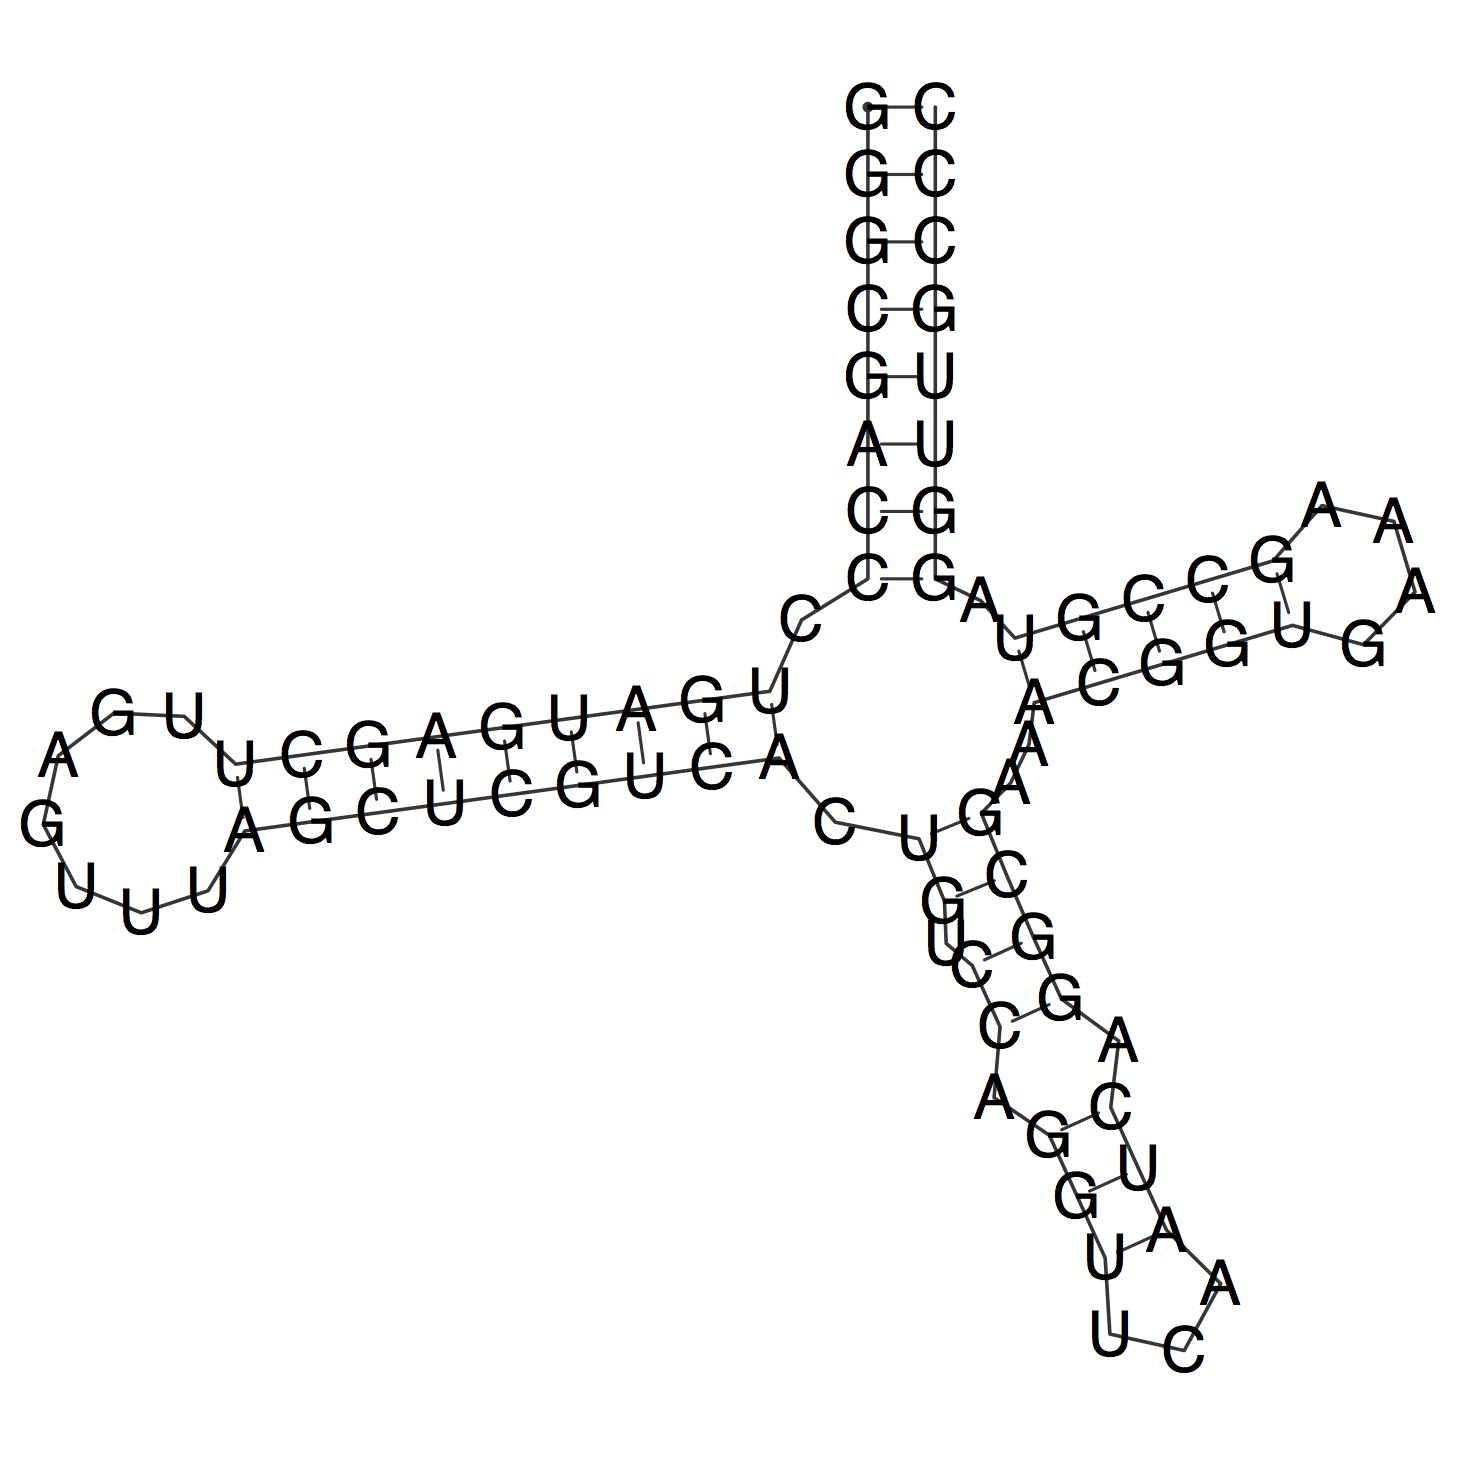

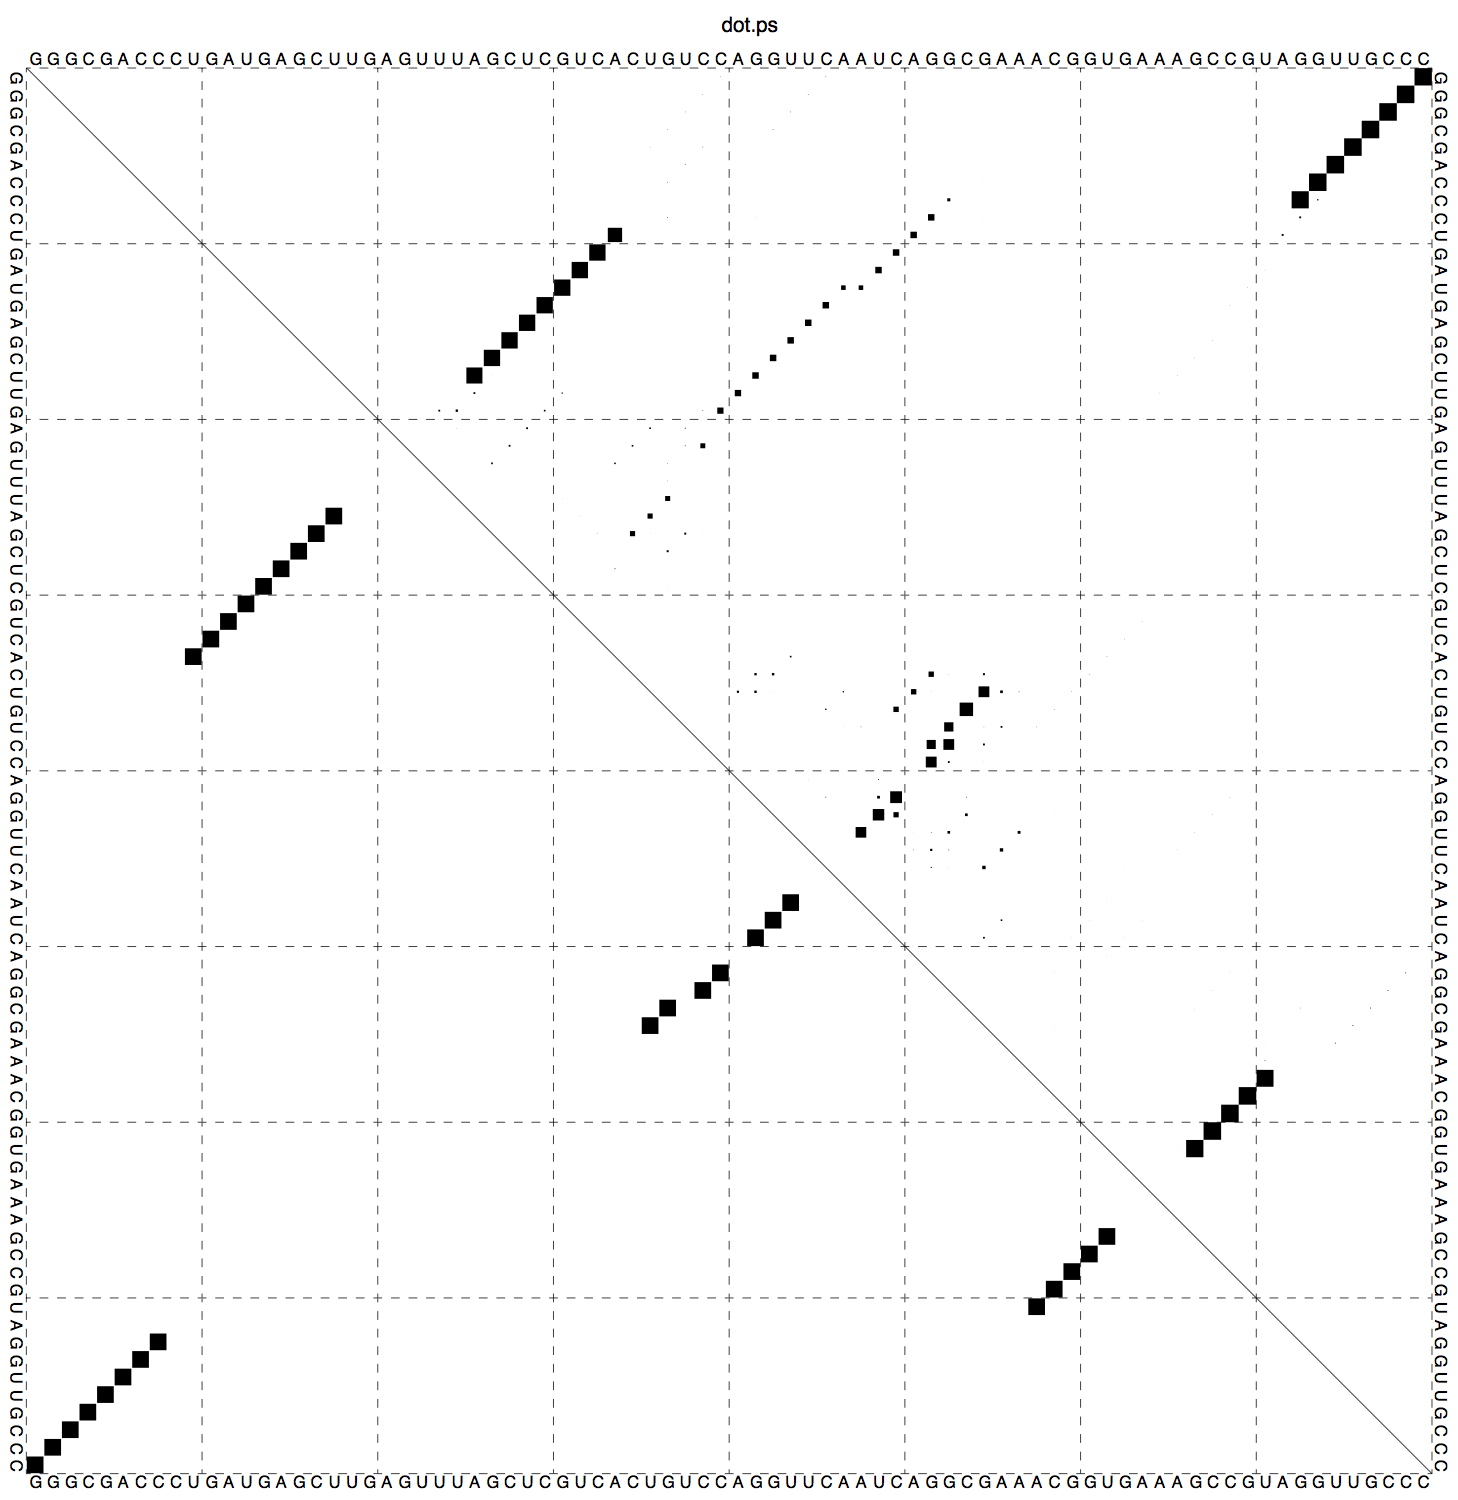

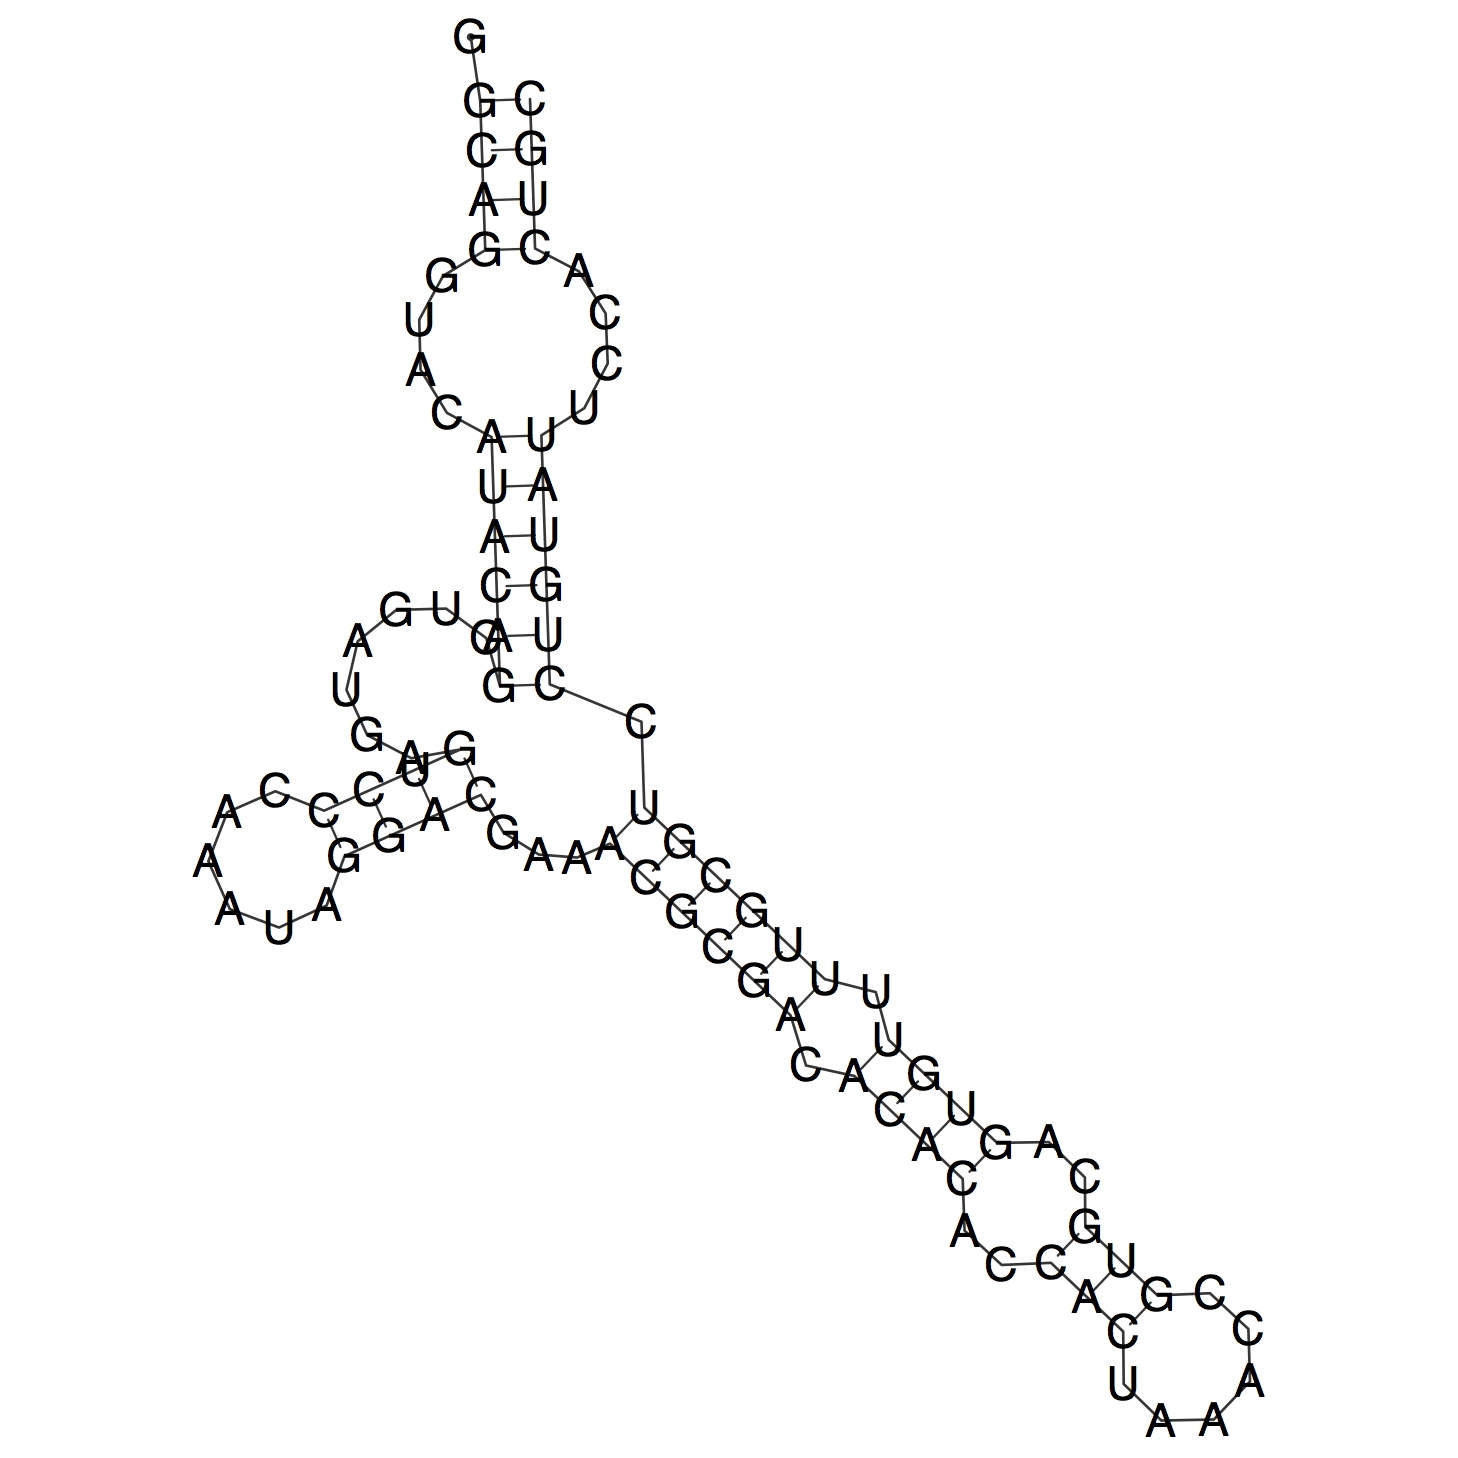

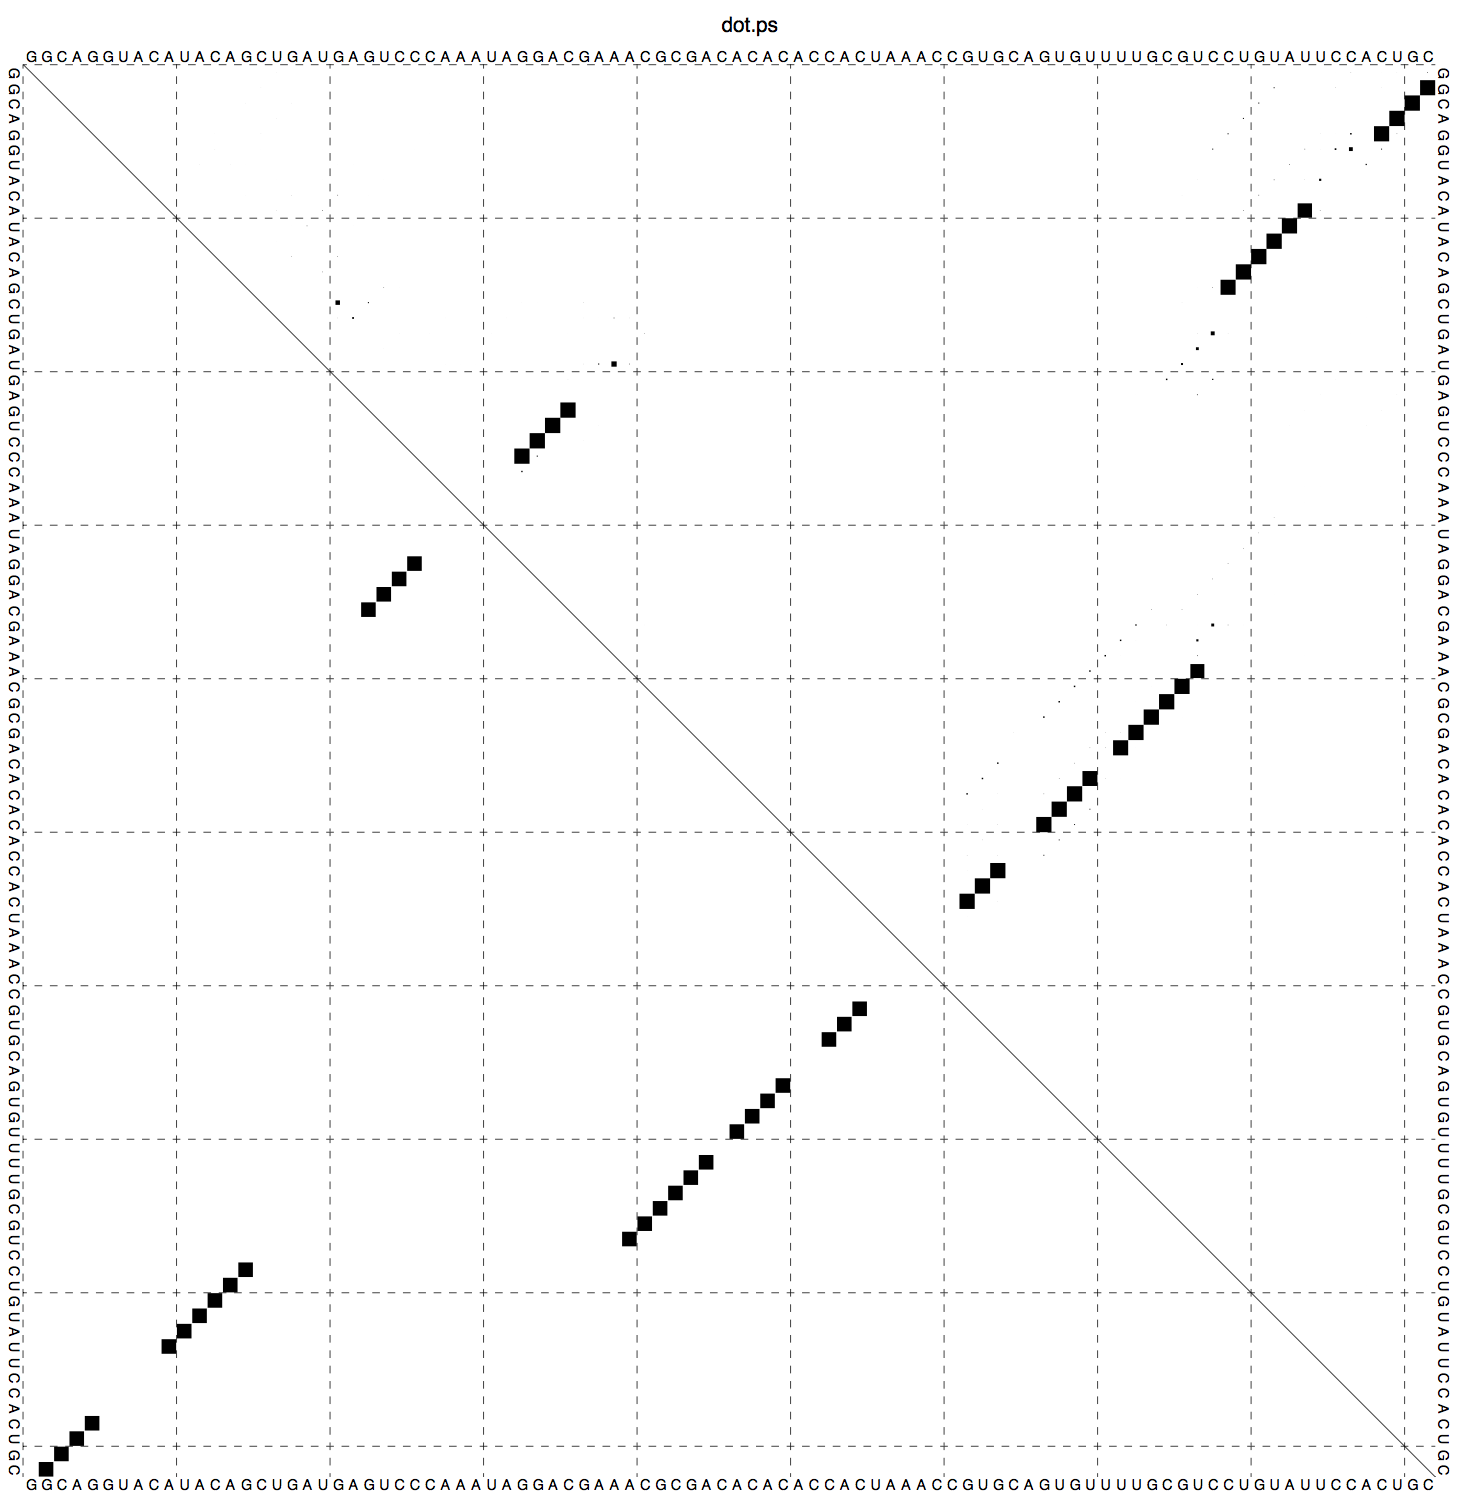

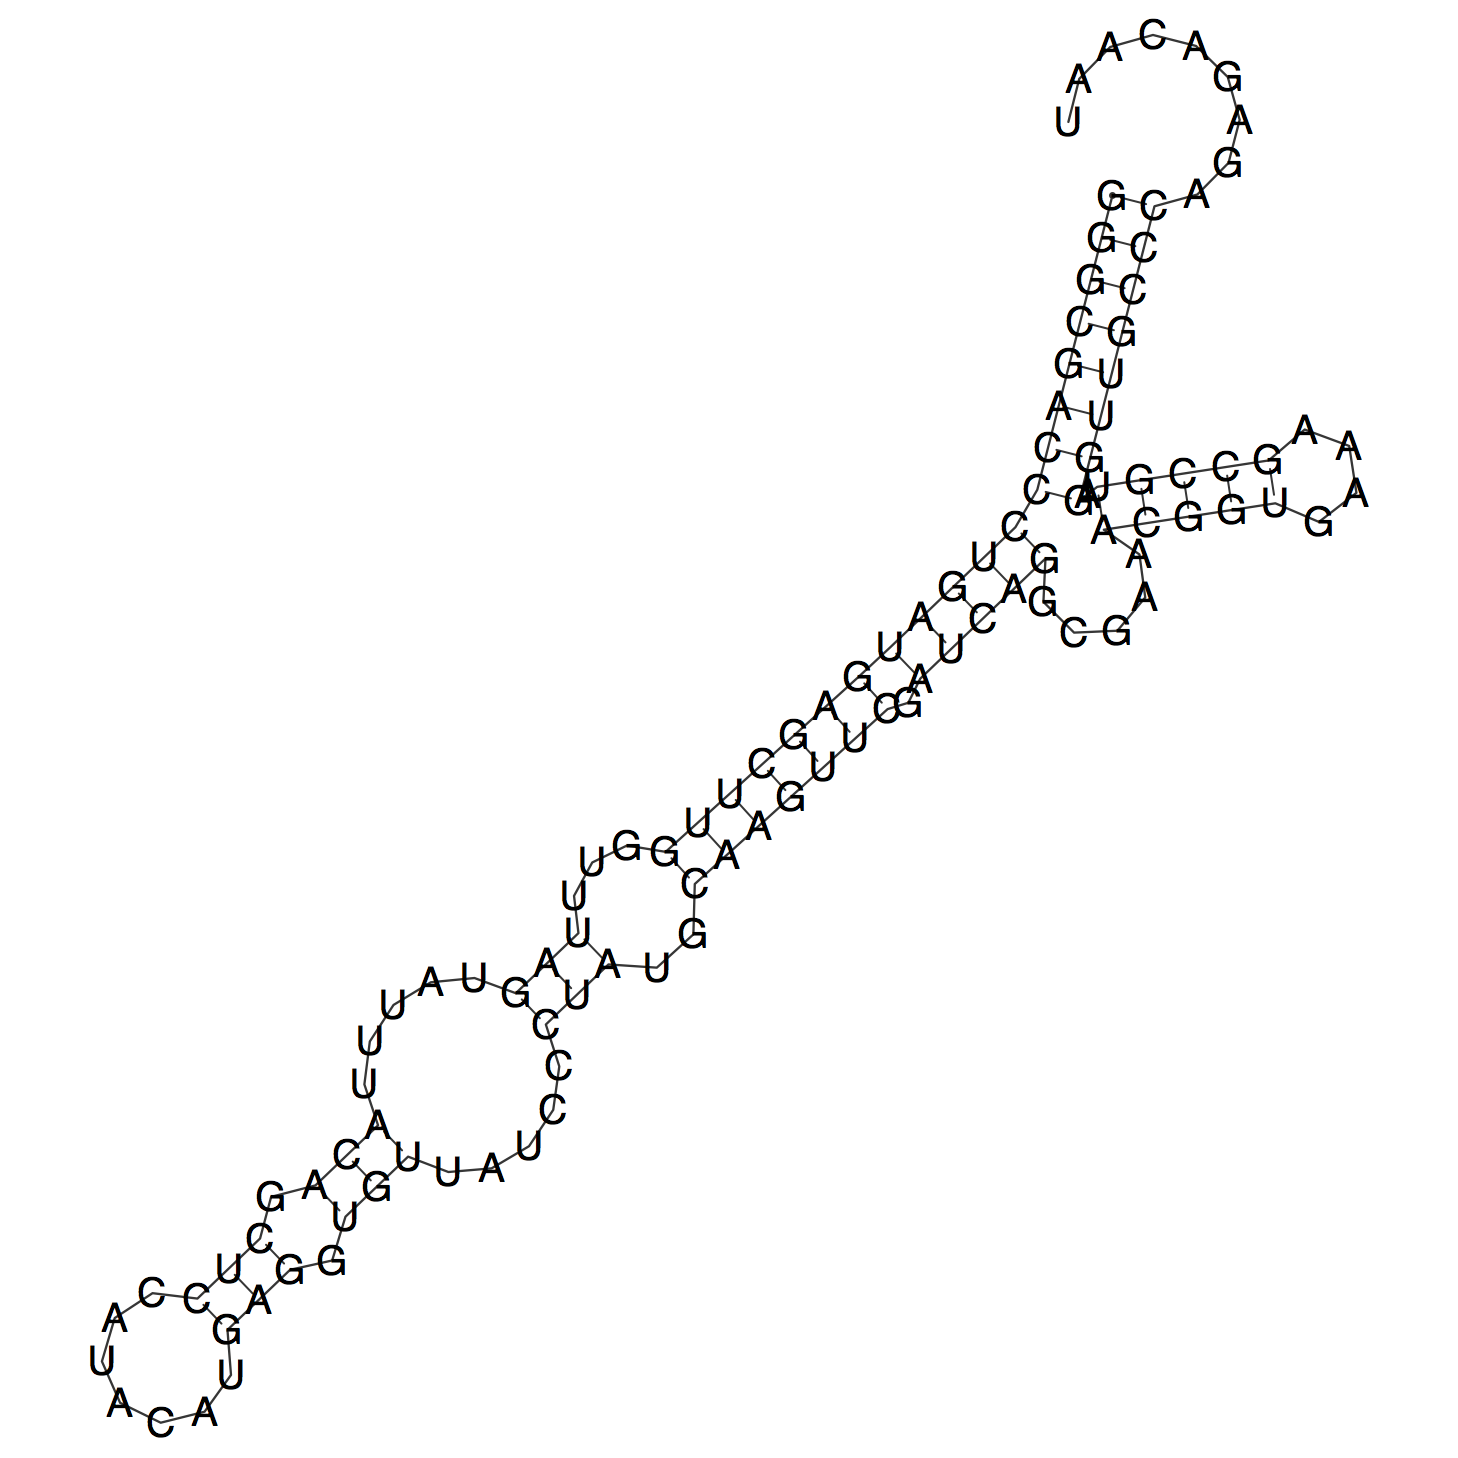

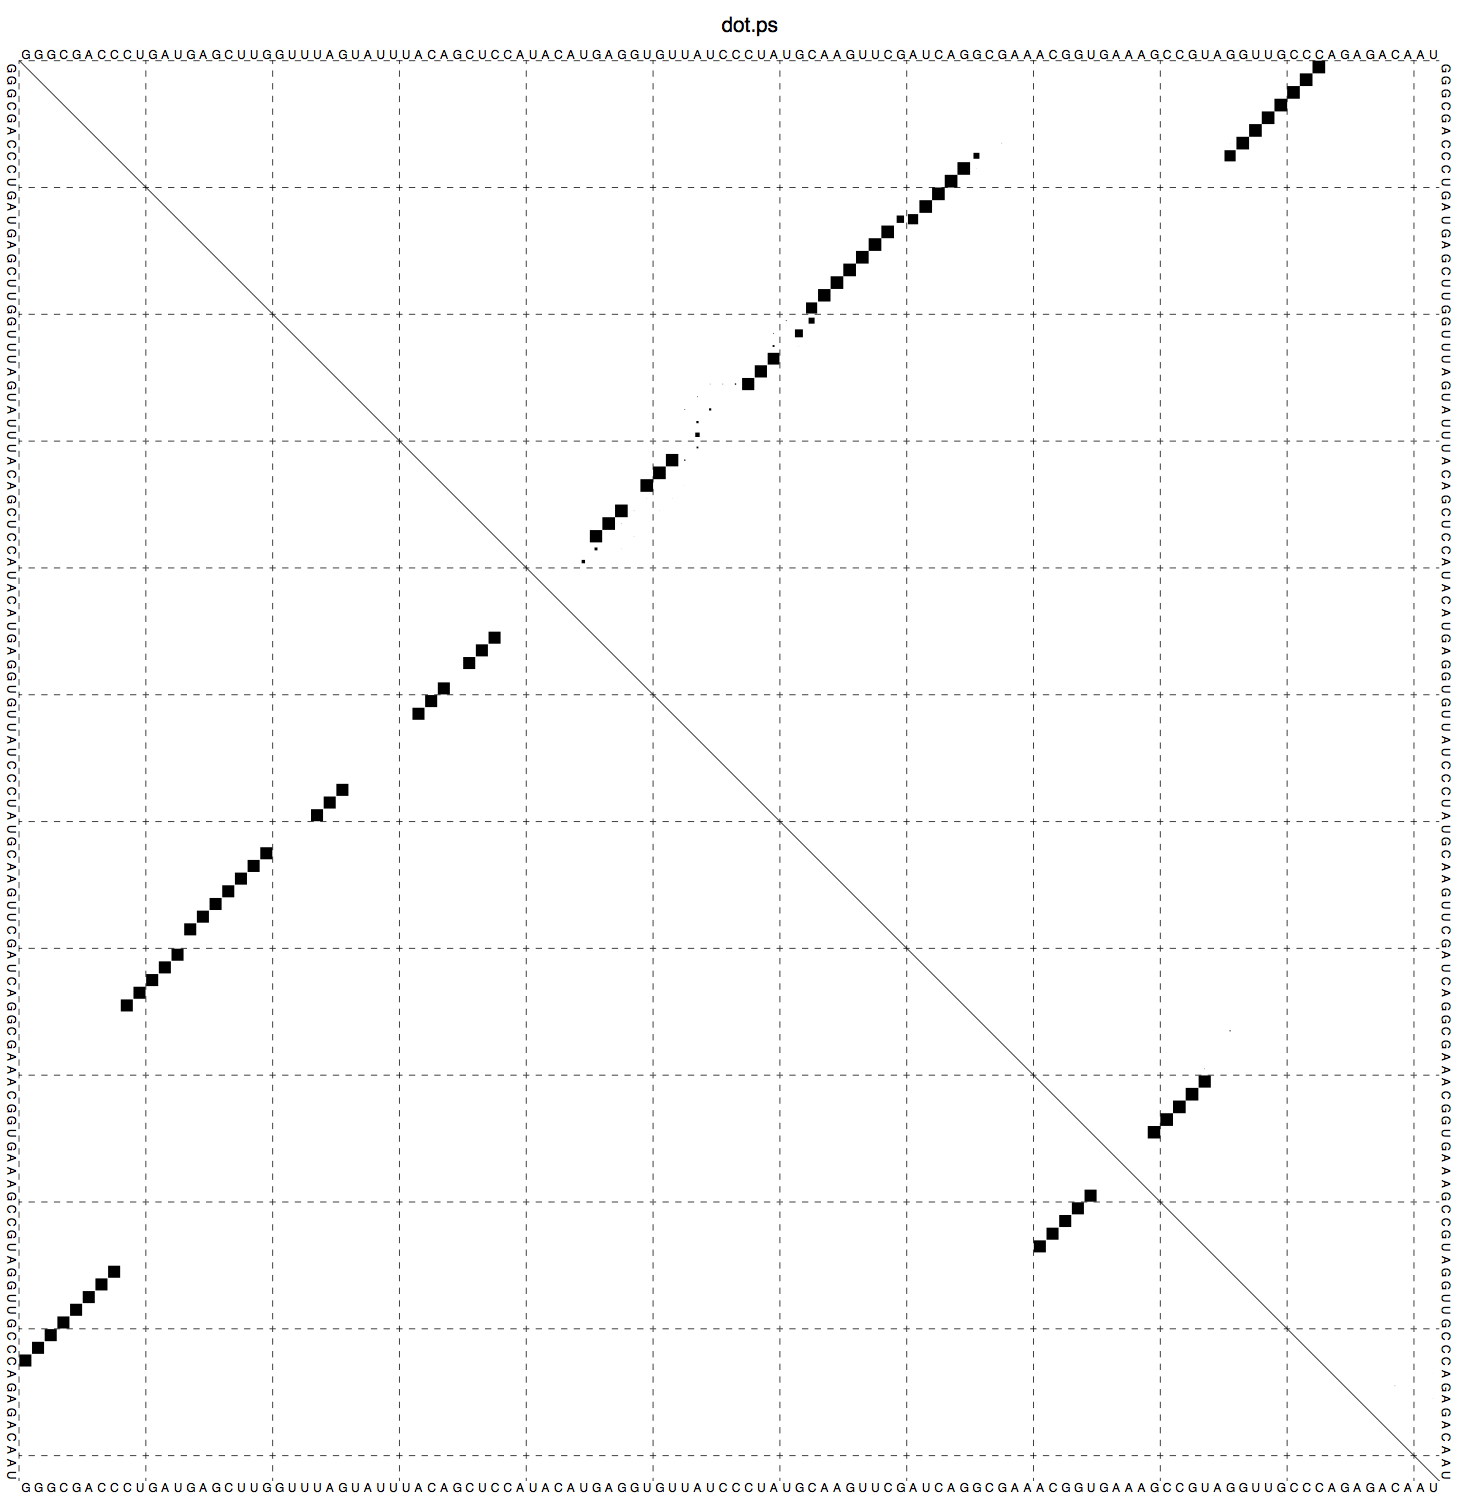

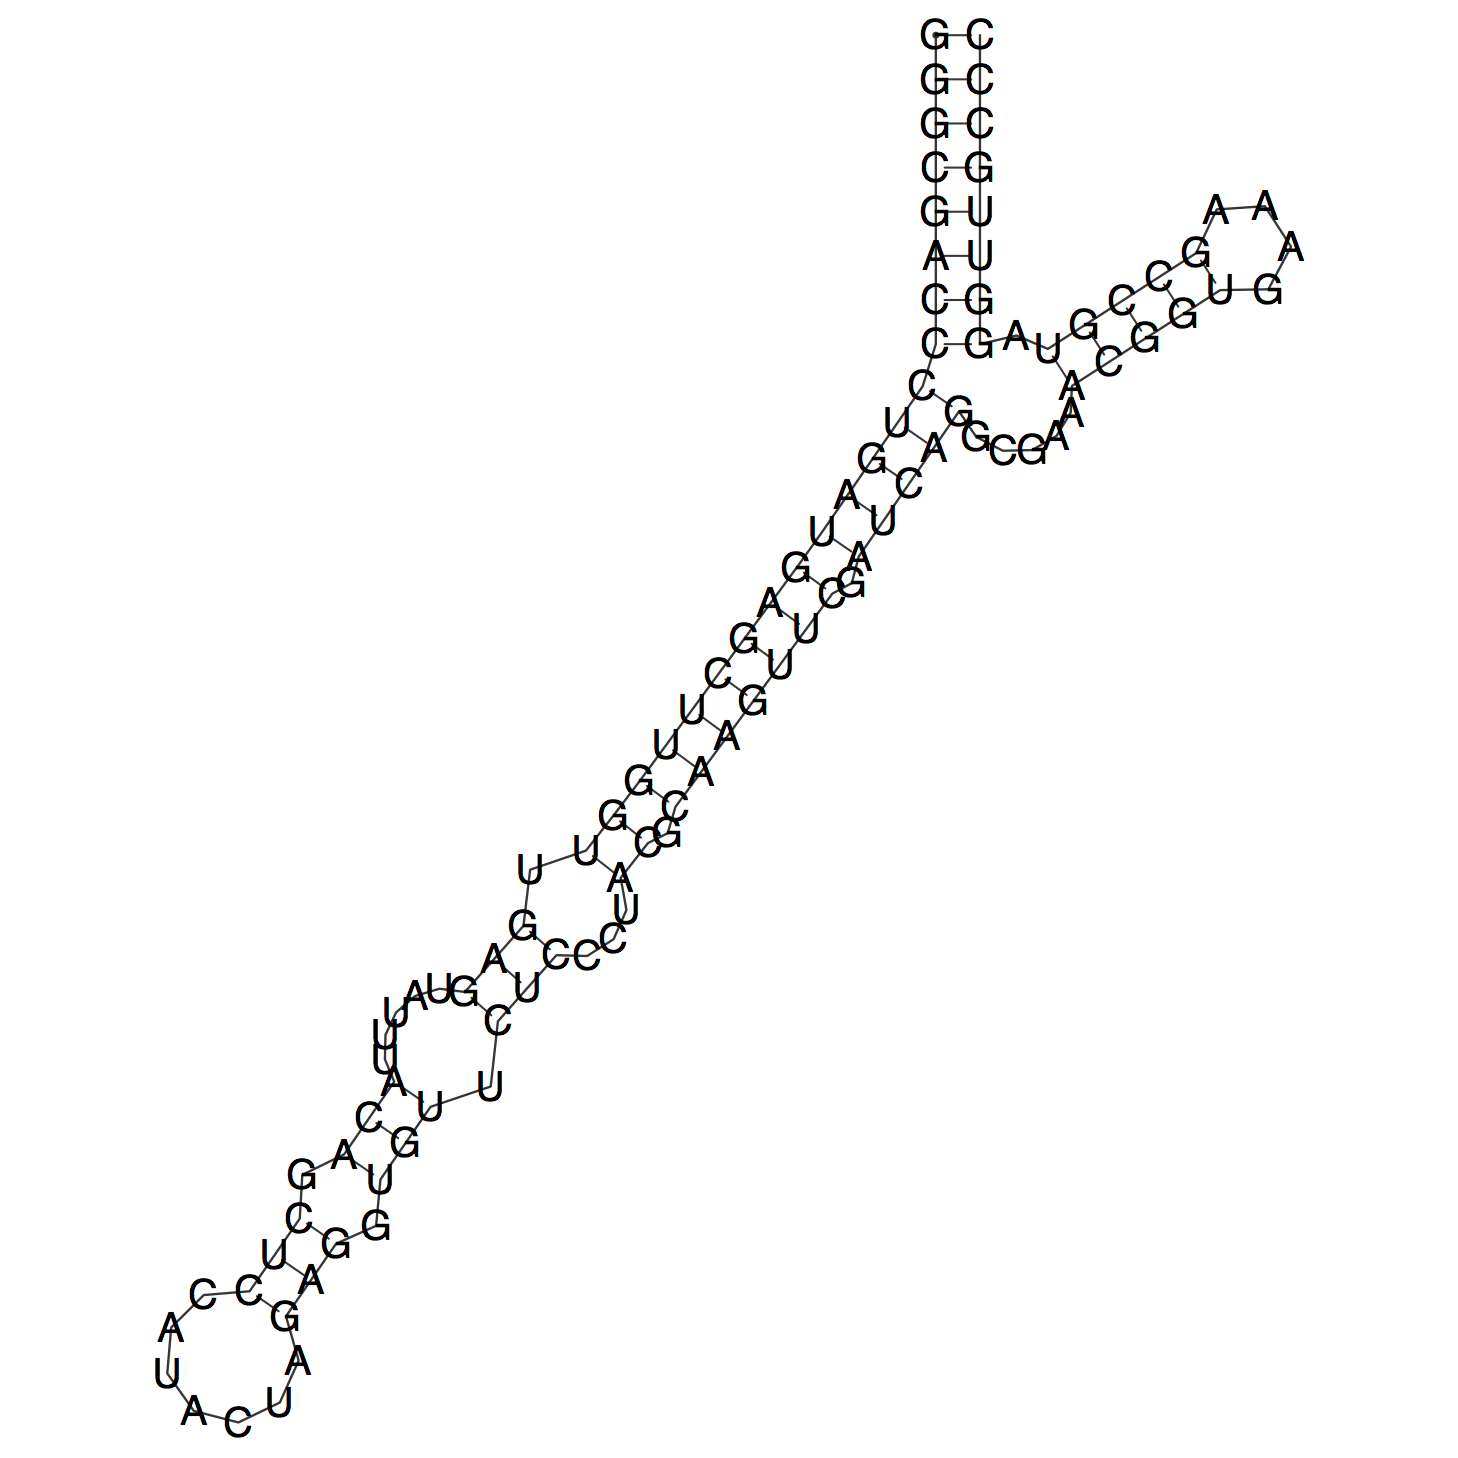

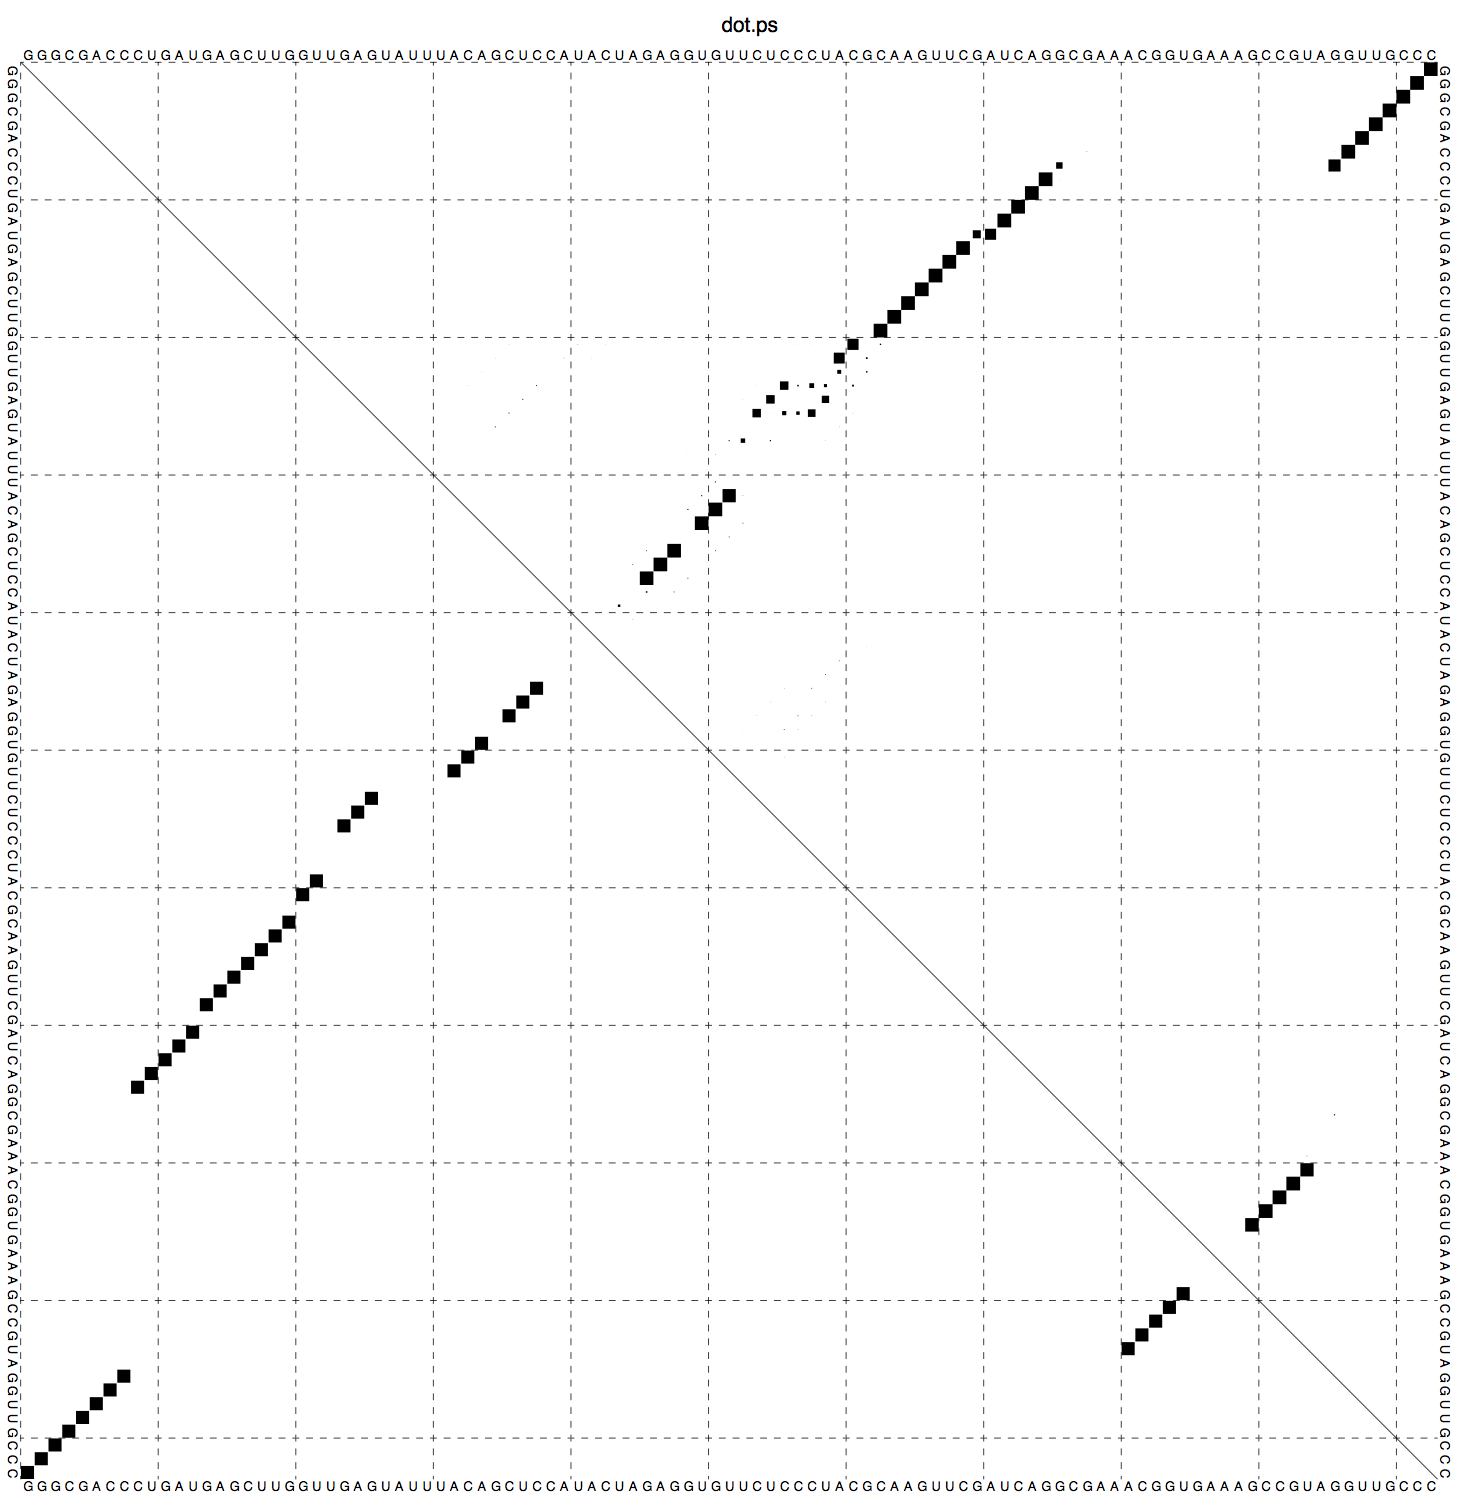

In [95]:
display(YFFR, YFFD, NFFR, NFFD, AFFR, AFFD, OFFR, OFFD)

> **Compare each plot to the native conformation given in the publication. Are they the same? Are they different? Are there any stem-loop structures that don’t match up? What might explain the differences? See if you can track down the parameters the authors used and compare them to the default RNAfold parameters (e.g., temperature, algorithm, etc)**   
</br>    
The stem-loops structures produced here are not the same as those in the publication. The YES-1 here has more loops than that in the publication (red region involved in the loop). NOT-1, OR-1 and AND-1 are the same here and publication. On page 1, the authors explain that they have used an algorithm "computes the entire ensemble of possible secondary structures as a function of temperature". This might cause the differences.


In [10]:
def write_constrain(filename, riboswitch, cons_lst): #write constrain file (.txt)
	f = open(filename, 'w')
	count = 1
	for nt in get_seq(riboswitch):
		f.write(nt)
	f.write('\n')
	for nt in get_seq(riboswitch):
		if count in cons_lst:
			f.write('x')
		else:
			f.write('.')
		count += 1
	f.close()

In [46]:
def run_RNAfold_C(txt_file, rename_ps, rename_dot): #run RNAfold and rename each file
	subprocess.run(['RNAfold', '-C', '-p', txt_file])
	subprocess.call(['mv', 'rna.ps', rename_ps])
	subprocess.call(['mv', 'dot.ps', rename_dot])

##### YES_1 and NOT_1
Note: These foldings do contain constrains (TRUE).

In [47]:
#write YES_1 and NOT_1 constrain files
YES_1_T = unconstrain_positions(26, 47)
NOT_1_T = unconstrain_positions(44, 66)
write_constrain('YES_1_T.txt', YES_1, YES_1_T)
write_constrain('NOT_1_T.txt', NOT_1, NOT_1_T)

run_RNAfold_C('YES_1_T.txt', 'YES_1_T_rna.ps', 'YES_1_T_dot.ps')
run_RNAfold_C('NOT_1_T.txt', 'NOT_1_T_rna.ps', 'NOT_1_T_dot.ps')

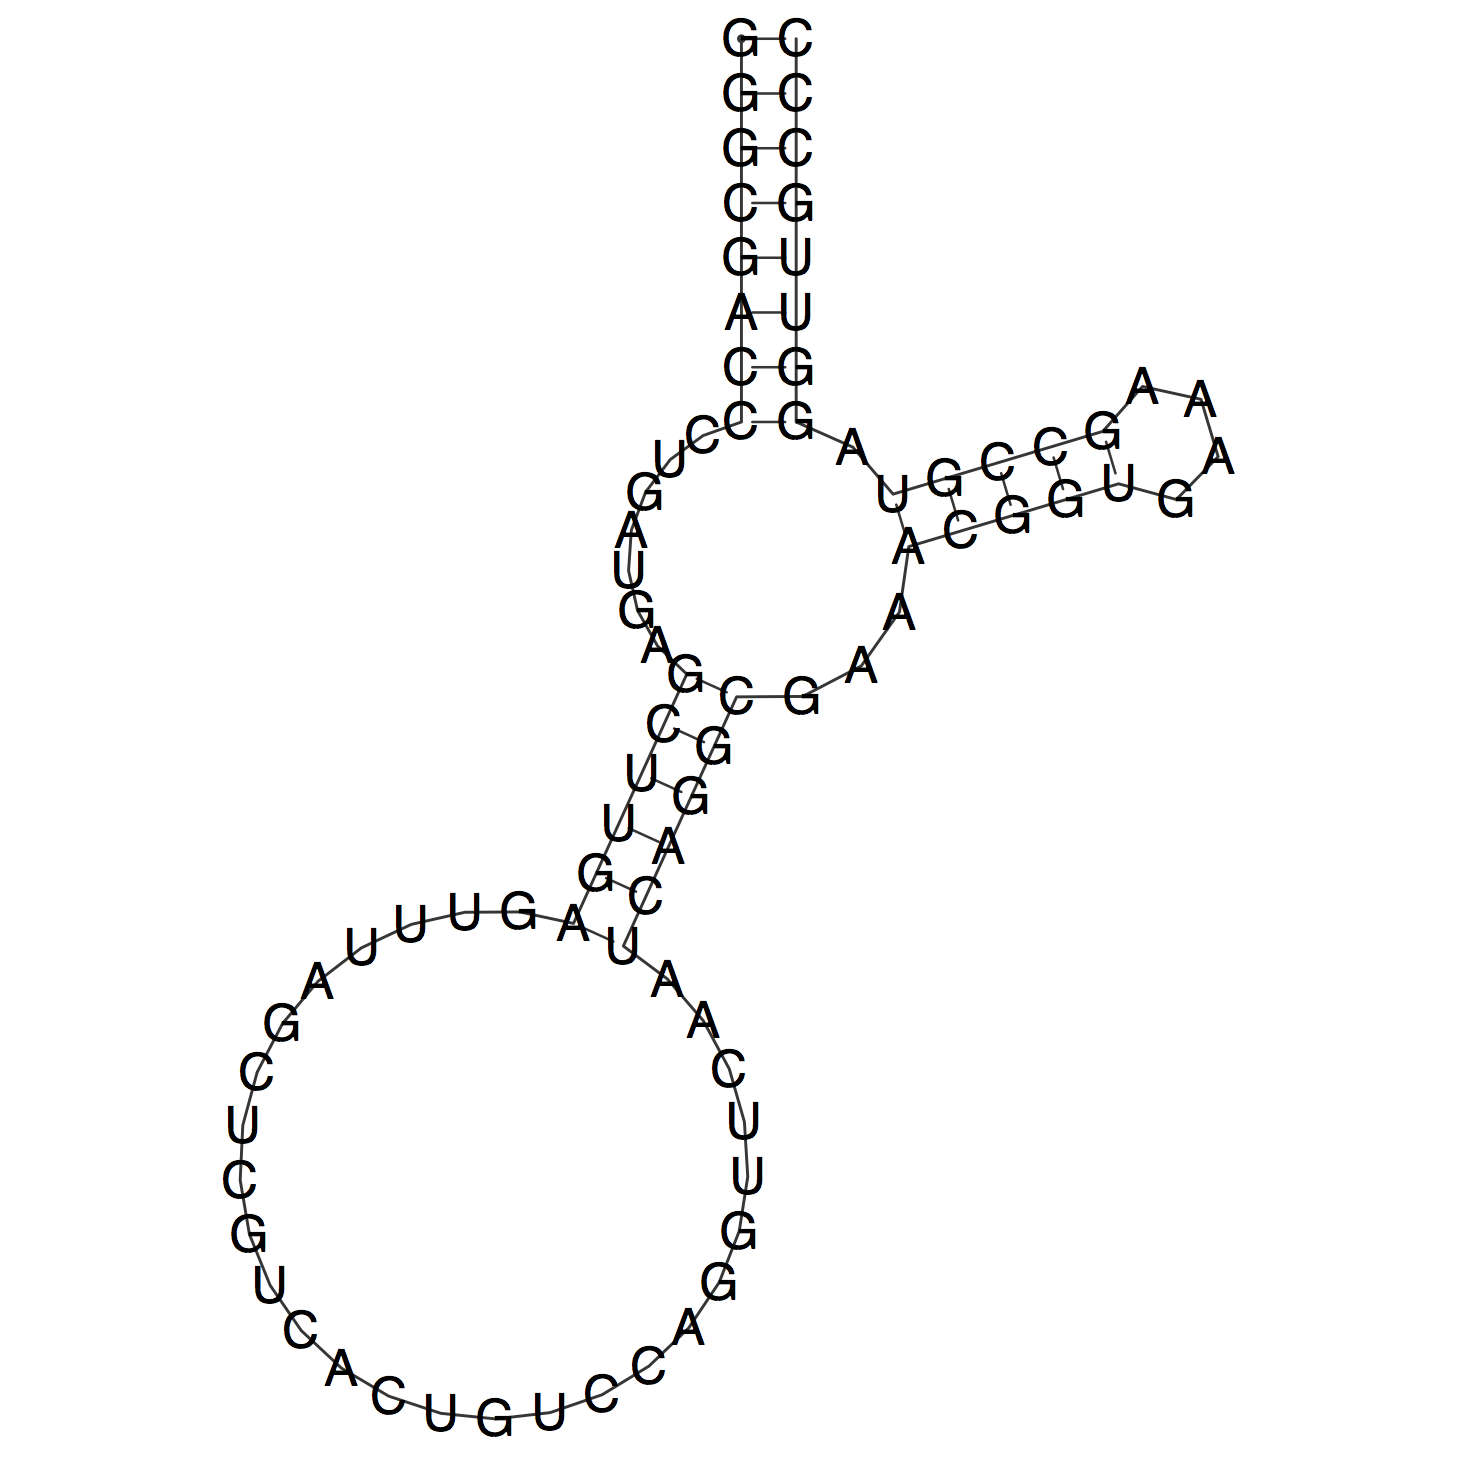

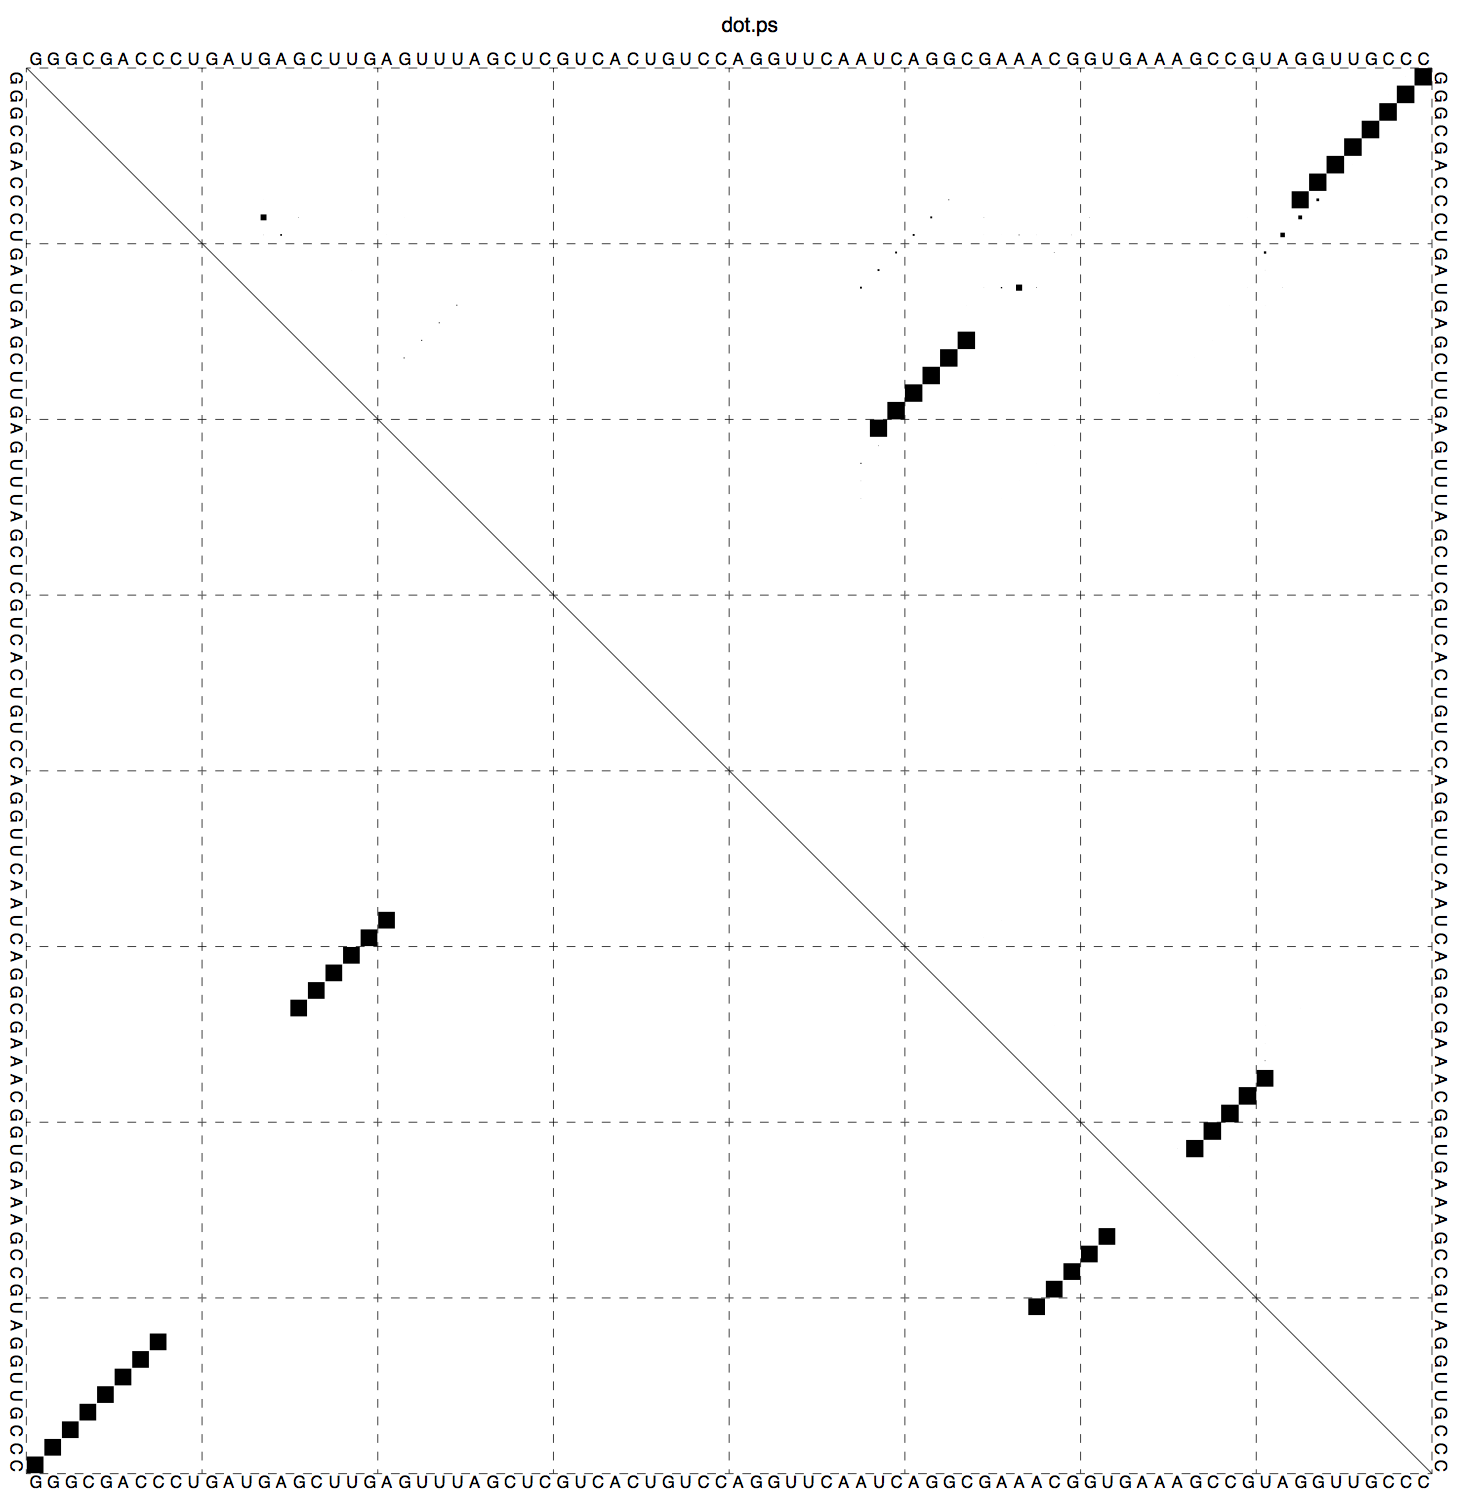

In [96]:
YTR =Image(filename='YES_1_T_rna.png', width=200, height=200)
YTD =Image(filename='YES_1_T_dot.png', width=200, height=200)
display(YTR, YTD)

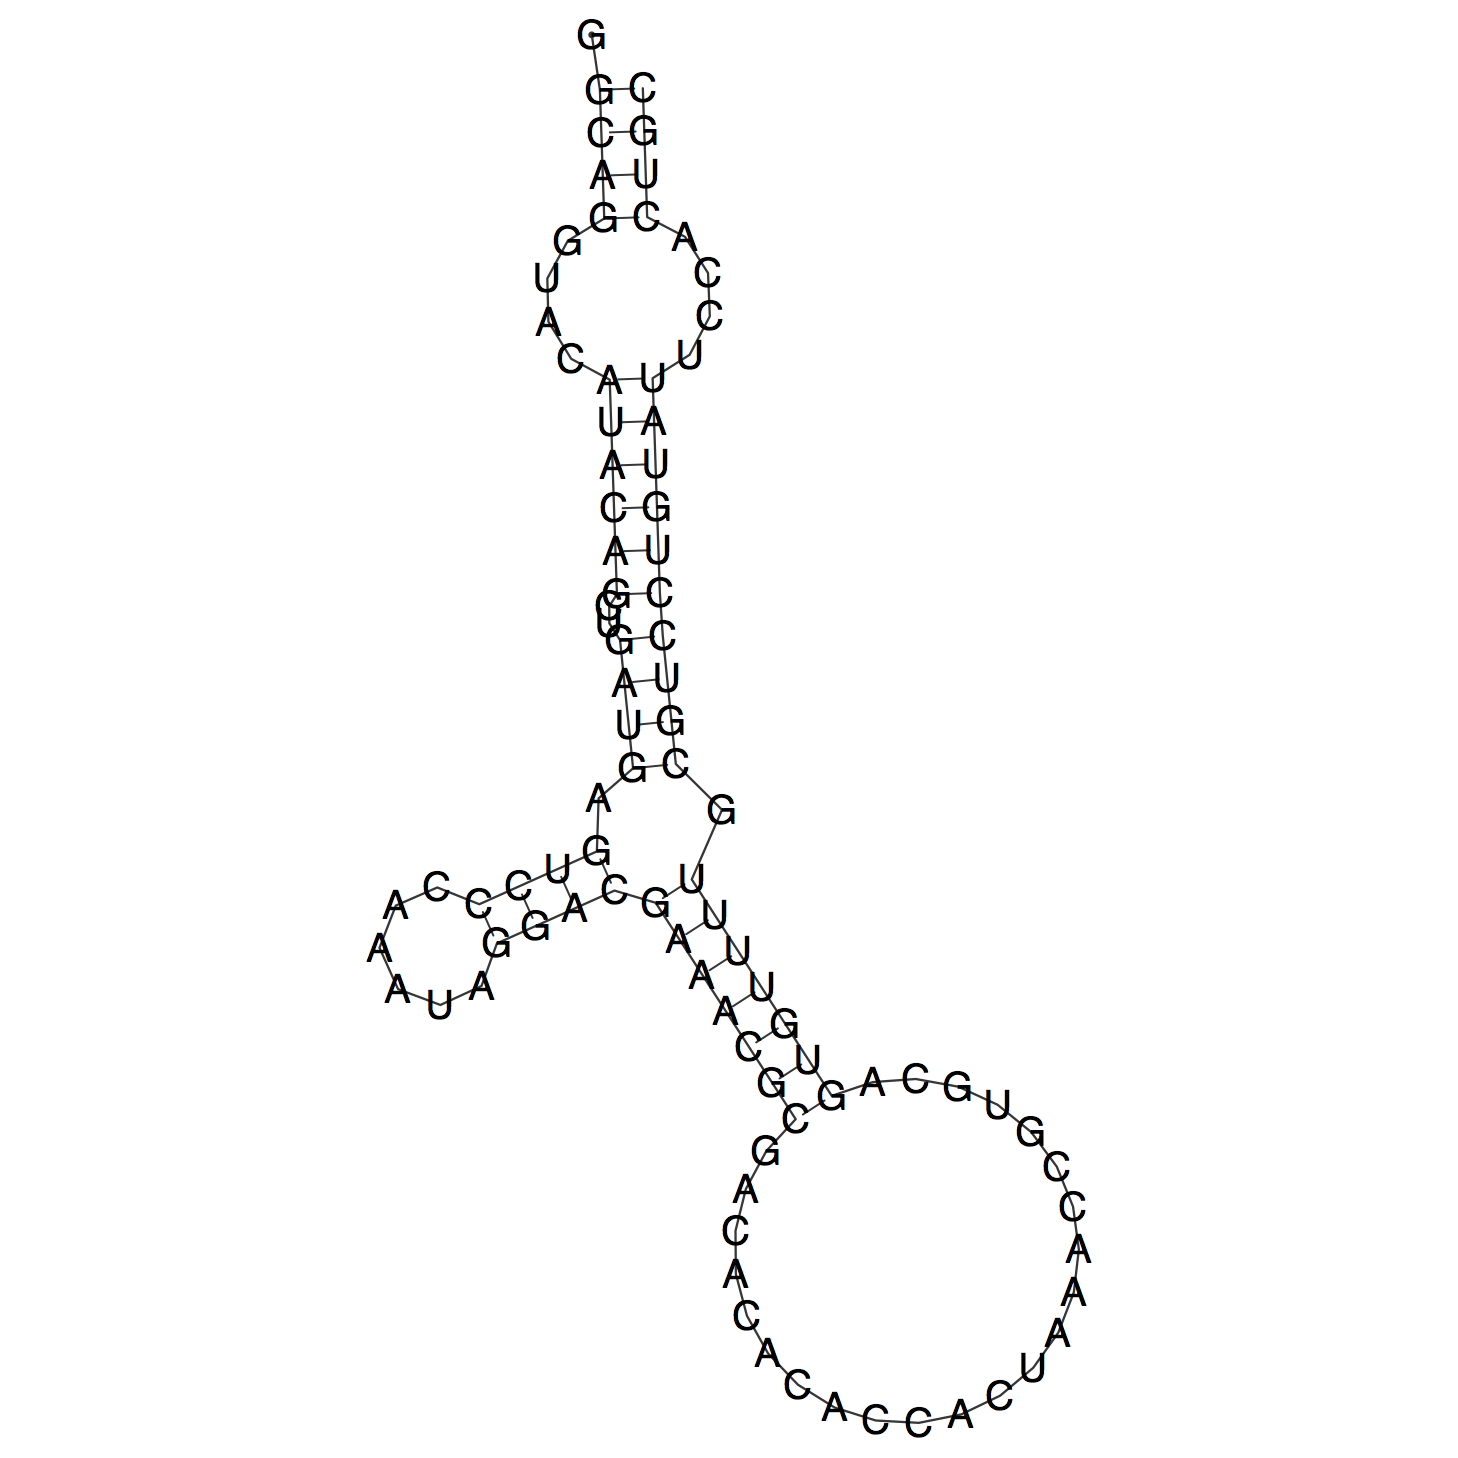

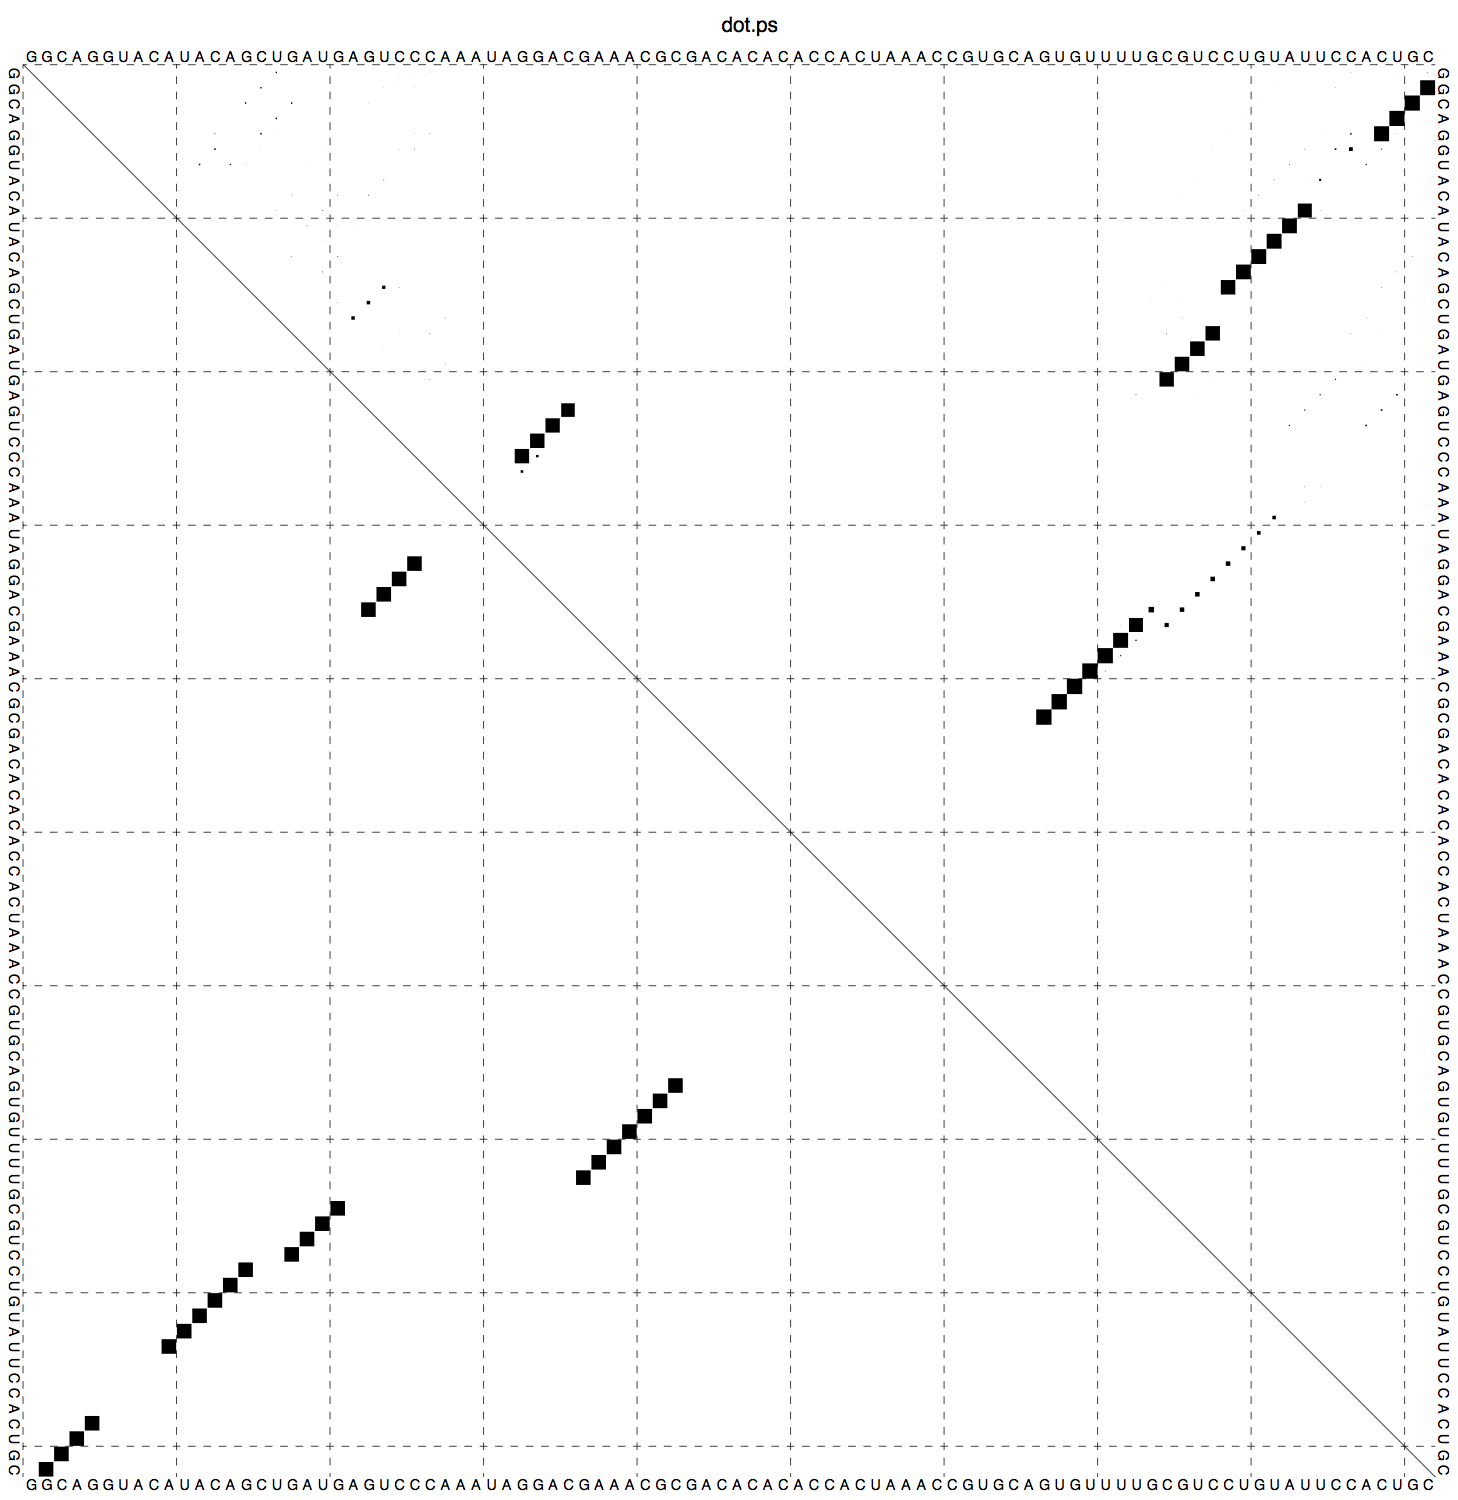

In [98]:
NTR =Image(filename='NOT_1_T_rna.png', width=200, height=200)
NTD =Image(filename='NOT_1_T_dot.png', width=200, height=200)
display(NTR, NTD)

> **Does it look like the self-cleaving form of YES-1 in Figure 2? Are the red regions bound to each other?**    
</br>   
Both YES_1 and NOT_1 look like the self-cleaving forms in the publication, so do the red regions. This makes sense because the constrain is set here. 


##### AND_1
Note: These foldings implement these binary logic gates: TRUE/FALSE, FALSE/TRUE, TRUE/TRUE

In [48]:
#write AND_1 constrain files and RNAfold files
AND_1_TF = unconstrain_positions(30, 45)
AND_1_FT = unconstrain_positions(49, 64)
AND_1_TT = AND_1_TF + AND_1_FT

write_constrain('AND_1_TF.txt', AND_1, AND_1_TF)
write_constrain('AND_1_FT.txt', AND_1, AND_1_FT)
write_constrain('AND_1_TT.txt', AND_1, AND_1_TT)

run_RNAfold_C('AND_1_TF.txt', 'AND_1_TF_rna.ps', 'AND_1_TF_dot.ps')
run_RNAfold_C('AND_1_FT.txt', 'AND_1_FT_rna.ps', 'AND_1_FT_dot.ps')
run_RNAfold_C('AND_1_TT.txt', 'AND_1_TT_rna.ps', 'AND_1_TT_dot.ps')


##### OR_1
Note: These foldings implement these binary logic gates: TRUE/FALSE, FALSE/TRUE, TRUE/TRUE

In [49]:
#write OR_1 constrain files and RNAfold files

OR_1_TF = unconstrain_positions(27, 46)
OR_1_FT = unconstrain_positions(47, 66)
OR_1_TT = OR_1_TF + OR_1_FT

write_constrain('OR_1_TF.txt', OR_1, OR_1_TF)
write_constrain('OR_1_FT.txt', OR_1, OR_1_FT)
write_constrain('OR_1_TT.txt', OR_1, OR_1_TT)

run_RNAfold_C('OR_1_TF.txt', 'OR_1_TF_rna.ps', 'OR_1_TF_dot.ps')
run_RNAfold_C('OR_1_FT.txt', 'OR_1_FT_rna.ps', 'OR_1_FT_dot.ps')
run_RNAfold_C('OR_1_TT.txt', 'OR_1_TT_rna.ps', 'OR_1_TT_dot.ps')

#### **ALL RESULTS**

##### YES_1

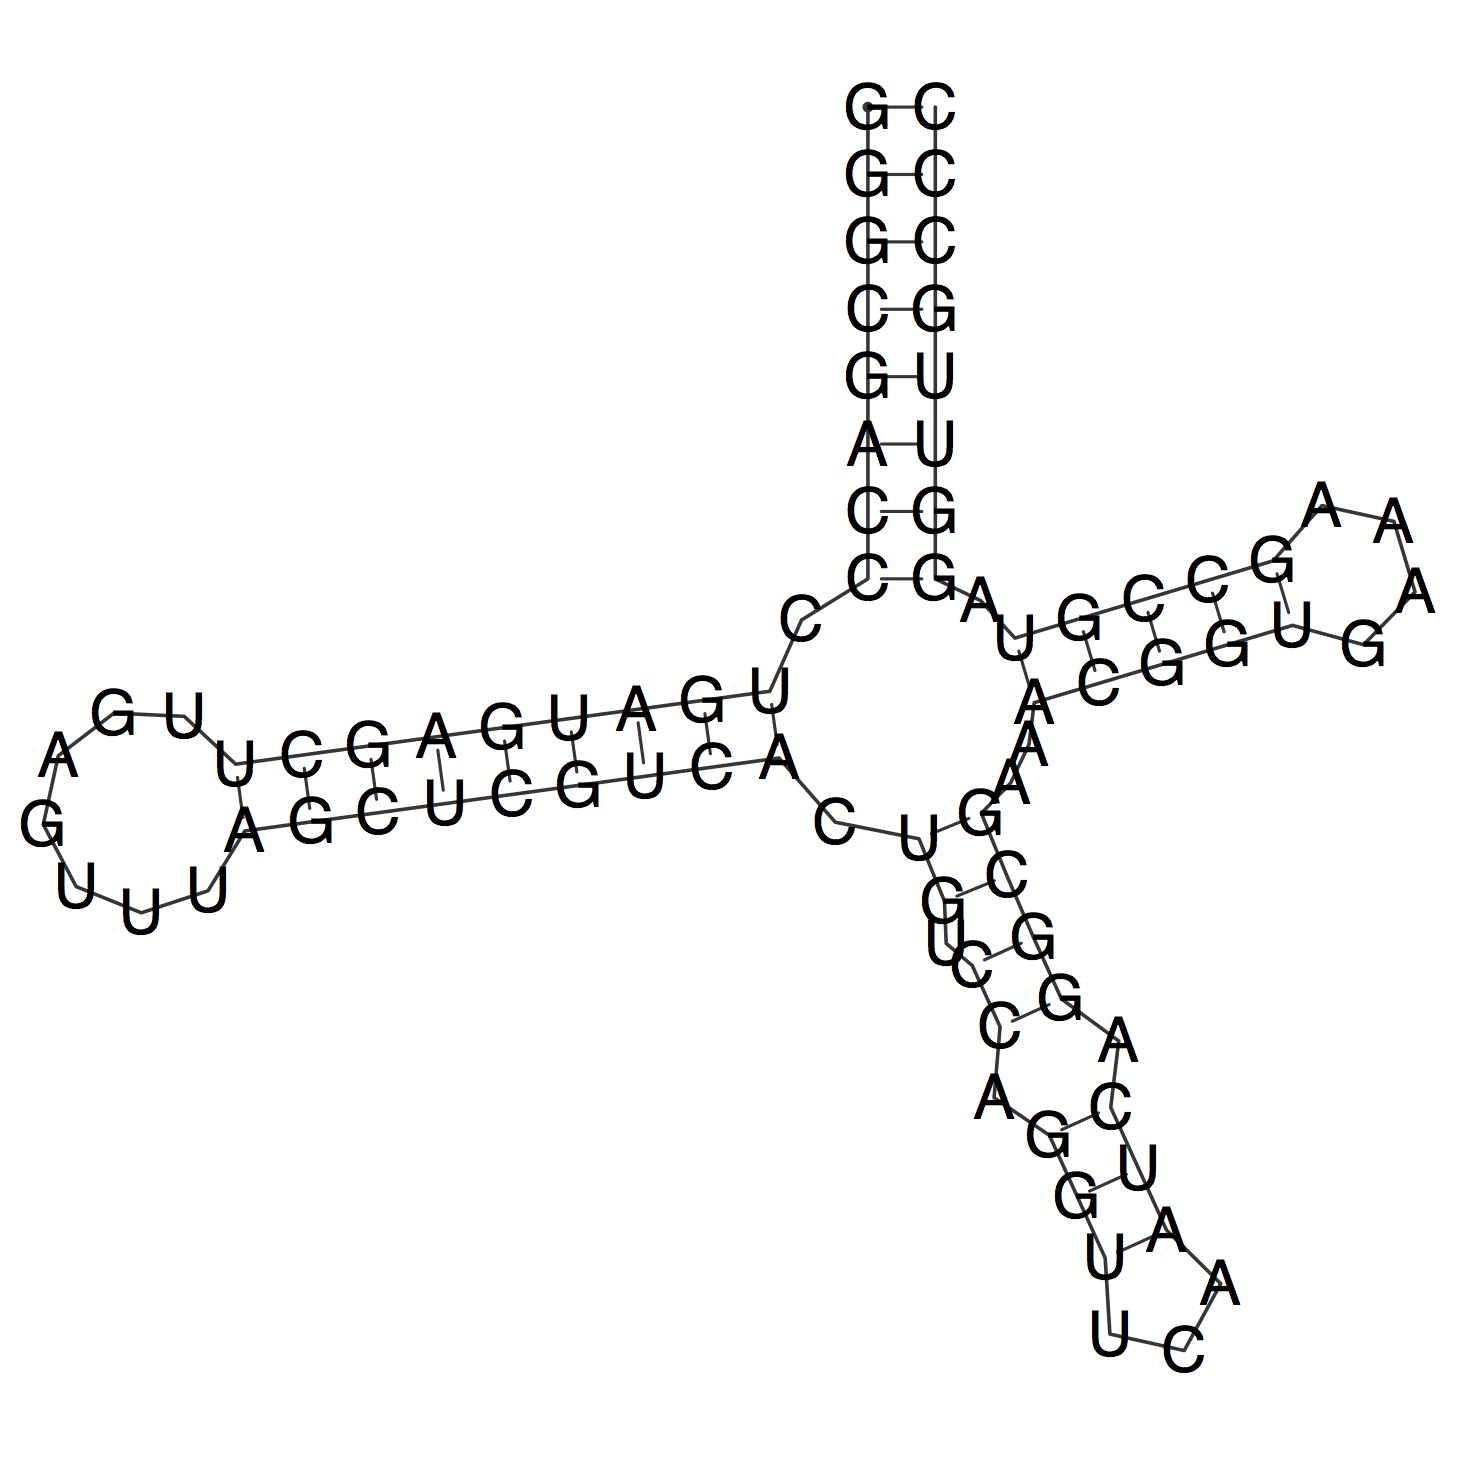

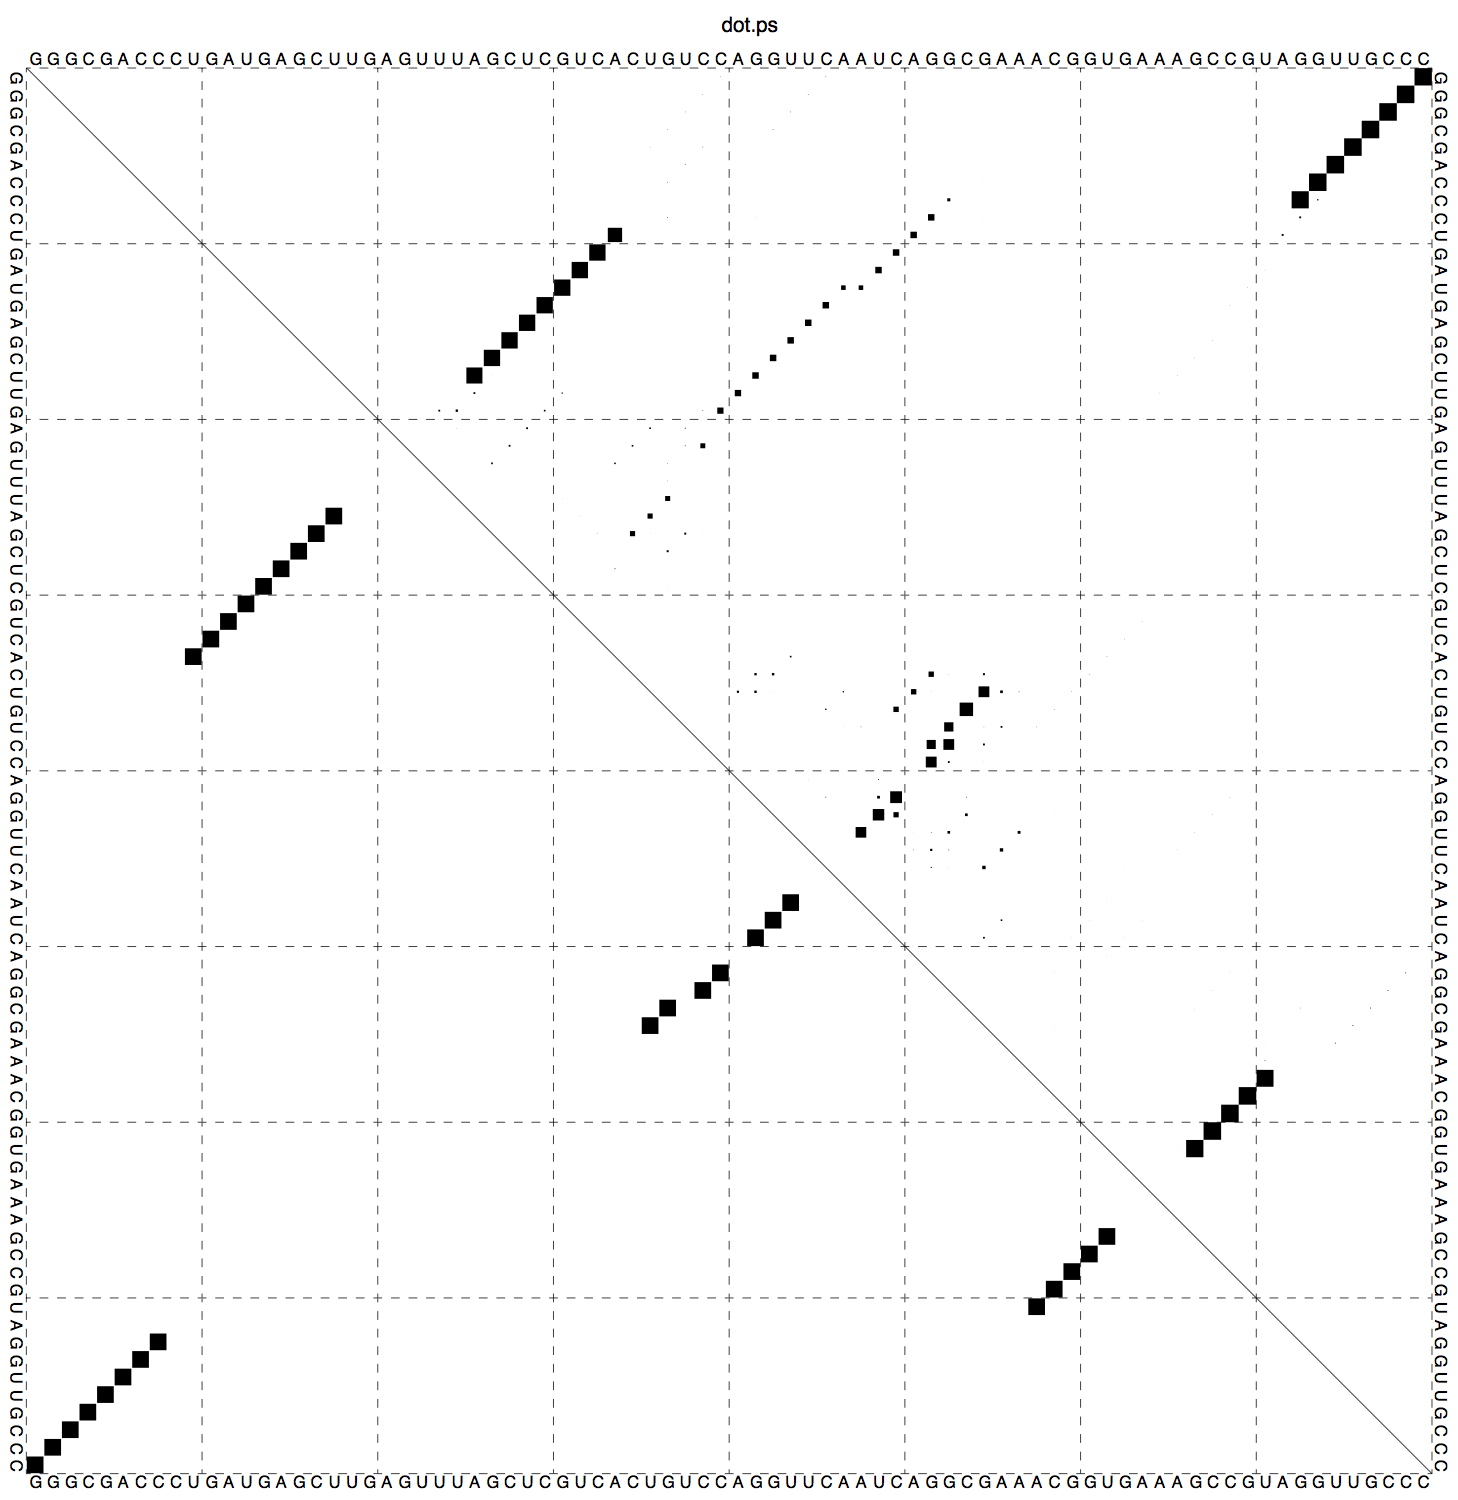

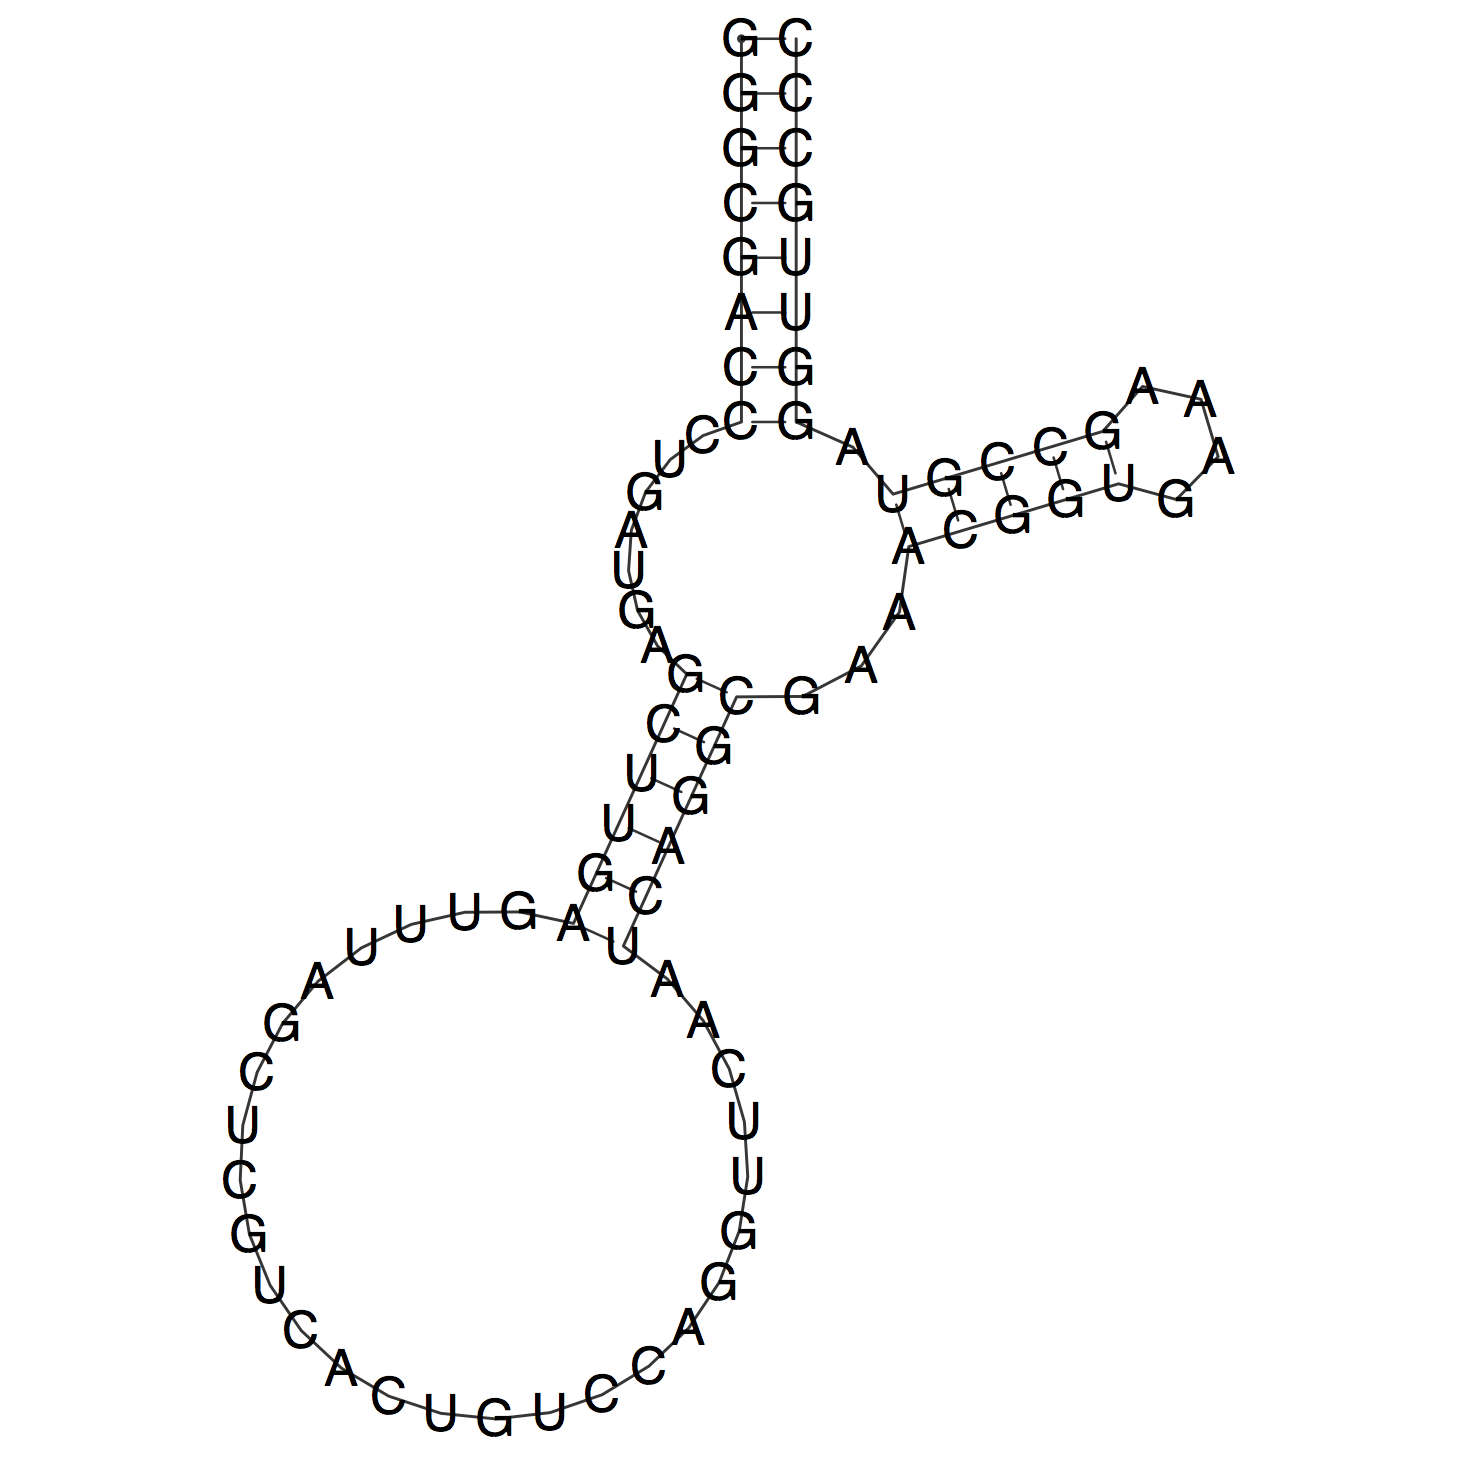

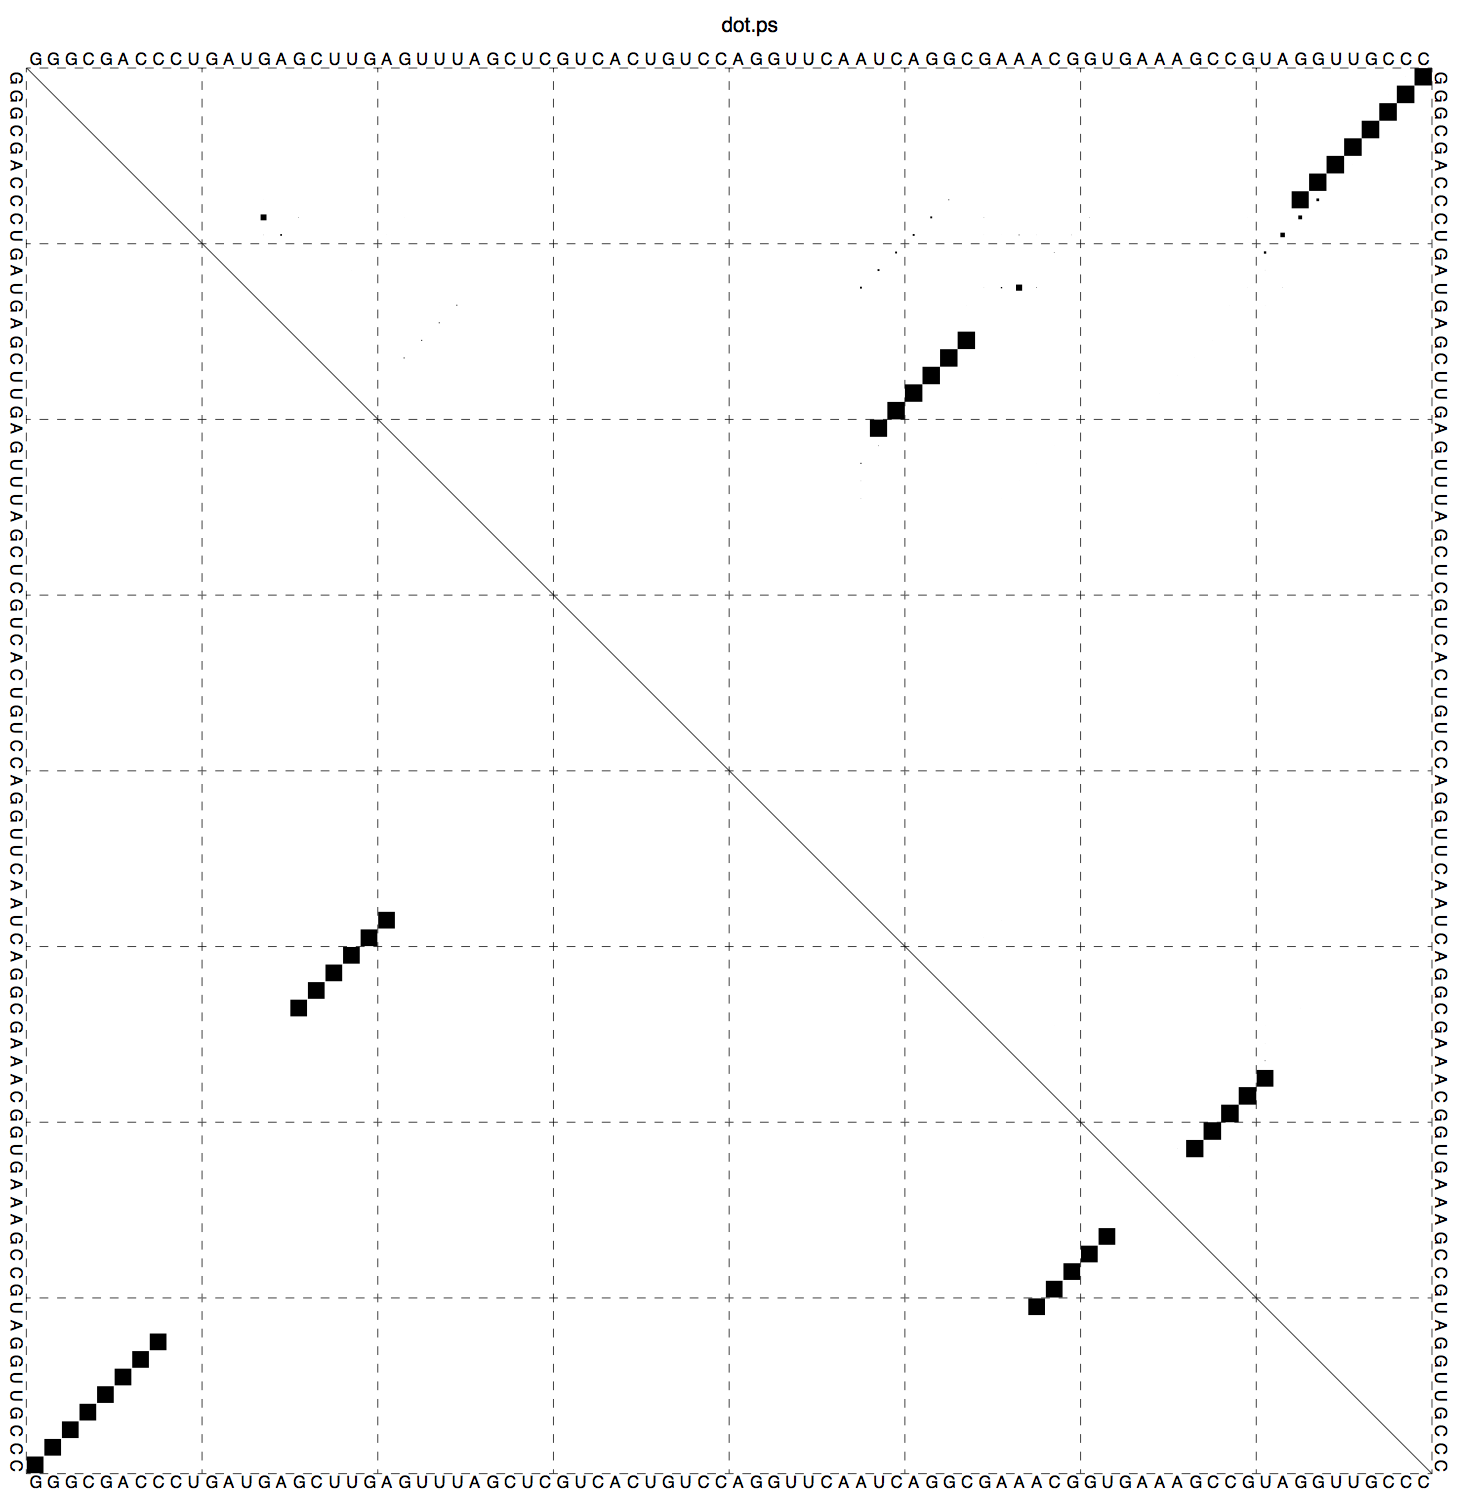

In [53]:
YFFR =Image(filename='YES_1_FF_rna.png', width=200, height=200)
YFFD =Image(filename='YES_1_FF_dot.png', width=200, height=200)

YTR =Image(filename='YES_1_T_rna.png', width=200, height=200)
YTD =Image(filename='YES_1_T_dot.png', width=200, height=200)

display(YFFR, YFFD, YTR, YTD)

##### NOT_1

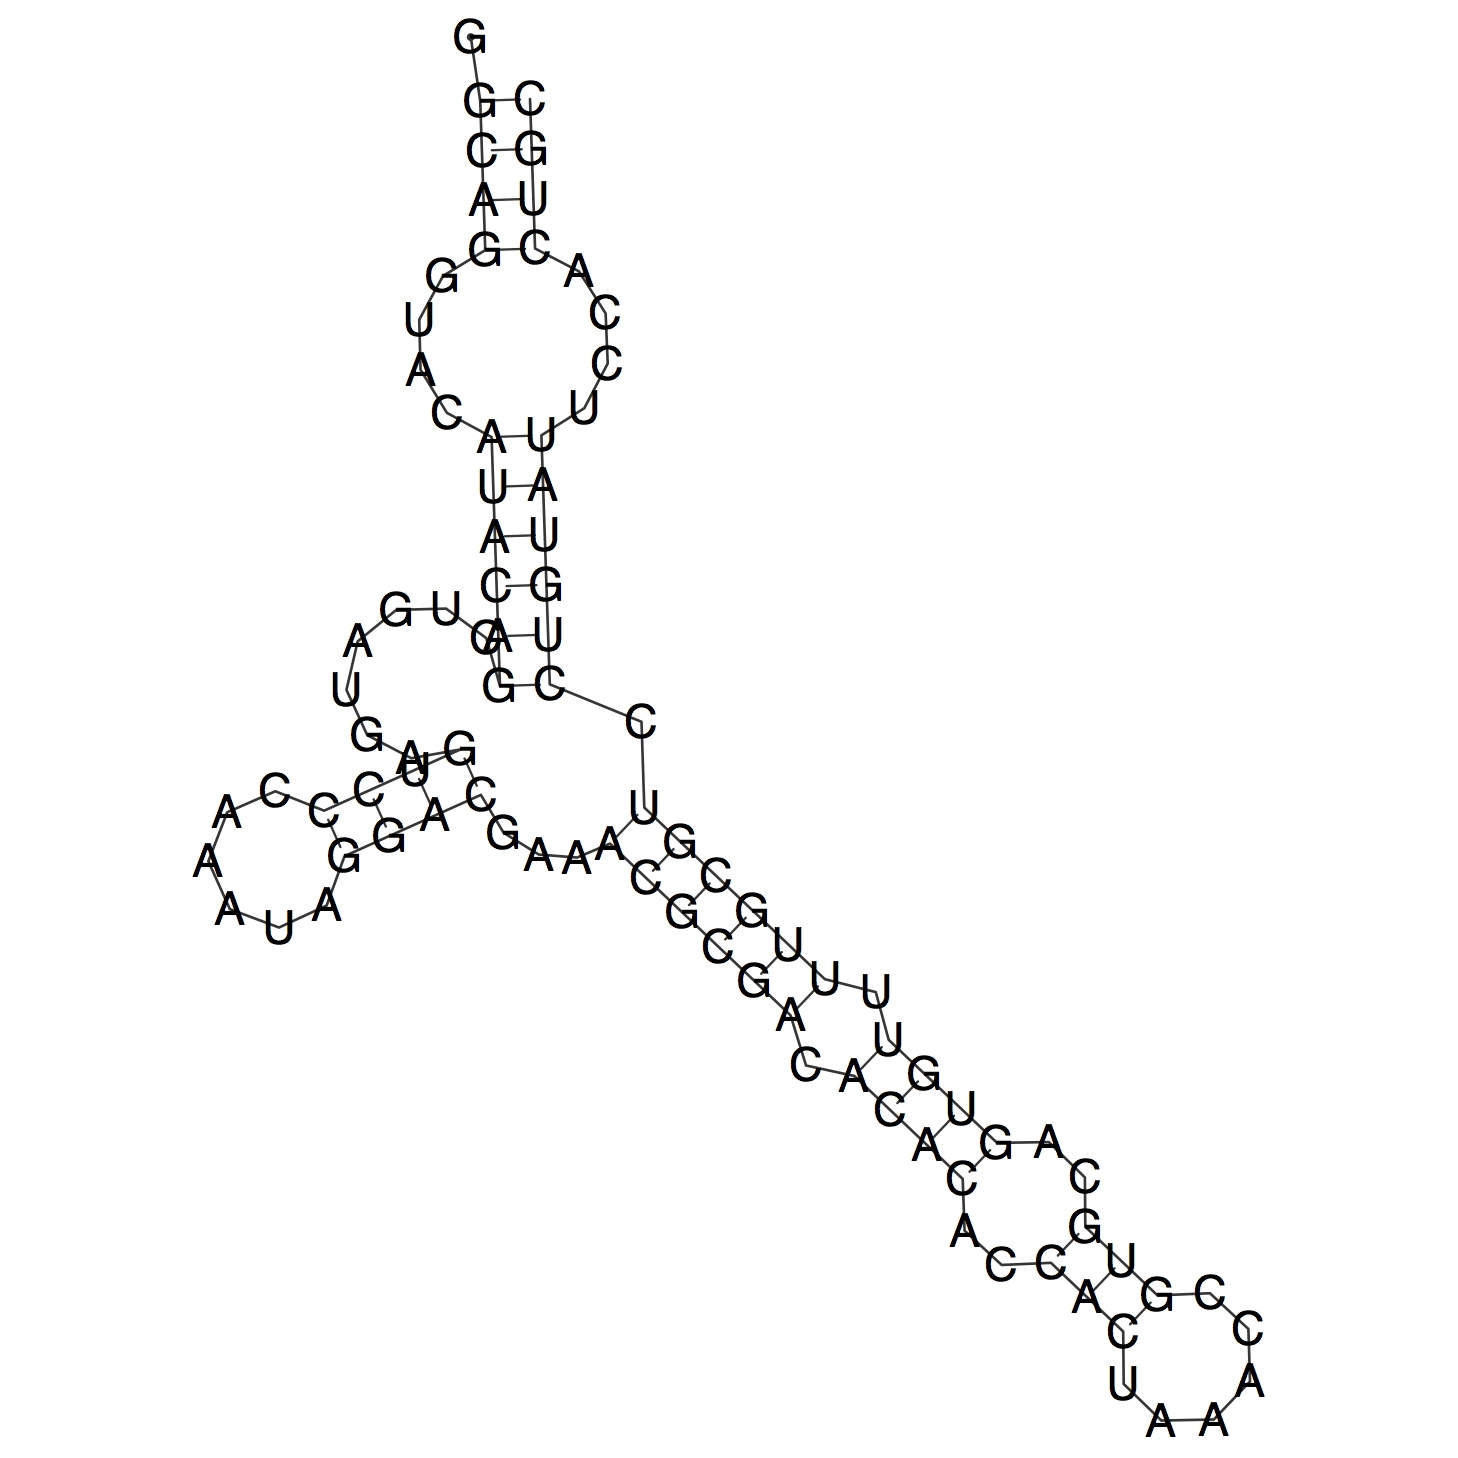

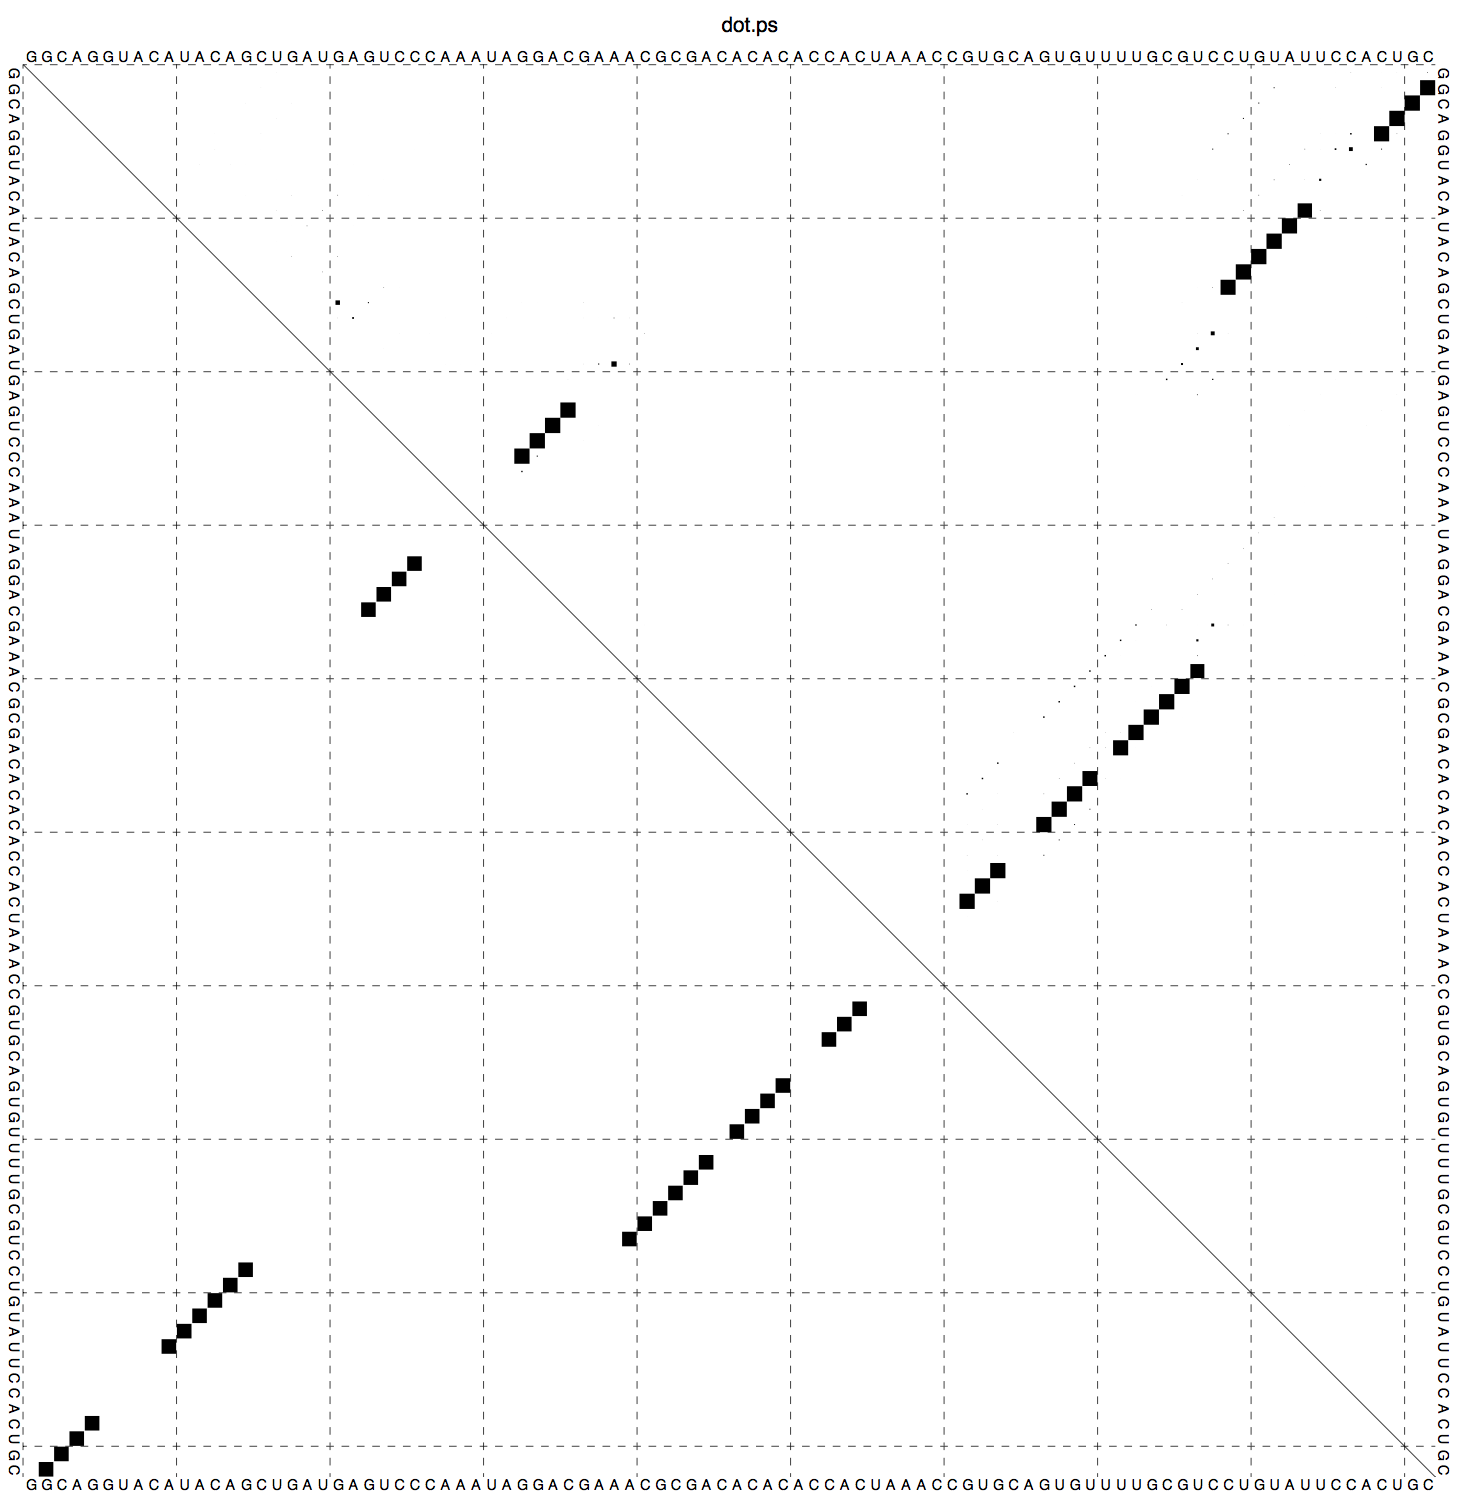

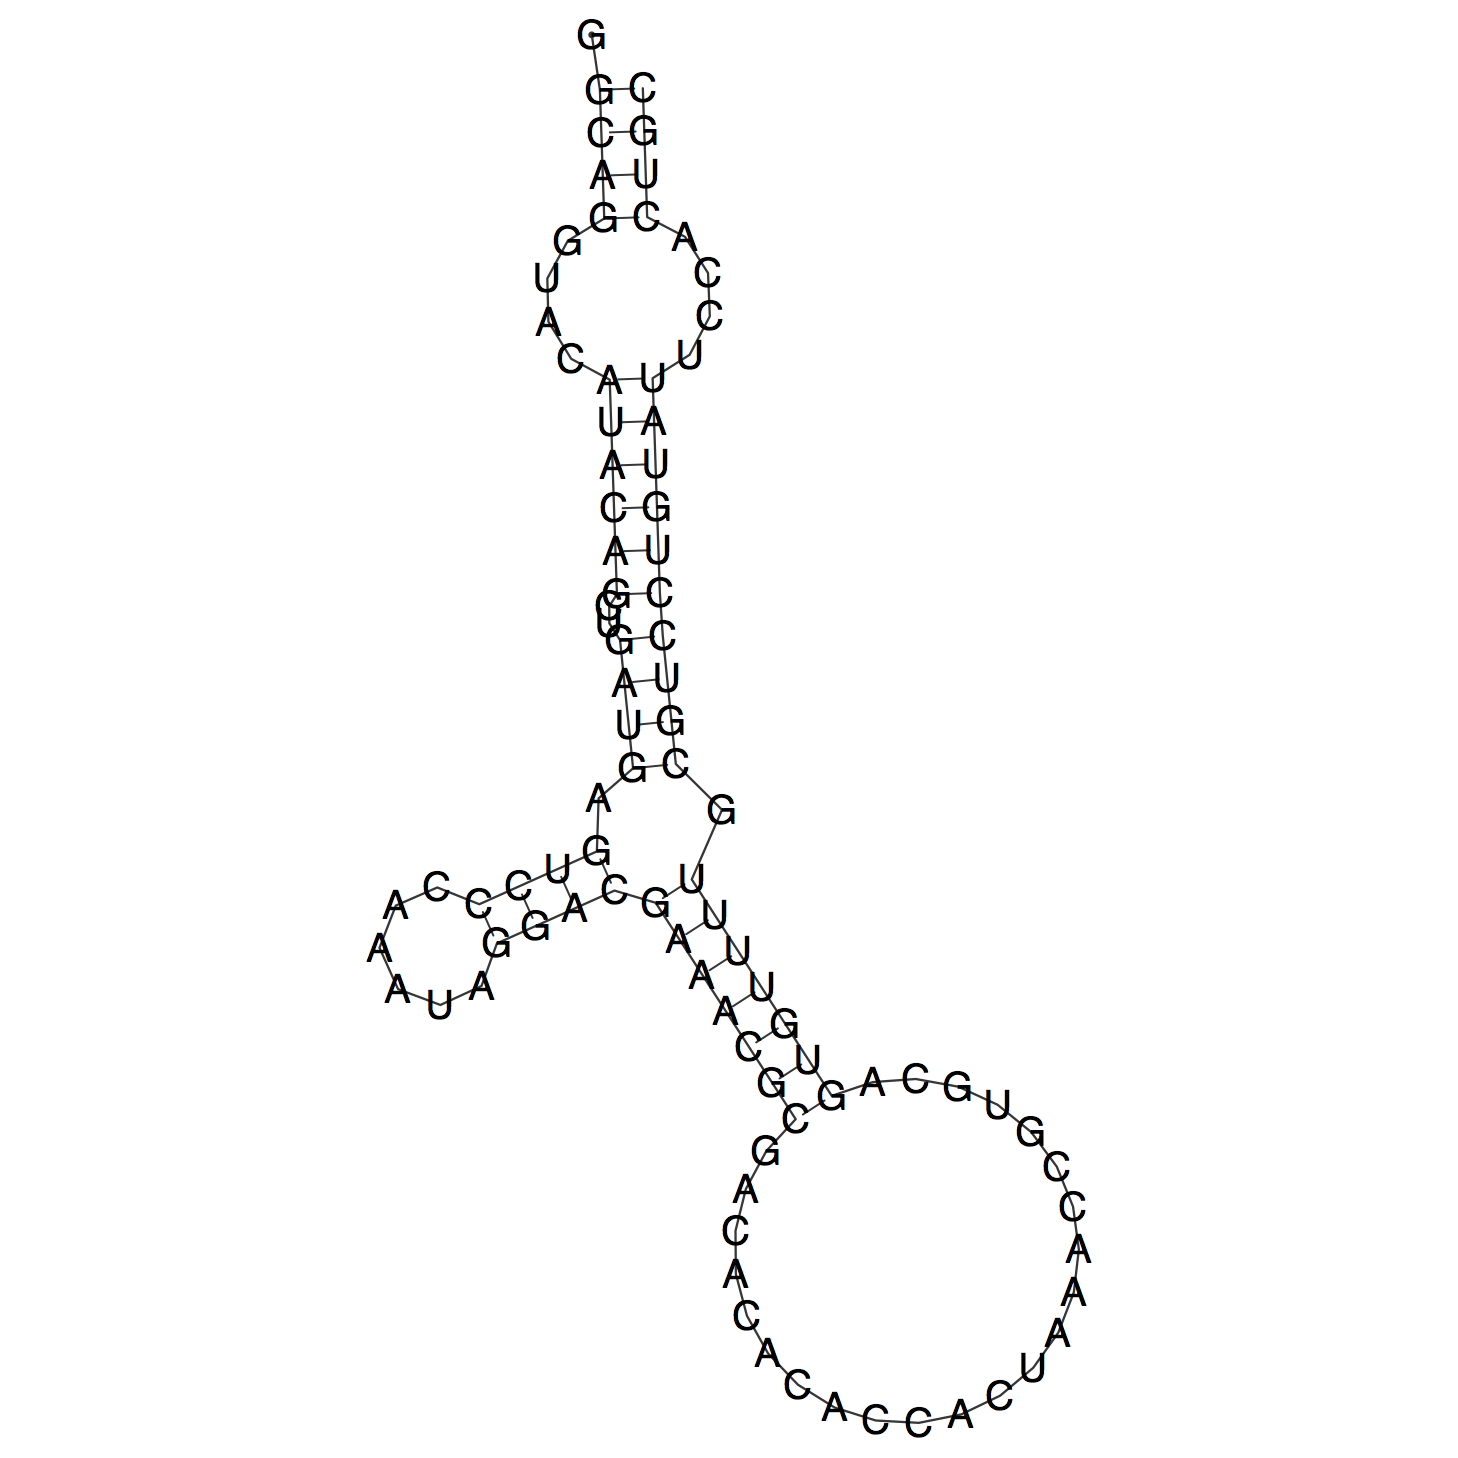

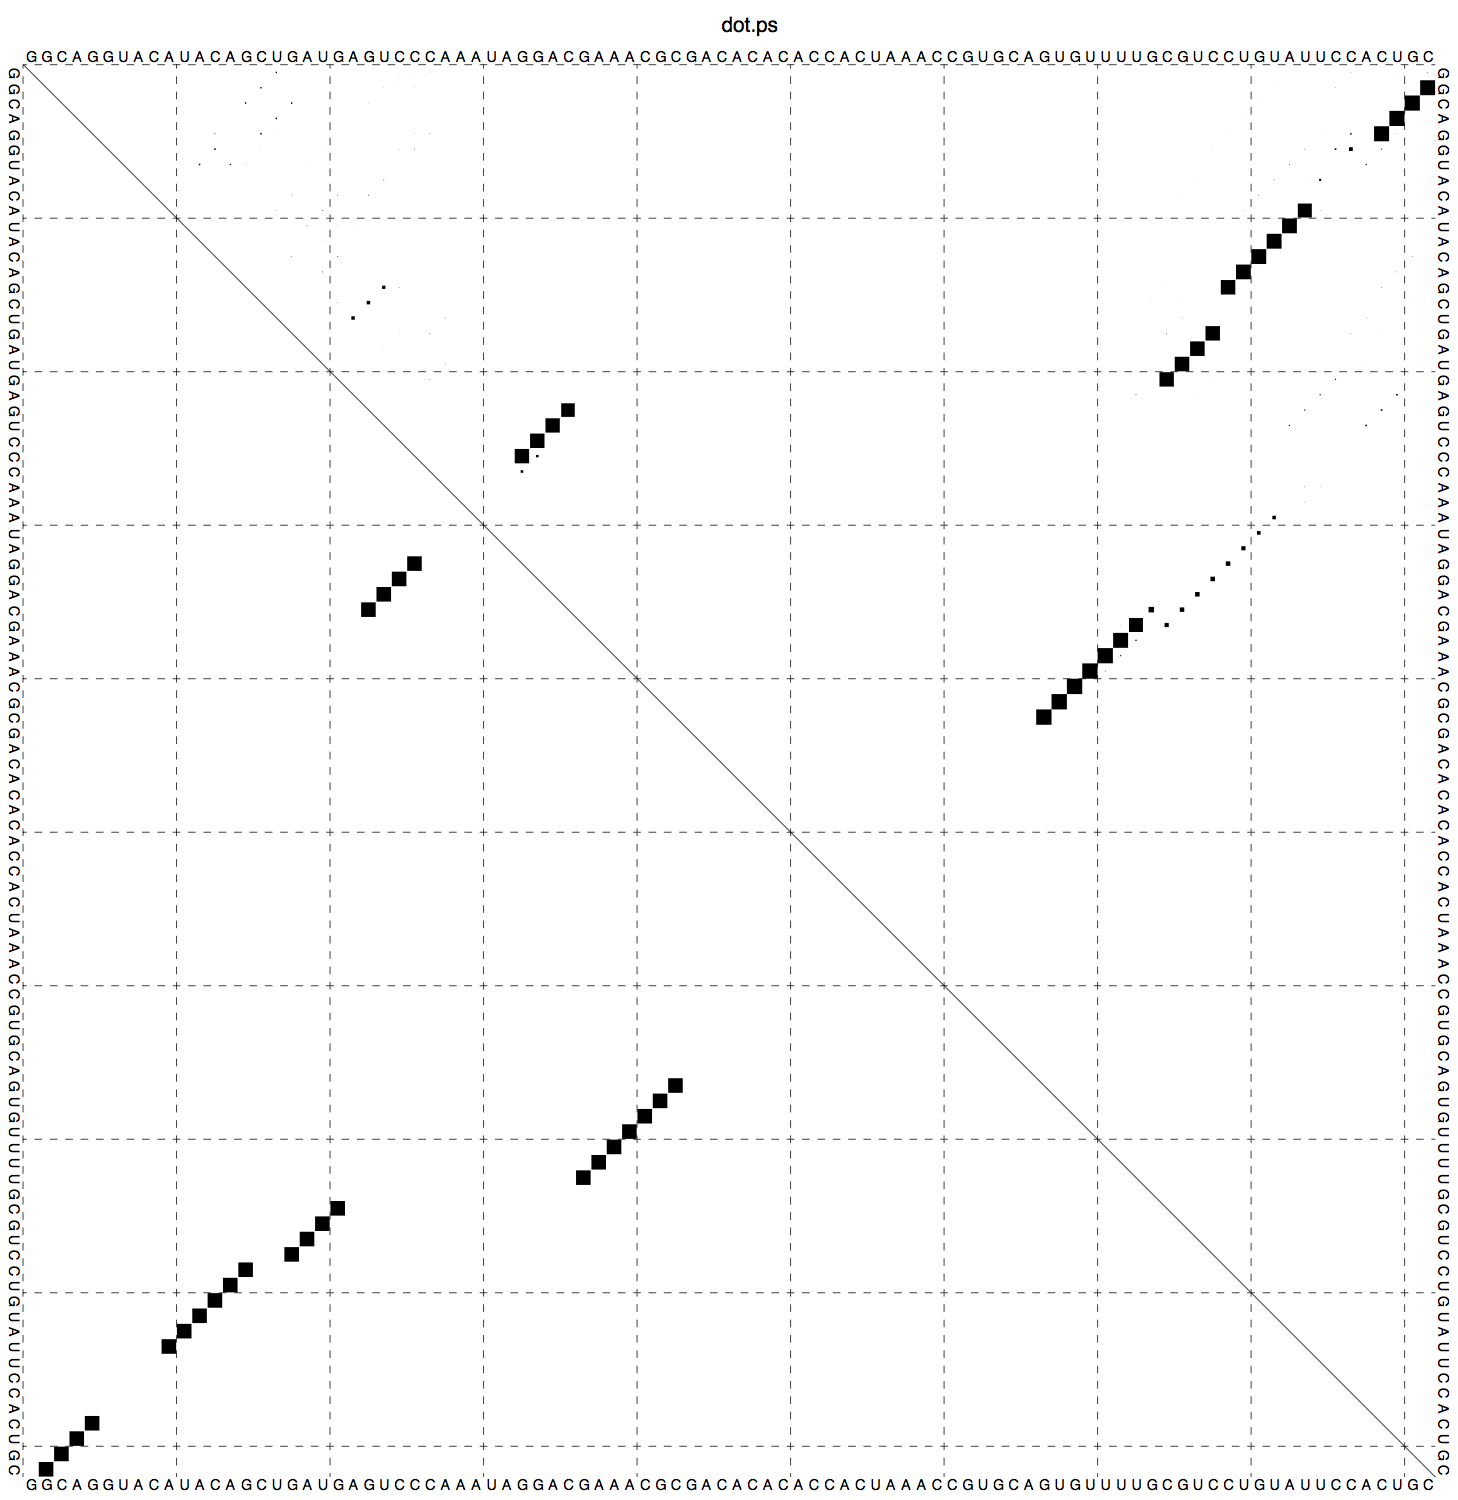

In [97]:
NFFR =Image(filename='NOT_1_FF_rna.png', width=200, height=200)
NFFD =Image(filename='NOT_1_FF_dot.png', width=200, height=200)
NTR =Image(filename='NOT_1_T_rna.png', width=200, height=200)
NTD =Image(filename='NOT_1_T_dot.png', width=200, height=200)

display(NFFR, NFFD, NTR, NTD)

##### AND_1

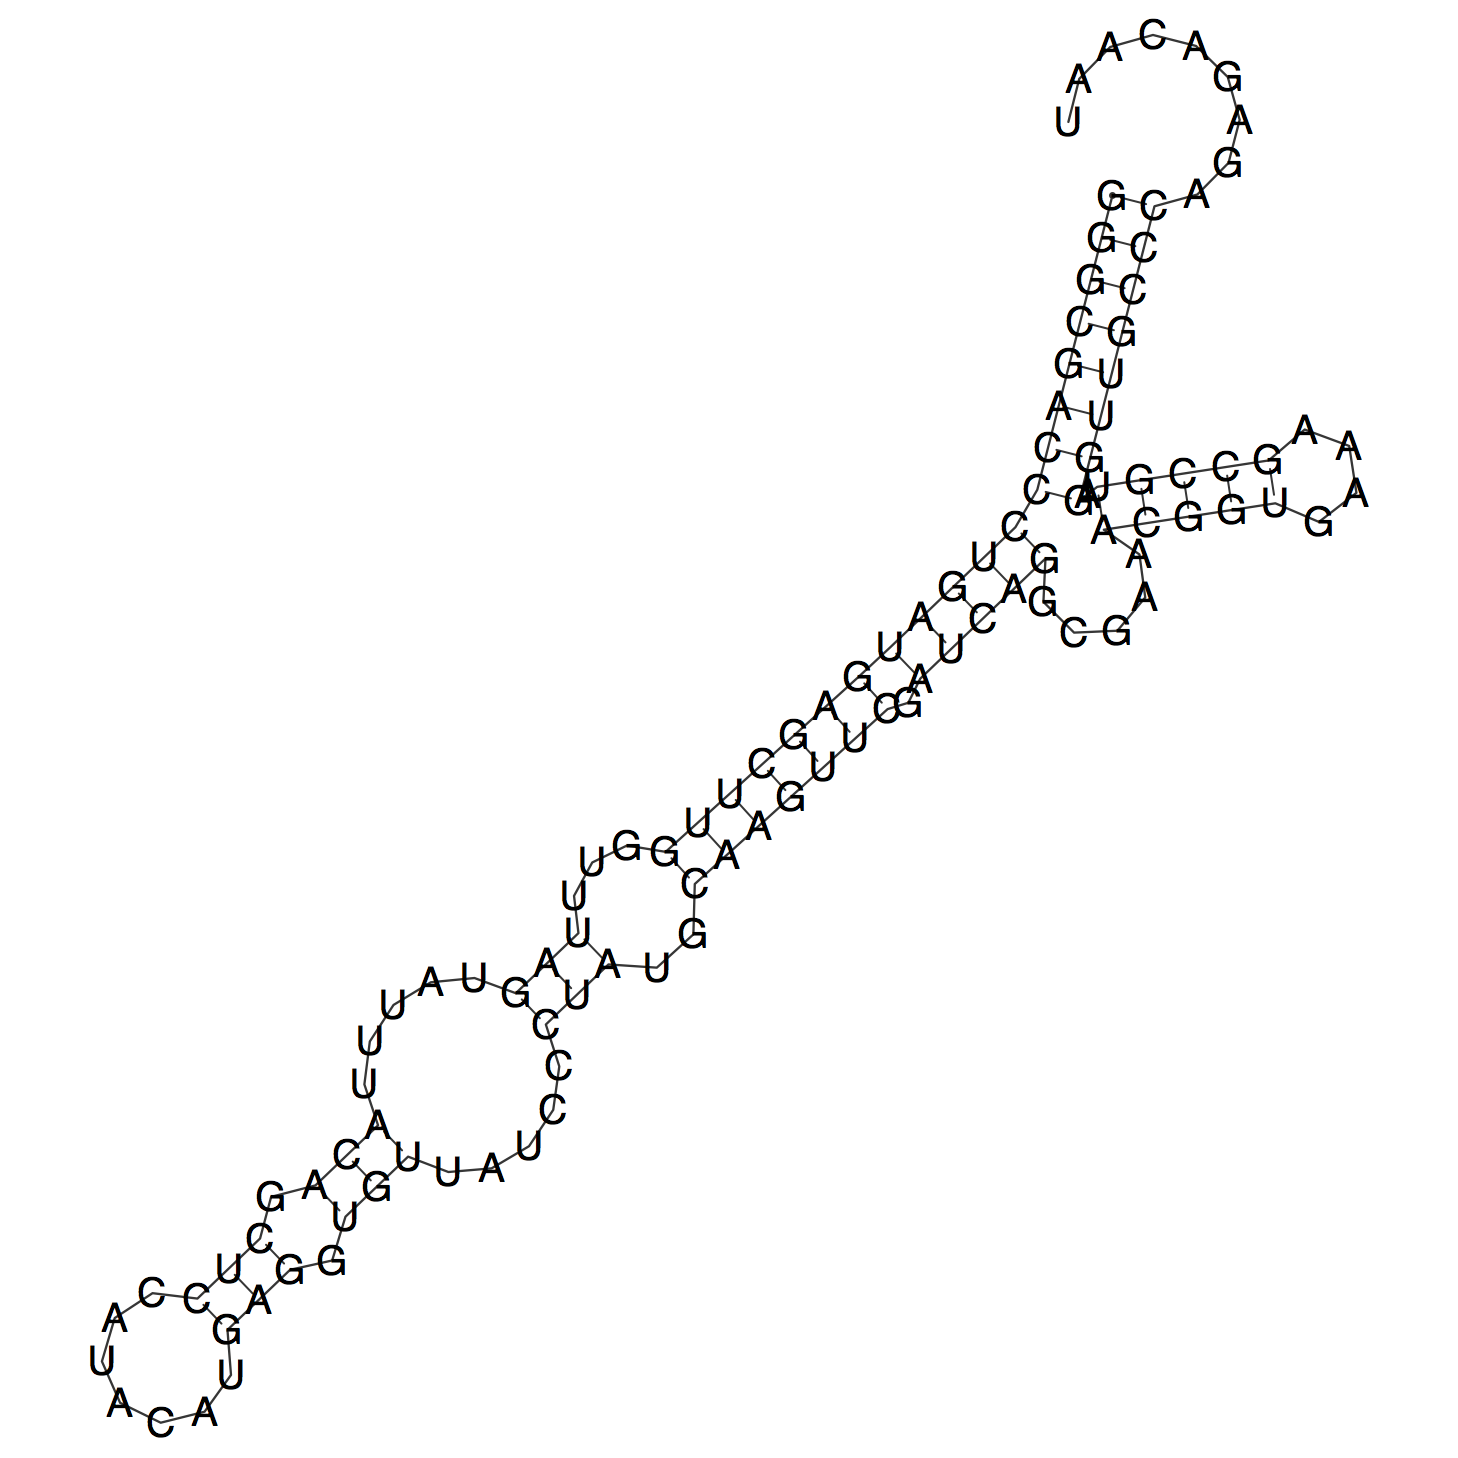

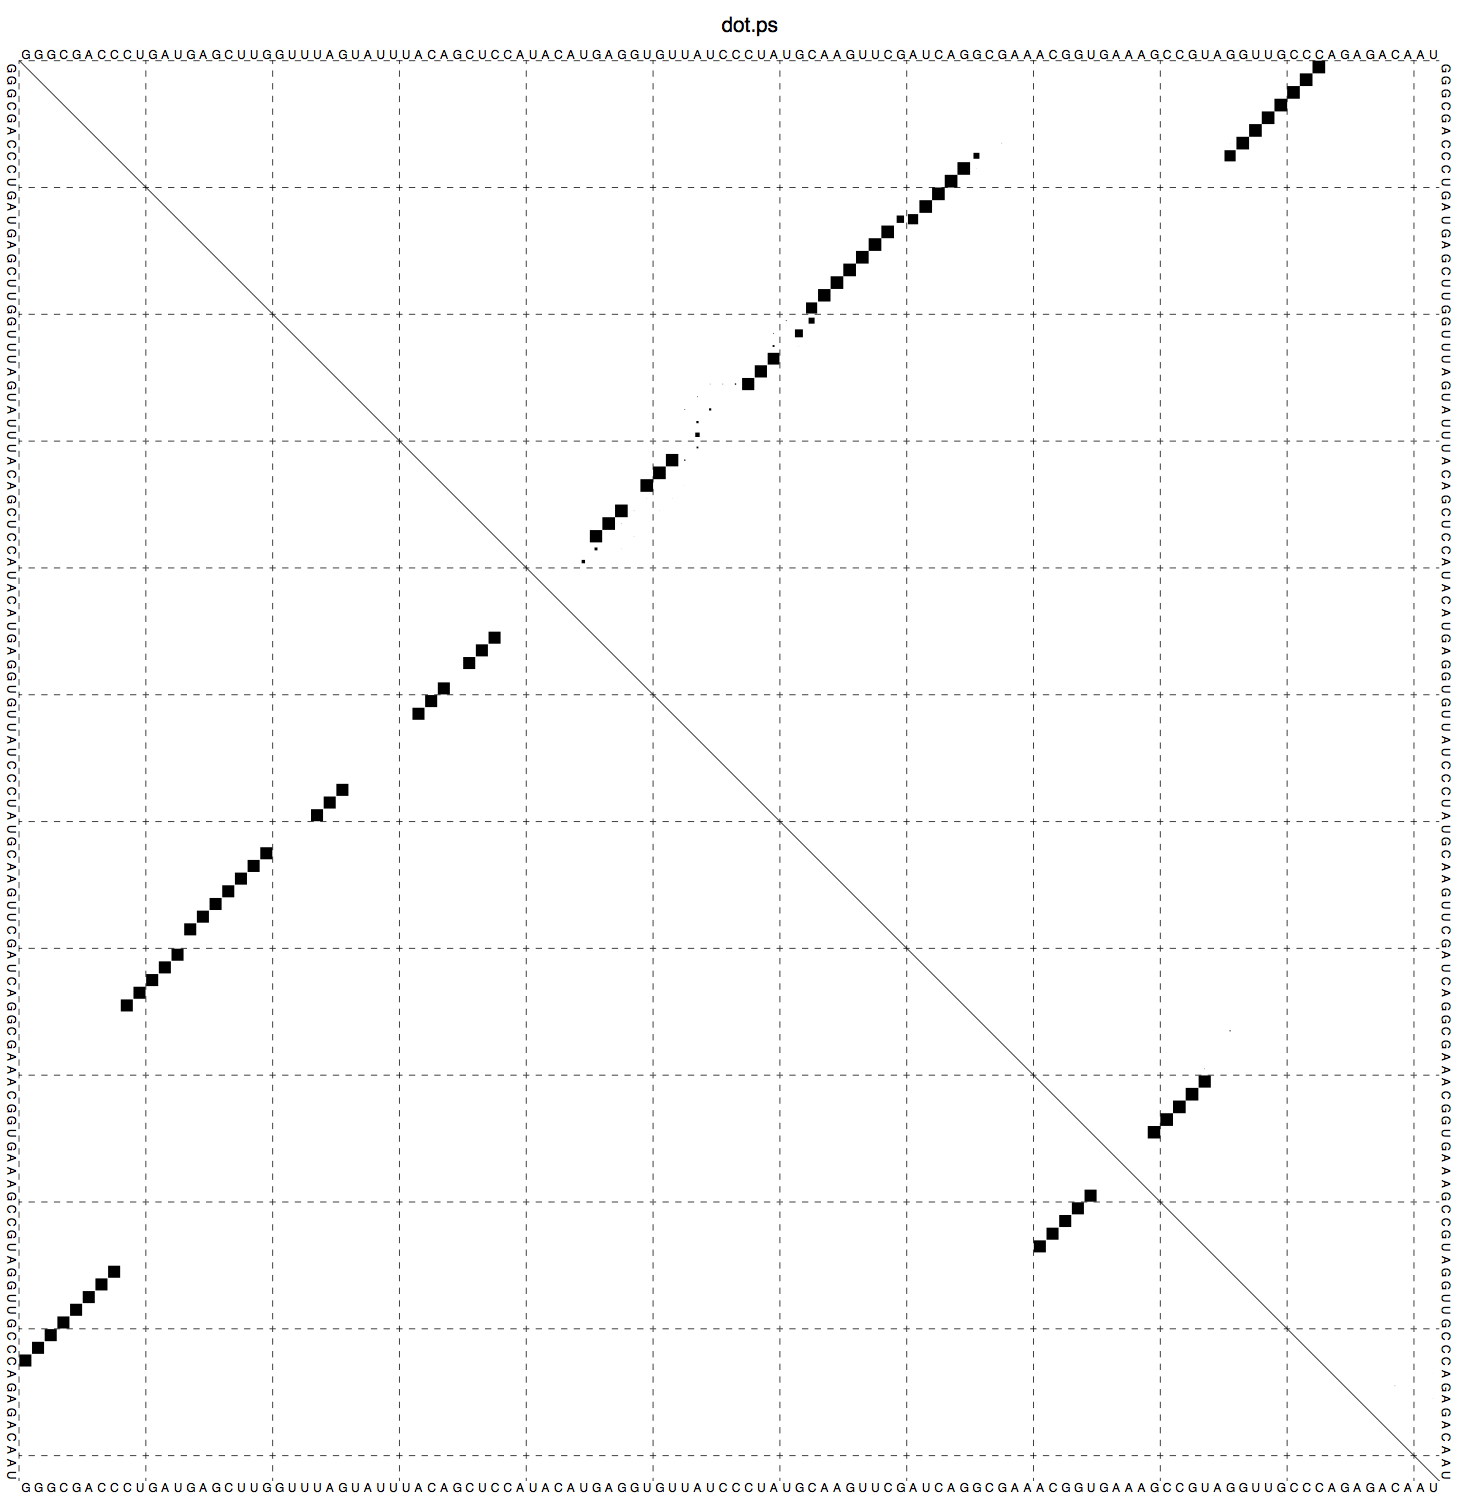

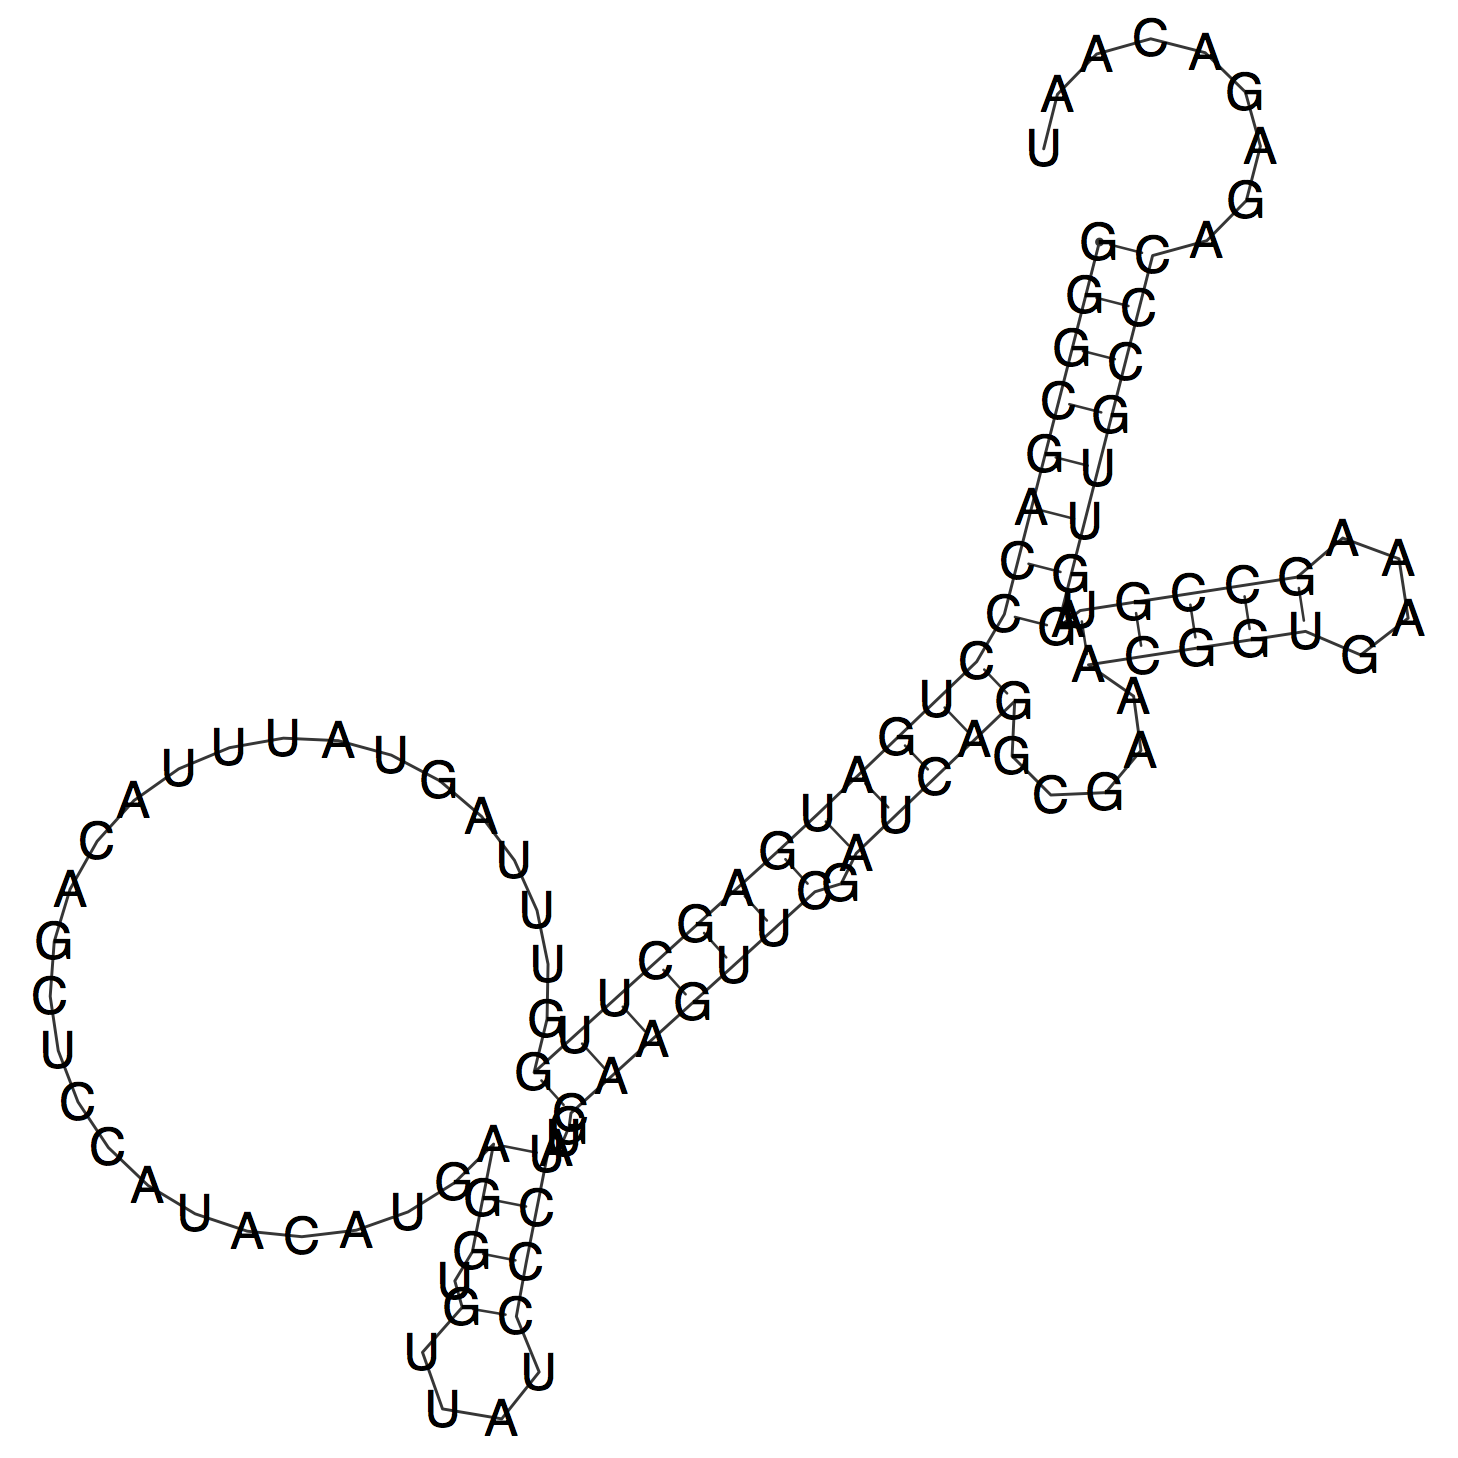

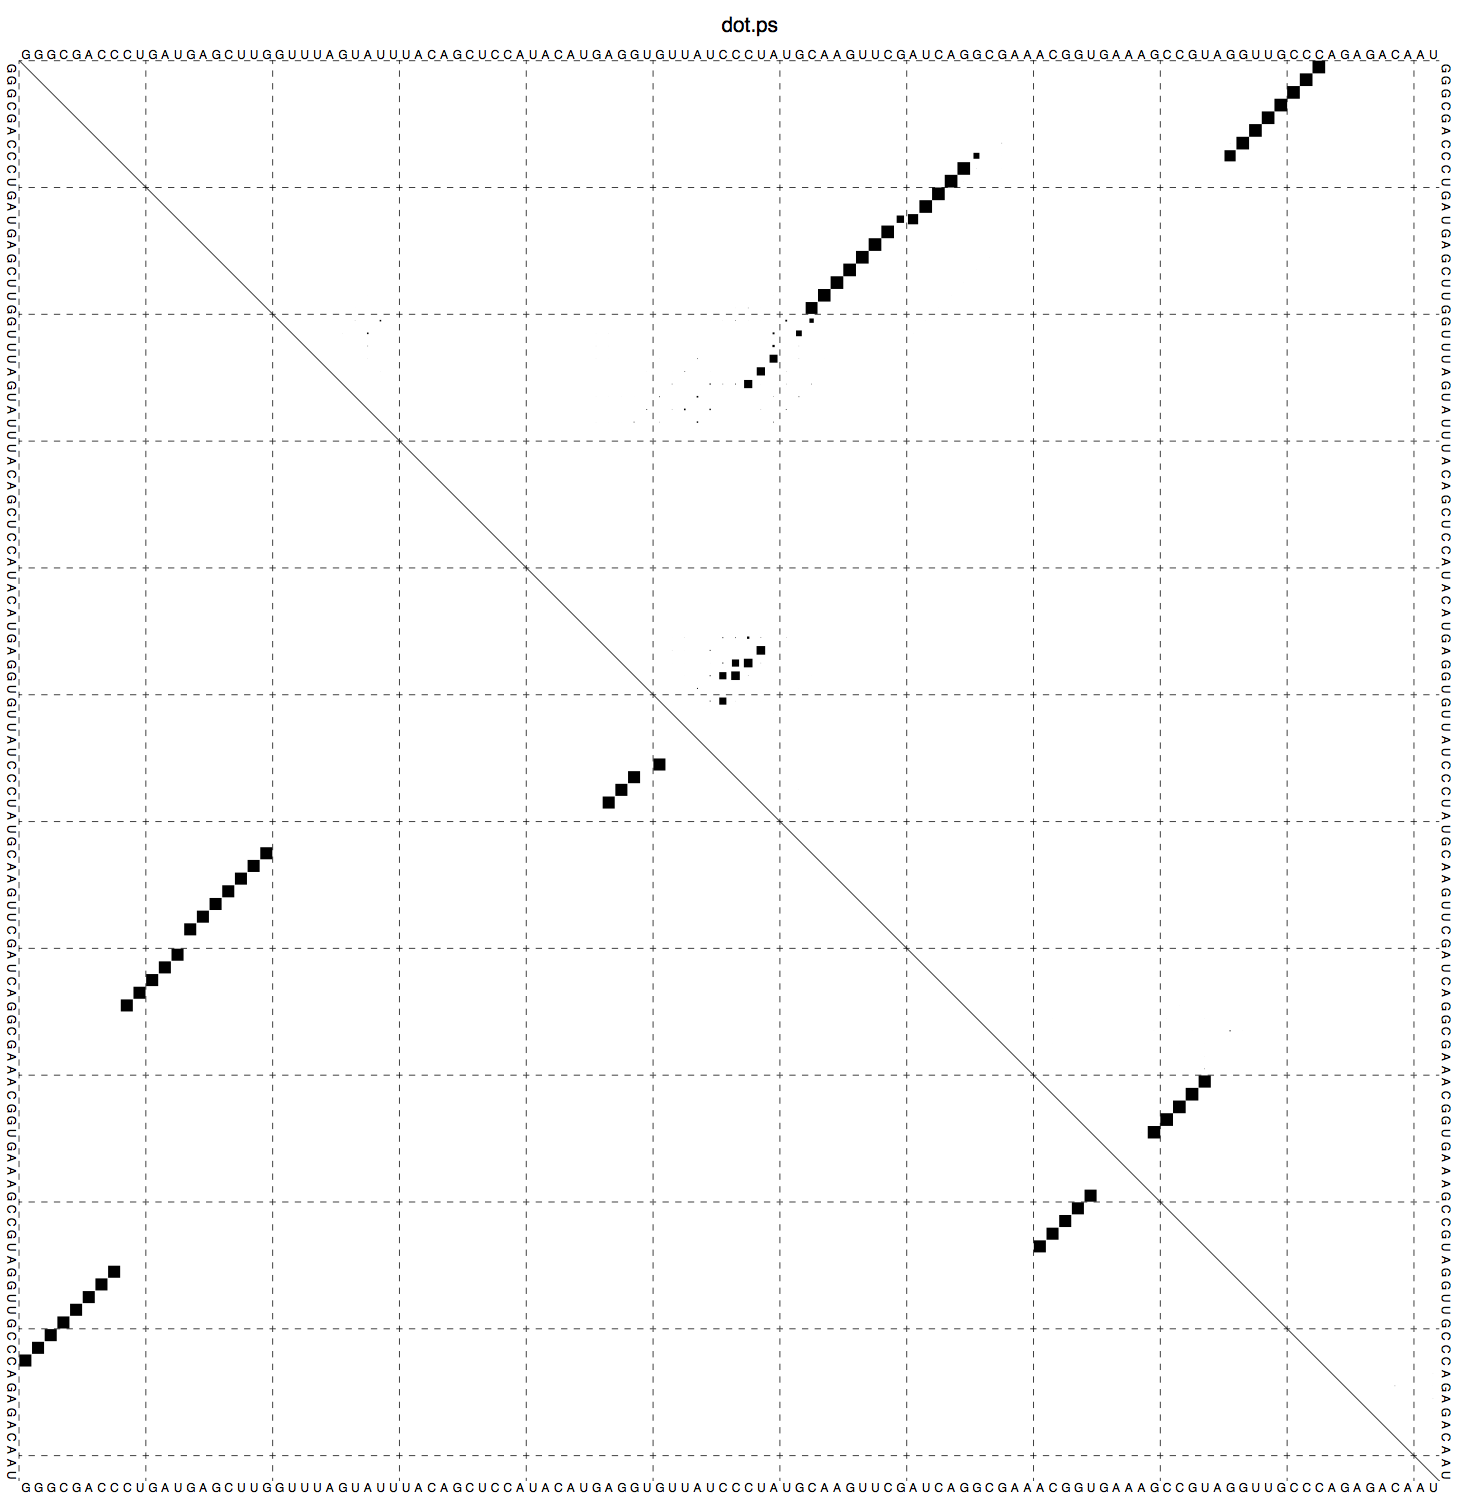

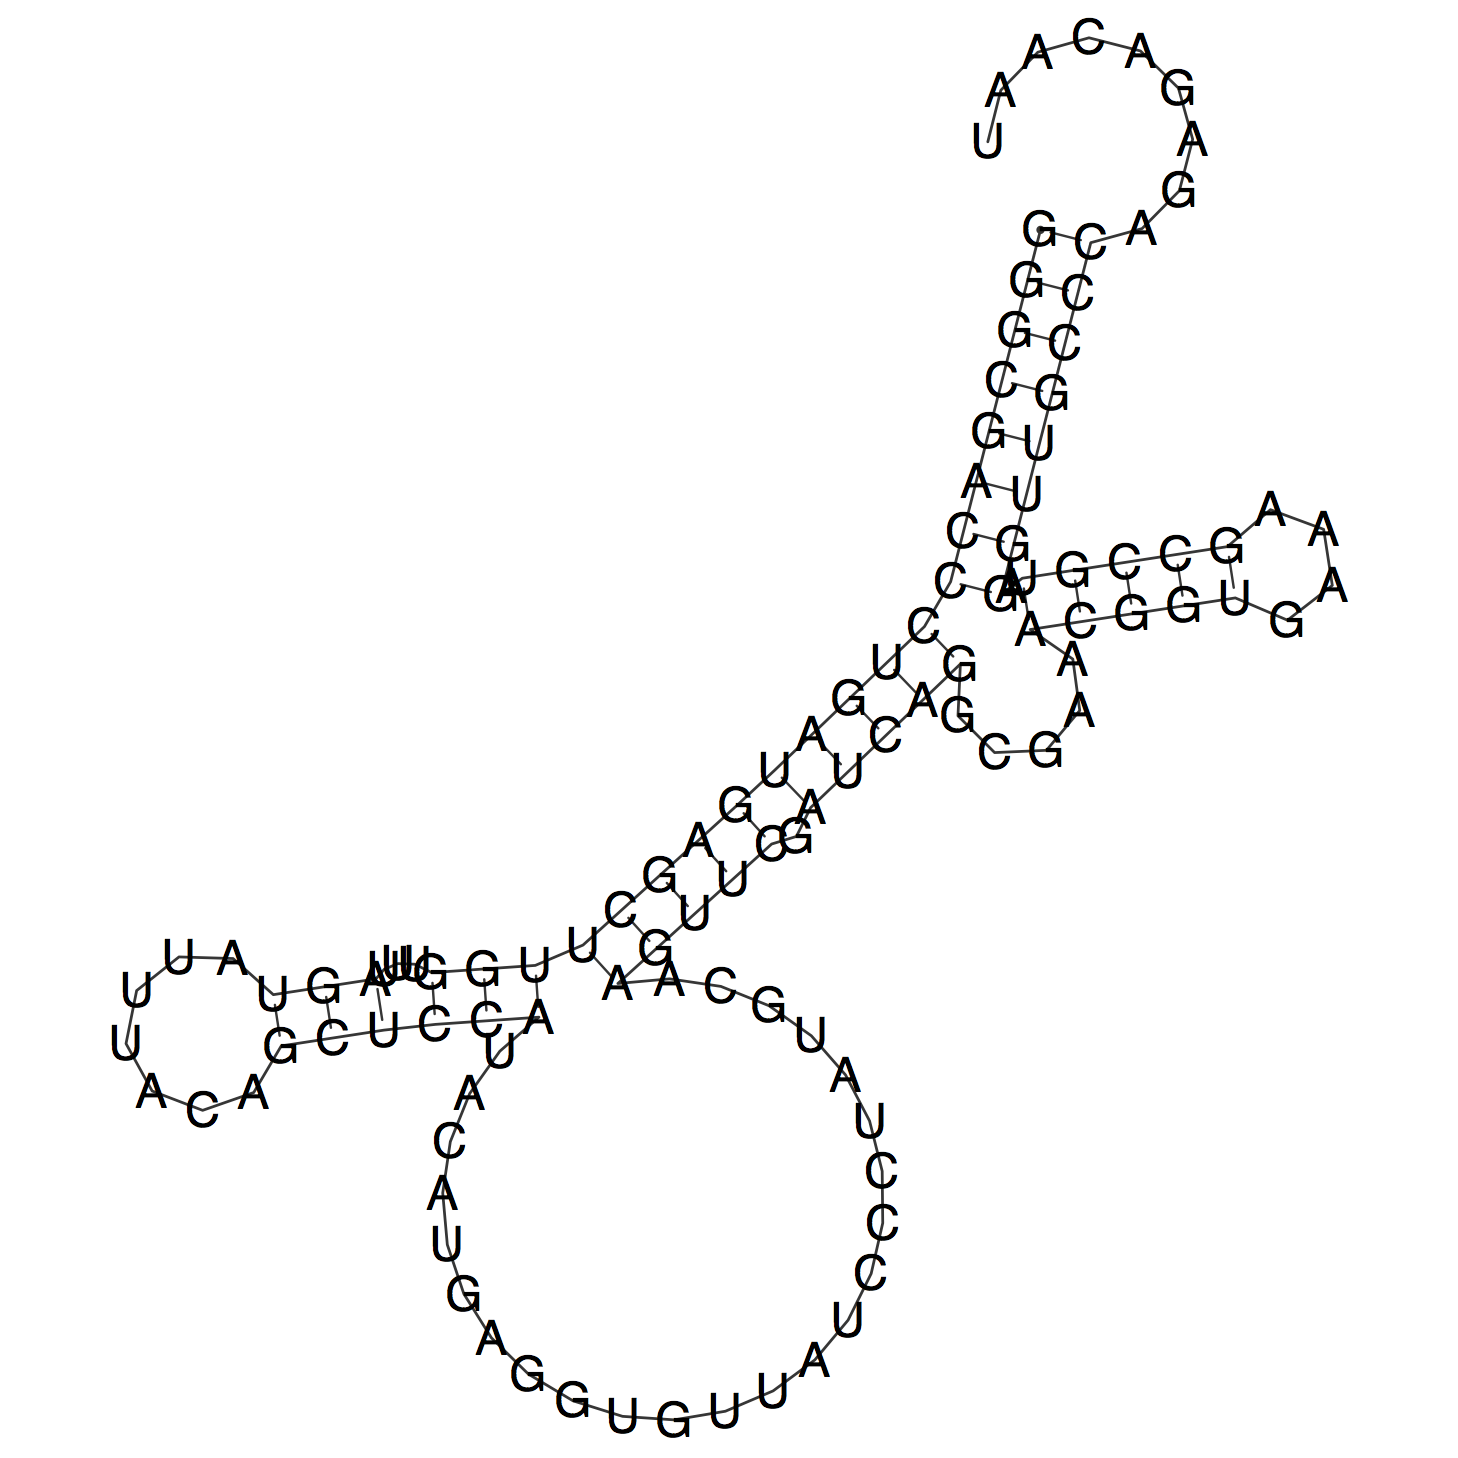

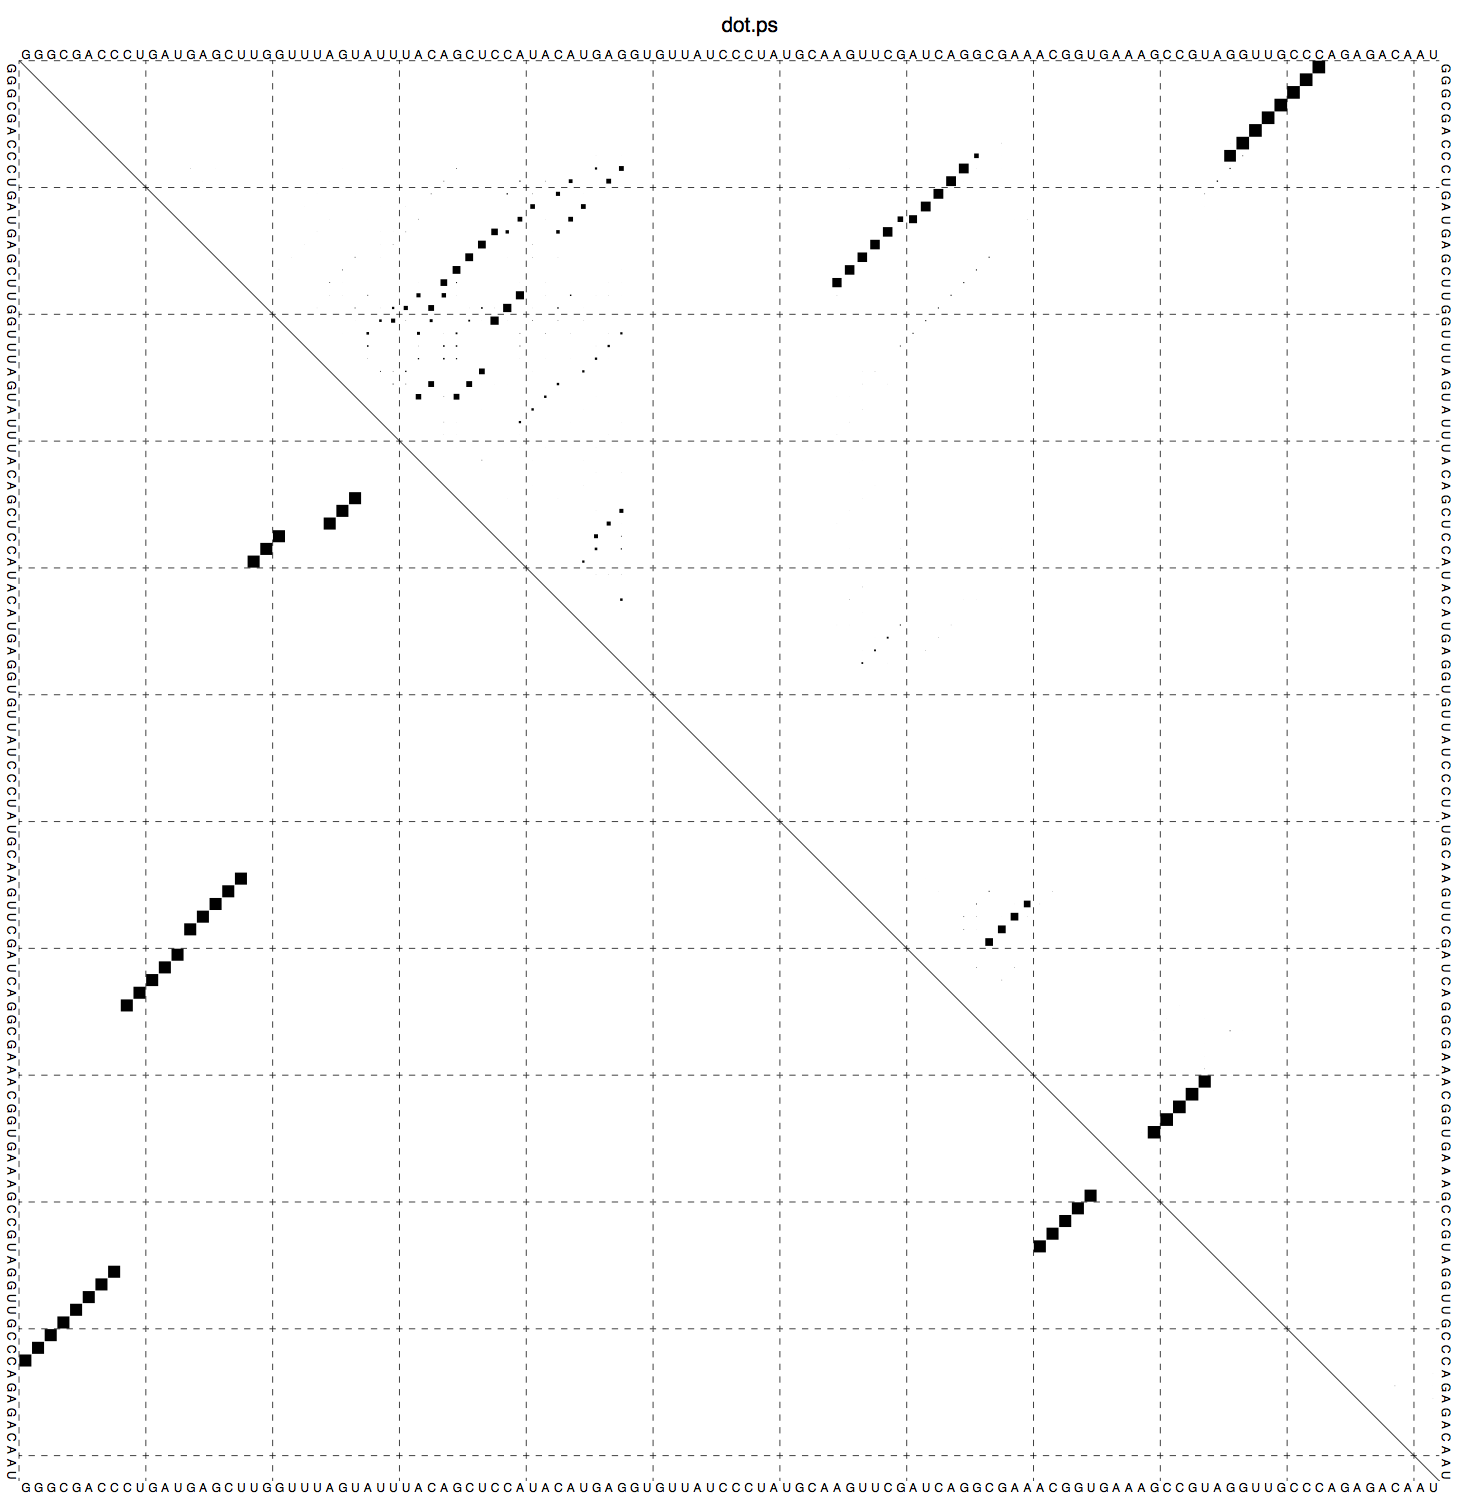

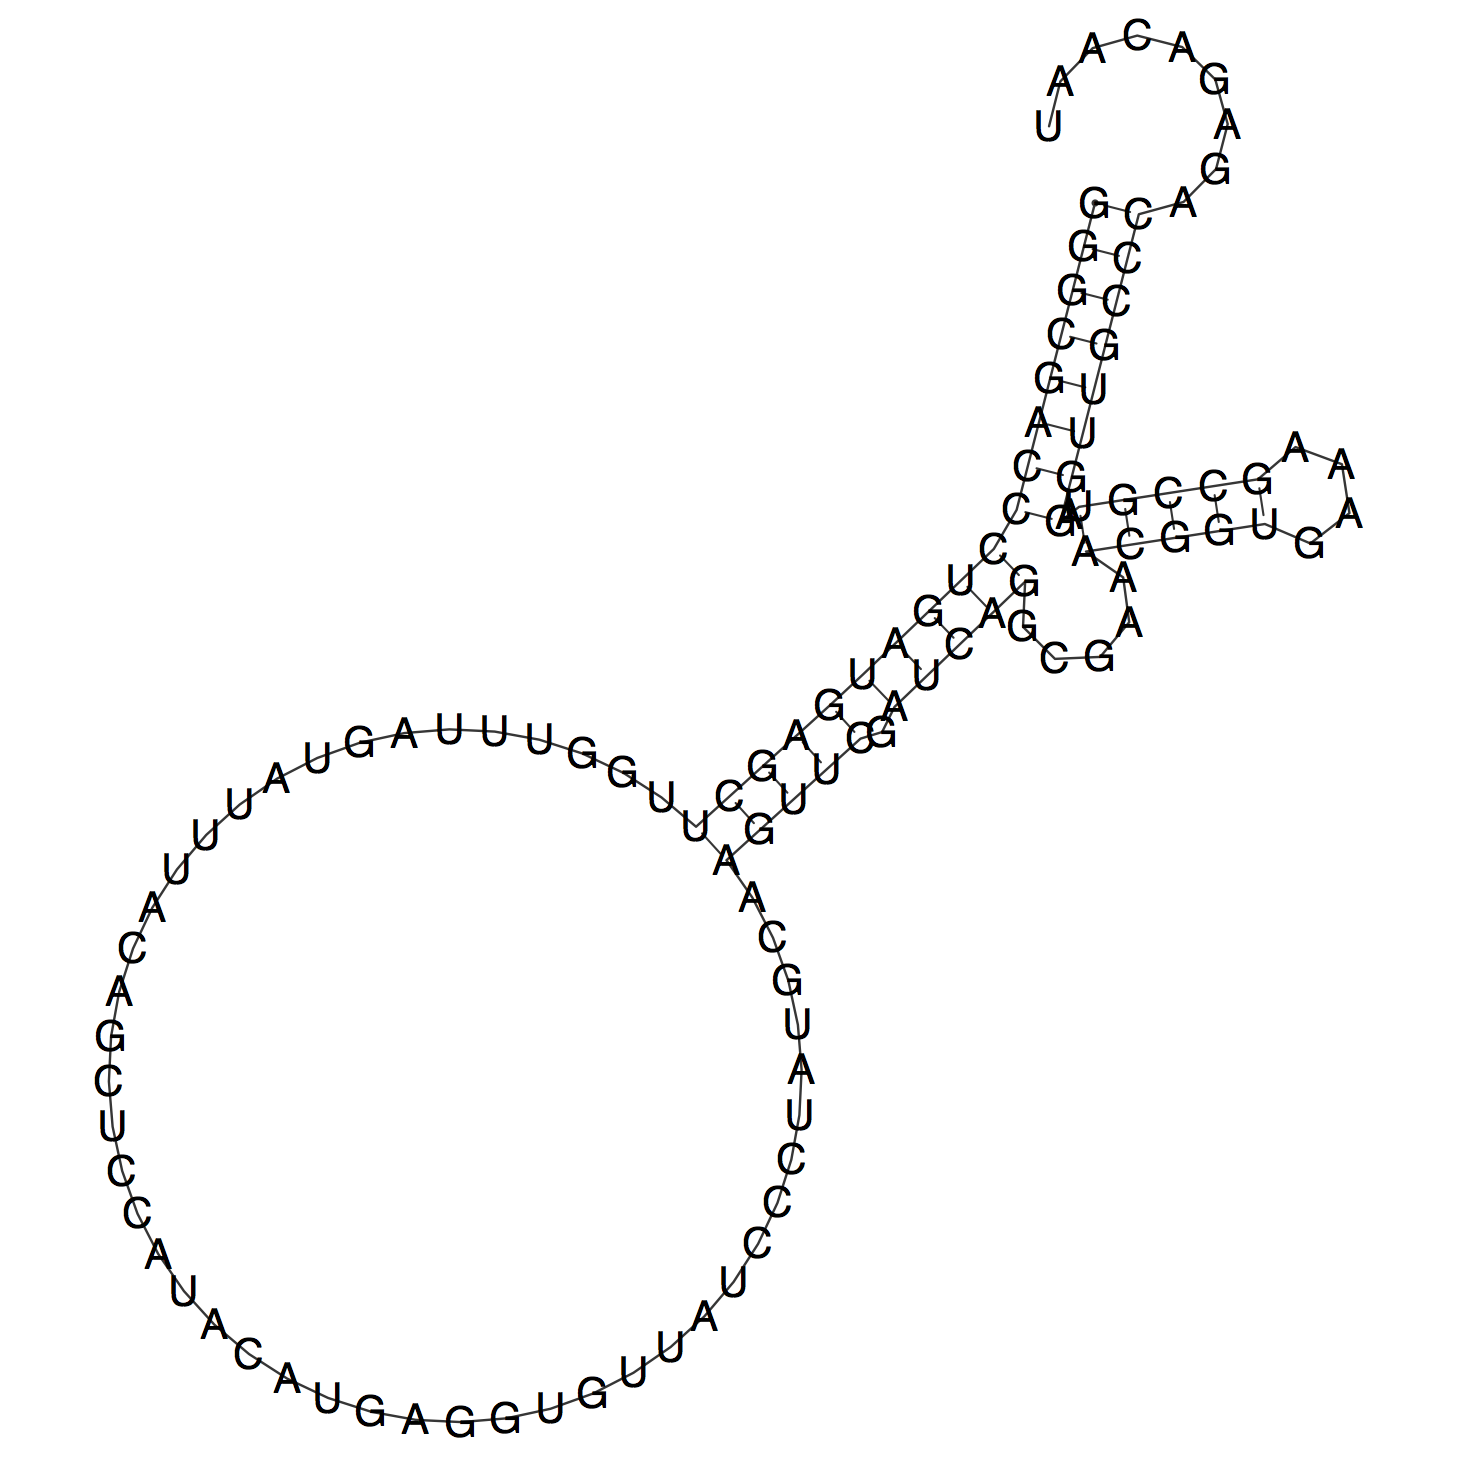

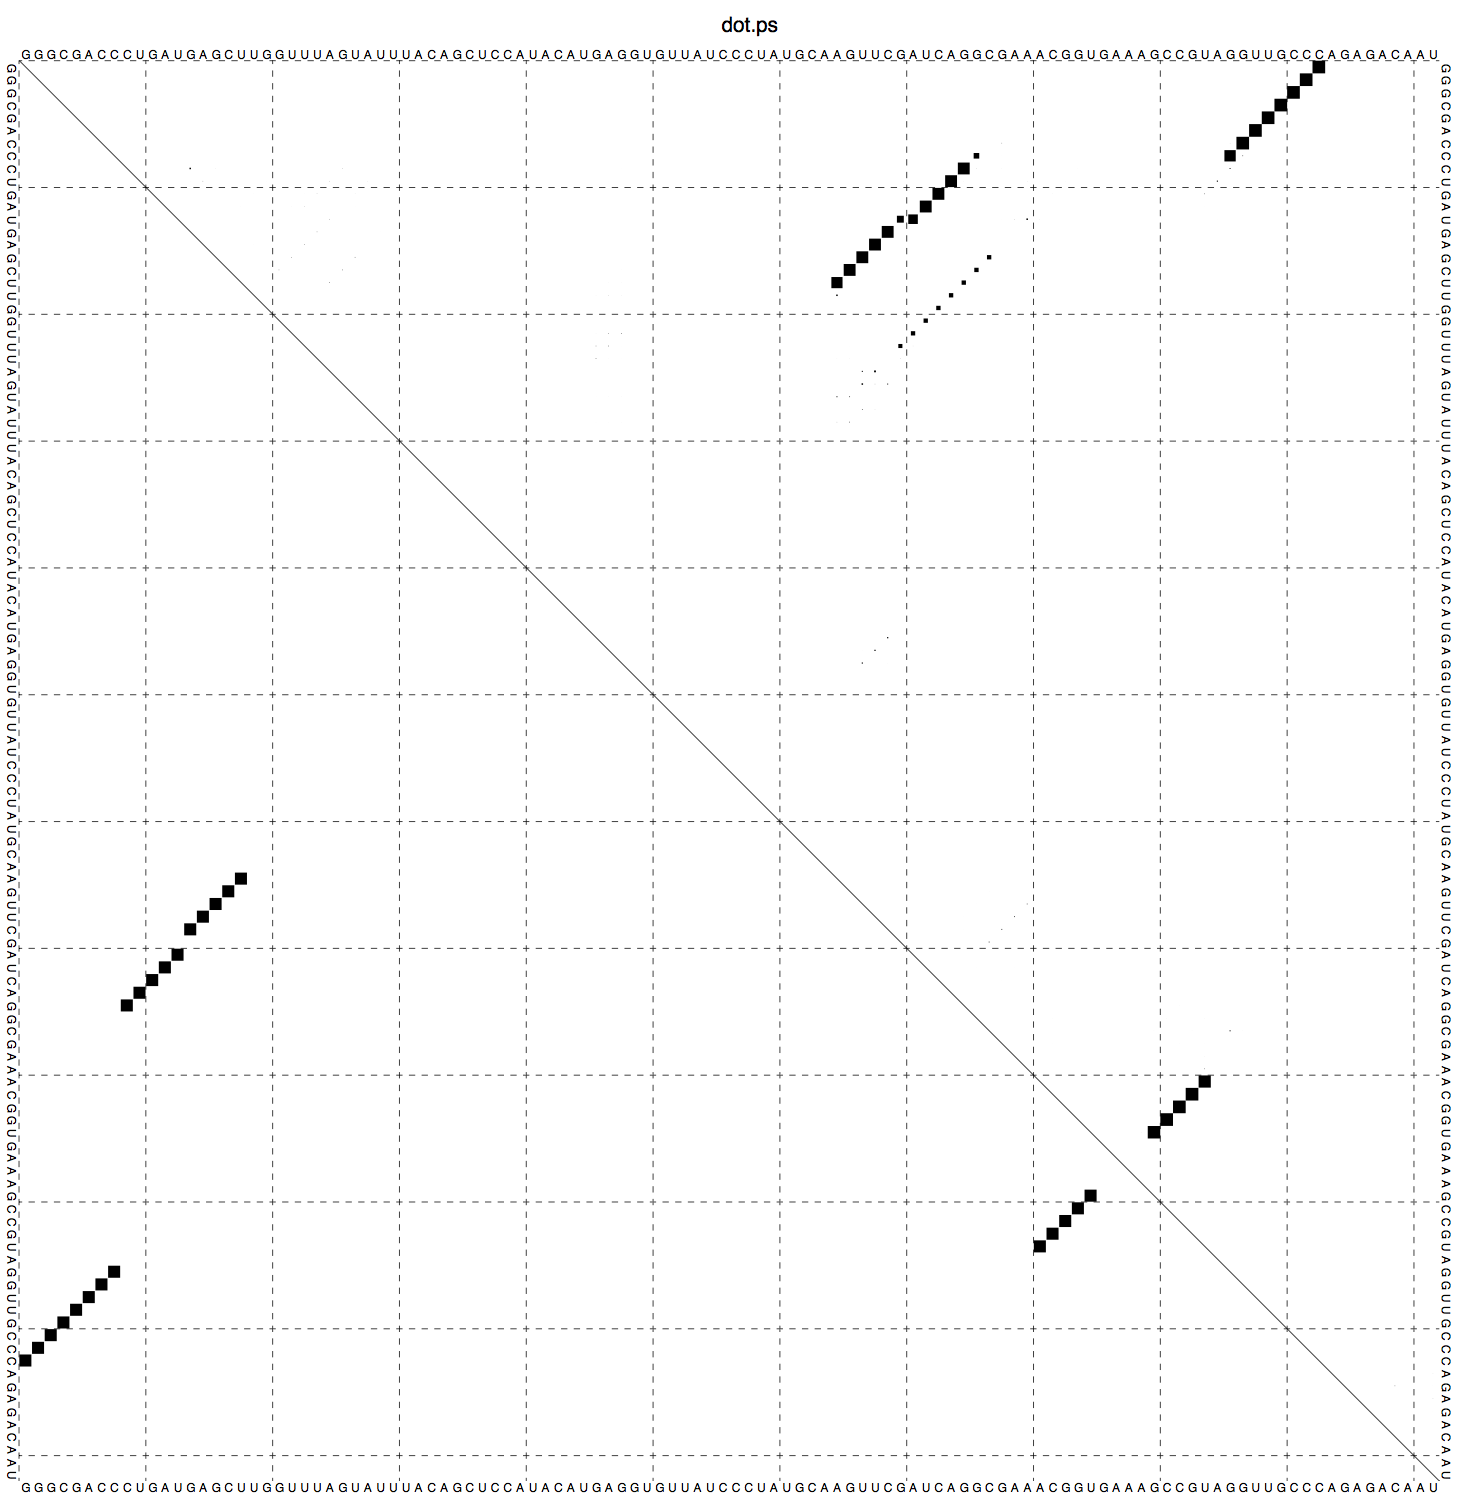

In [99]:
AFFR =Image(filename='AND_1_FF_rna.png', width=200, height=200)
AFFD =Image(filename='AND_1_FF_dot.png', width=200, height=200)

ATFR1 =Image(filename='AND_1_TF_rna.png', width=200, height=200)
ATFD1 =Image(filename='AND_1_TF_dot.png', width=200, height=200)

ATFR2 =Image(filename='AND_1_FT_rna.png', width=200, height=200)
ATFD2 =Image(filename='AND_1_FT_dot.png', width=200, height=200)

ATTR =Image(filename='AND_1_TT_rna.png', width=200, height=200)
ATTD =Image(filename='AND_1_TT_dot.png', width=200, height=200)
display(AFFR, AFFD, ATFR1, ATFD1, ATFR2, ATFD2, ATTR, ATTD)

##### OR_1

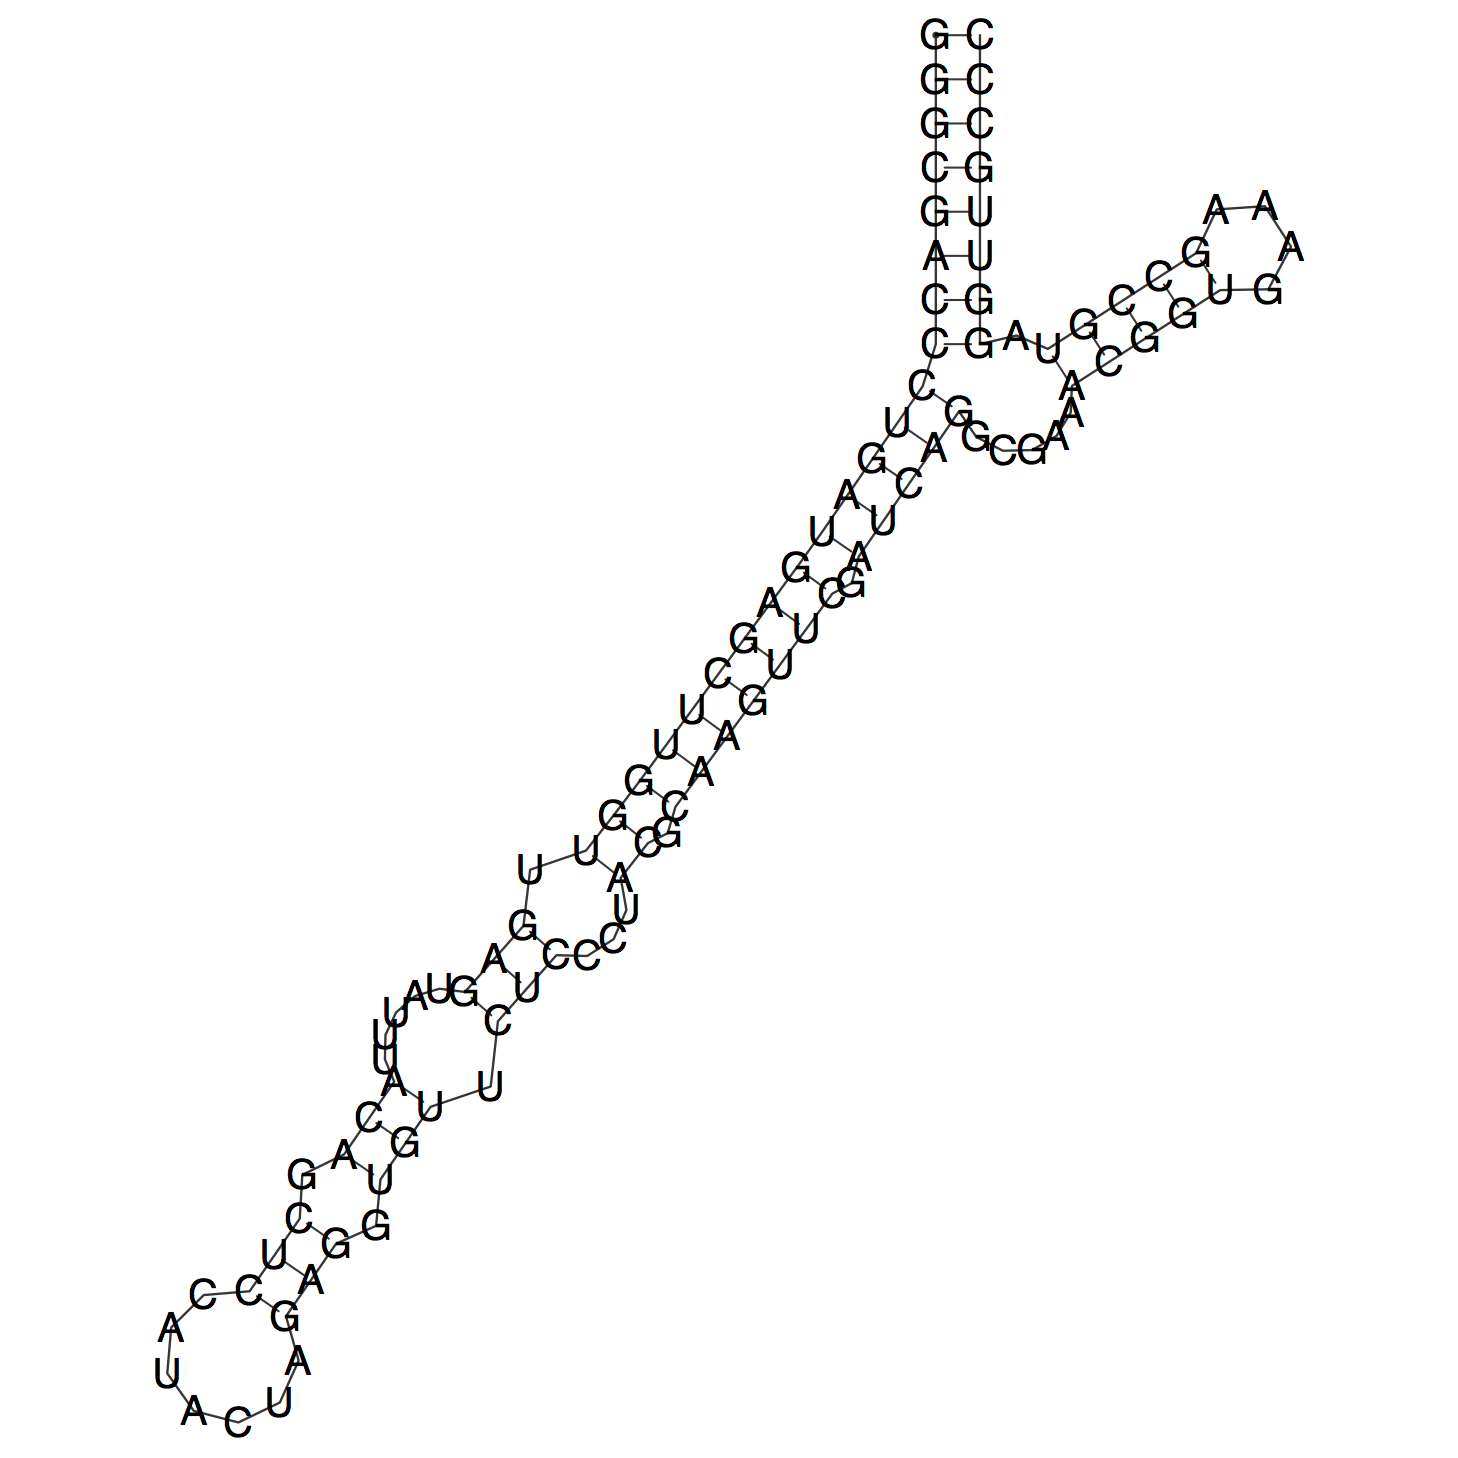

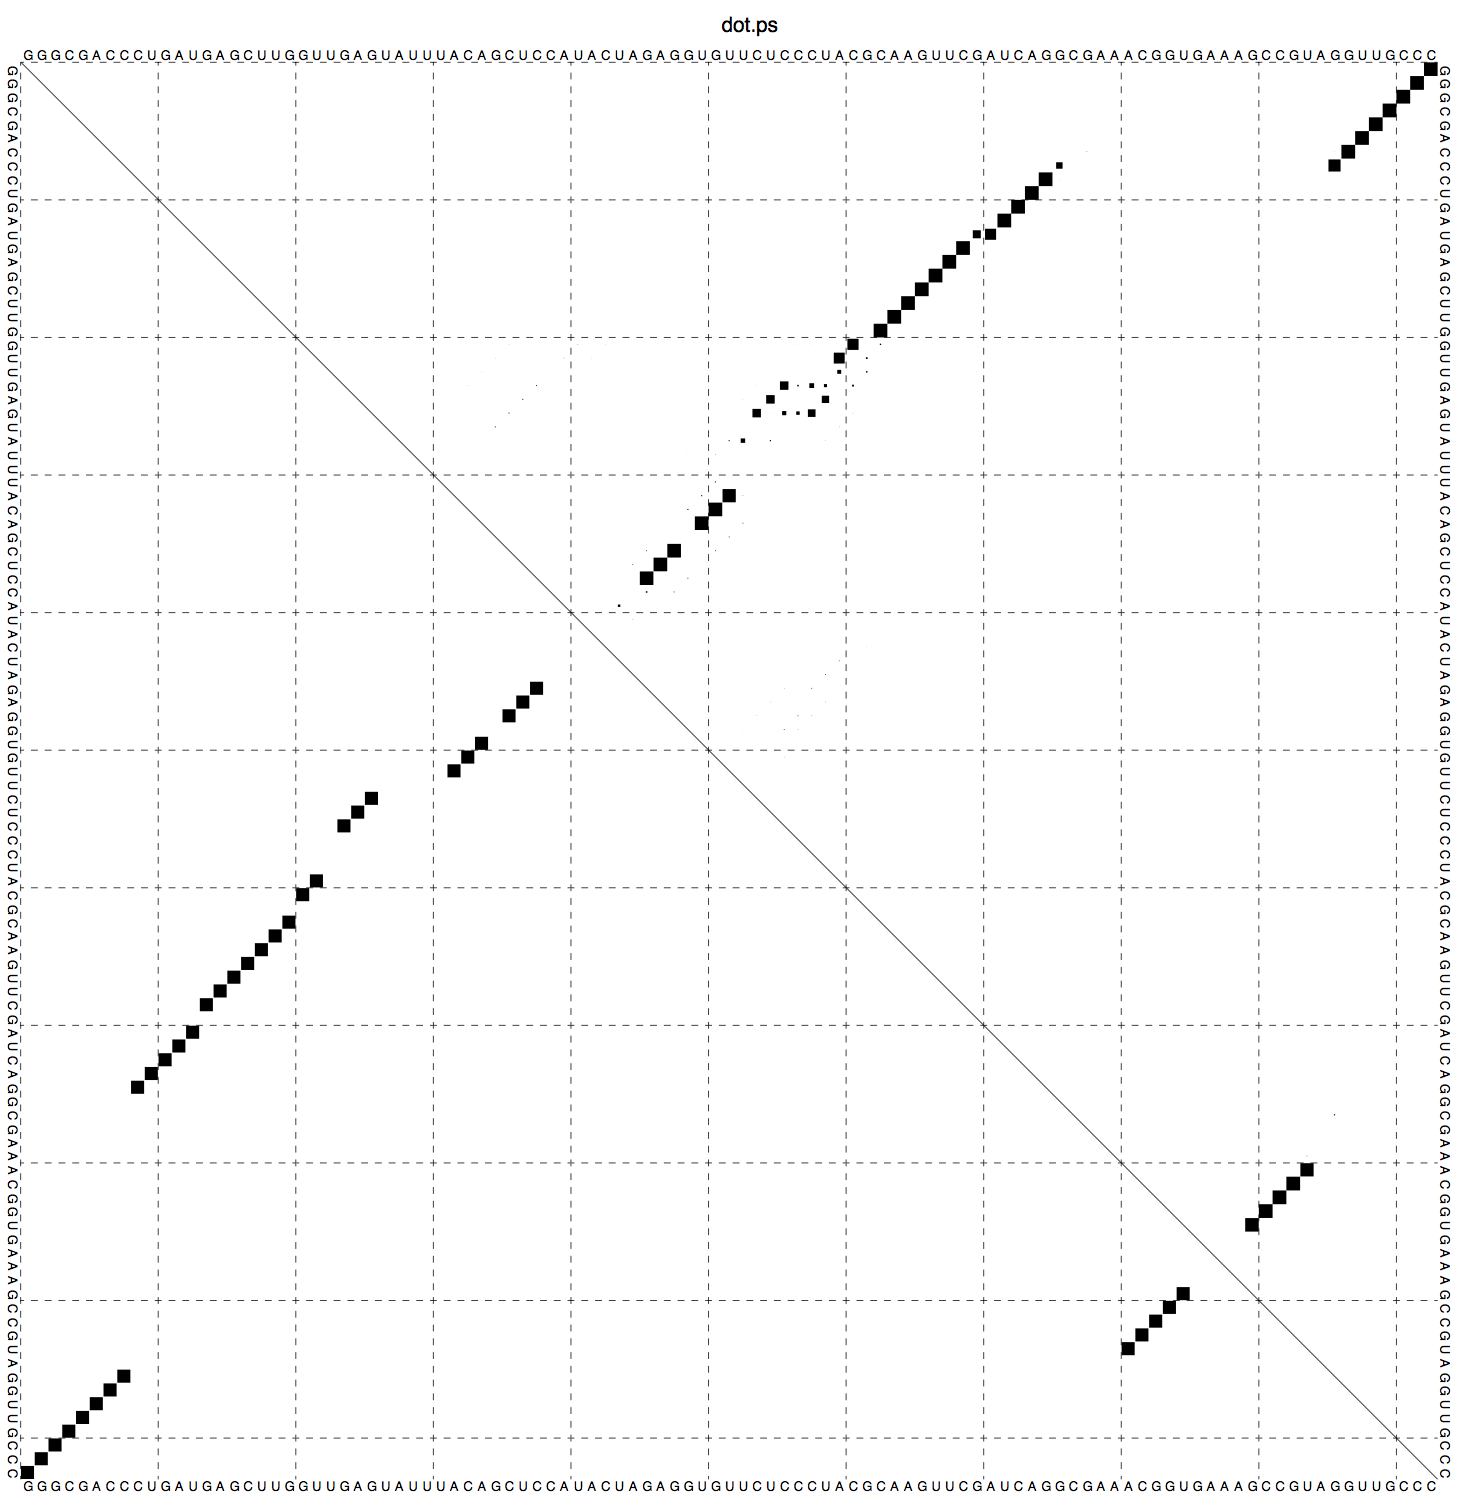

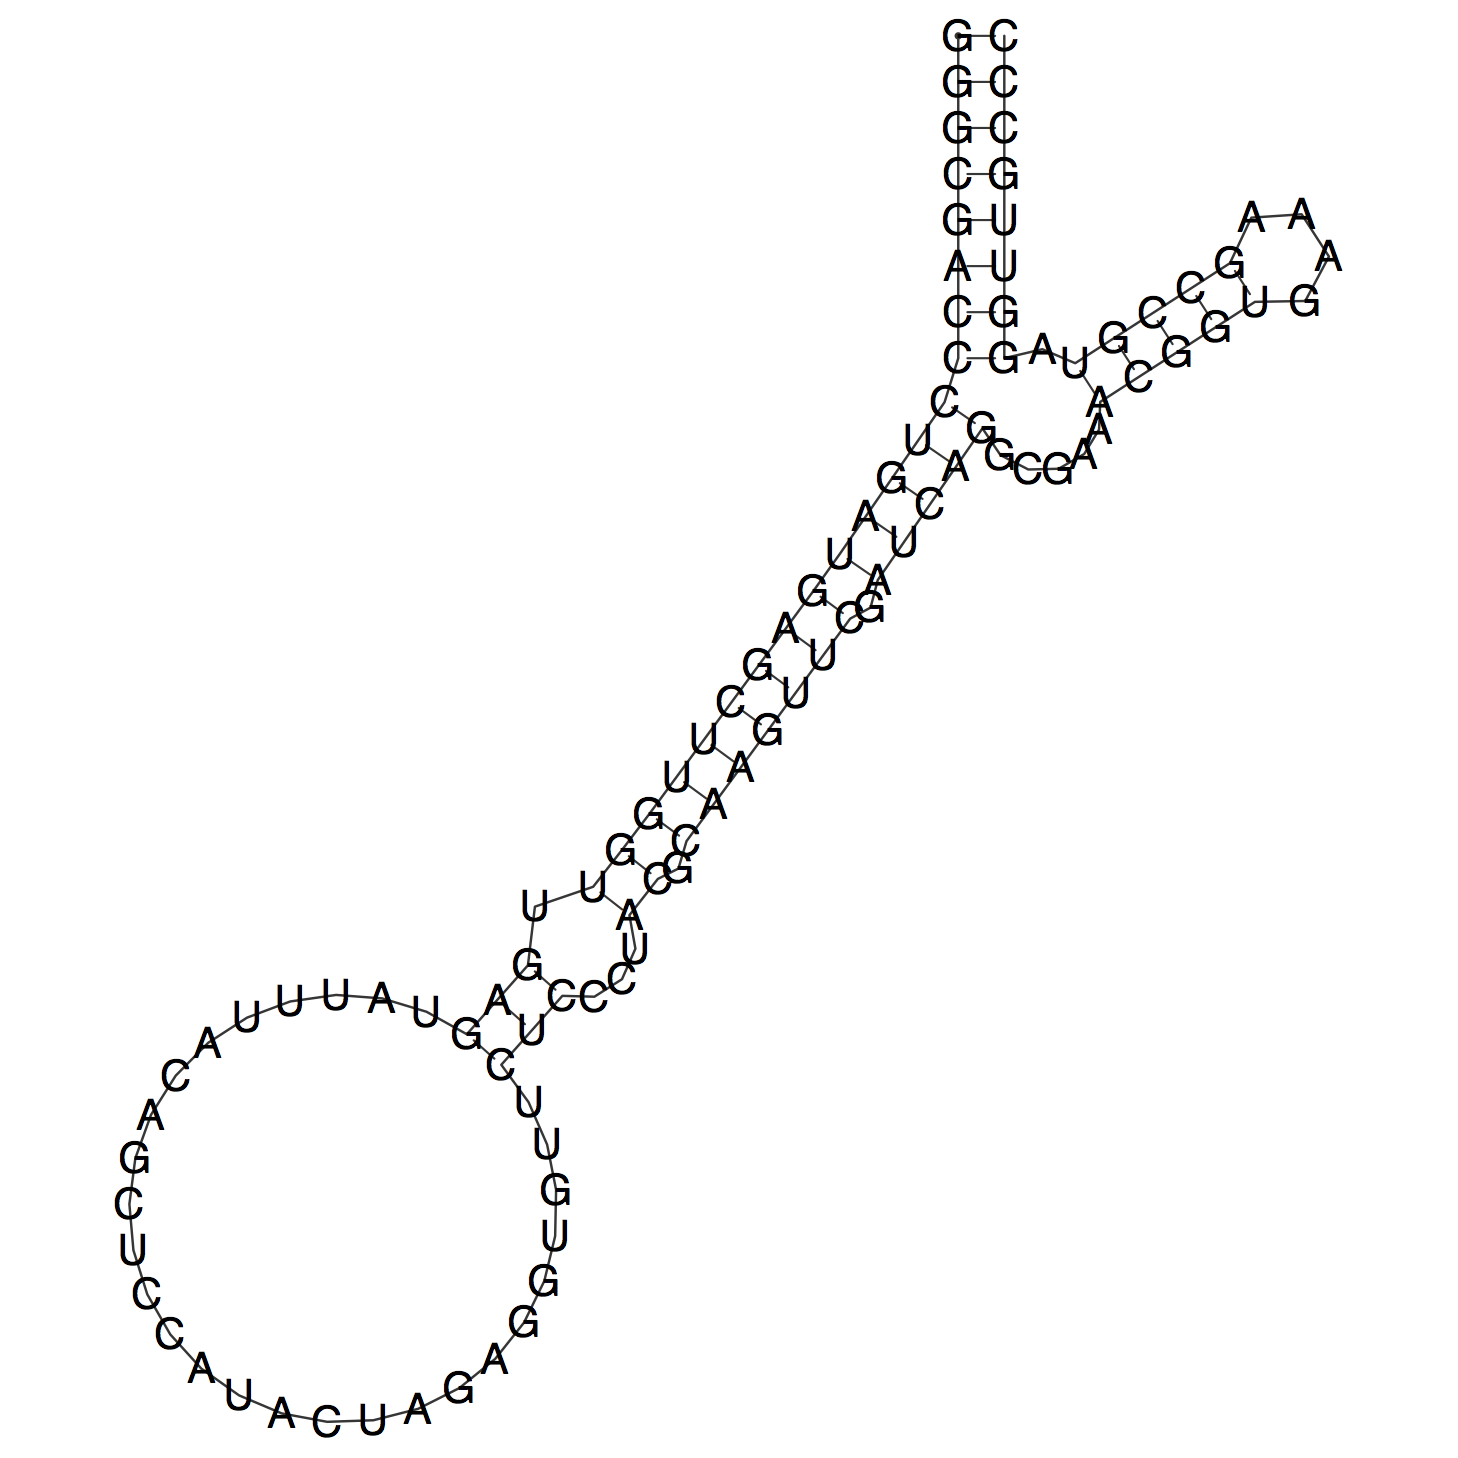

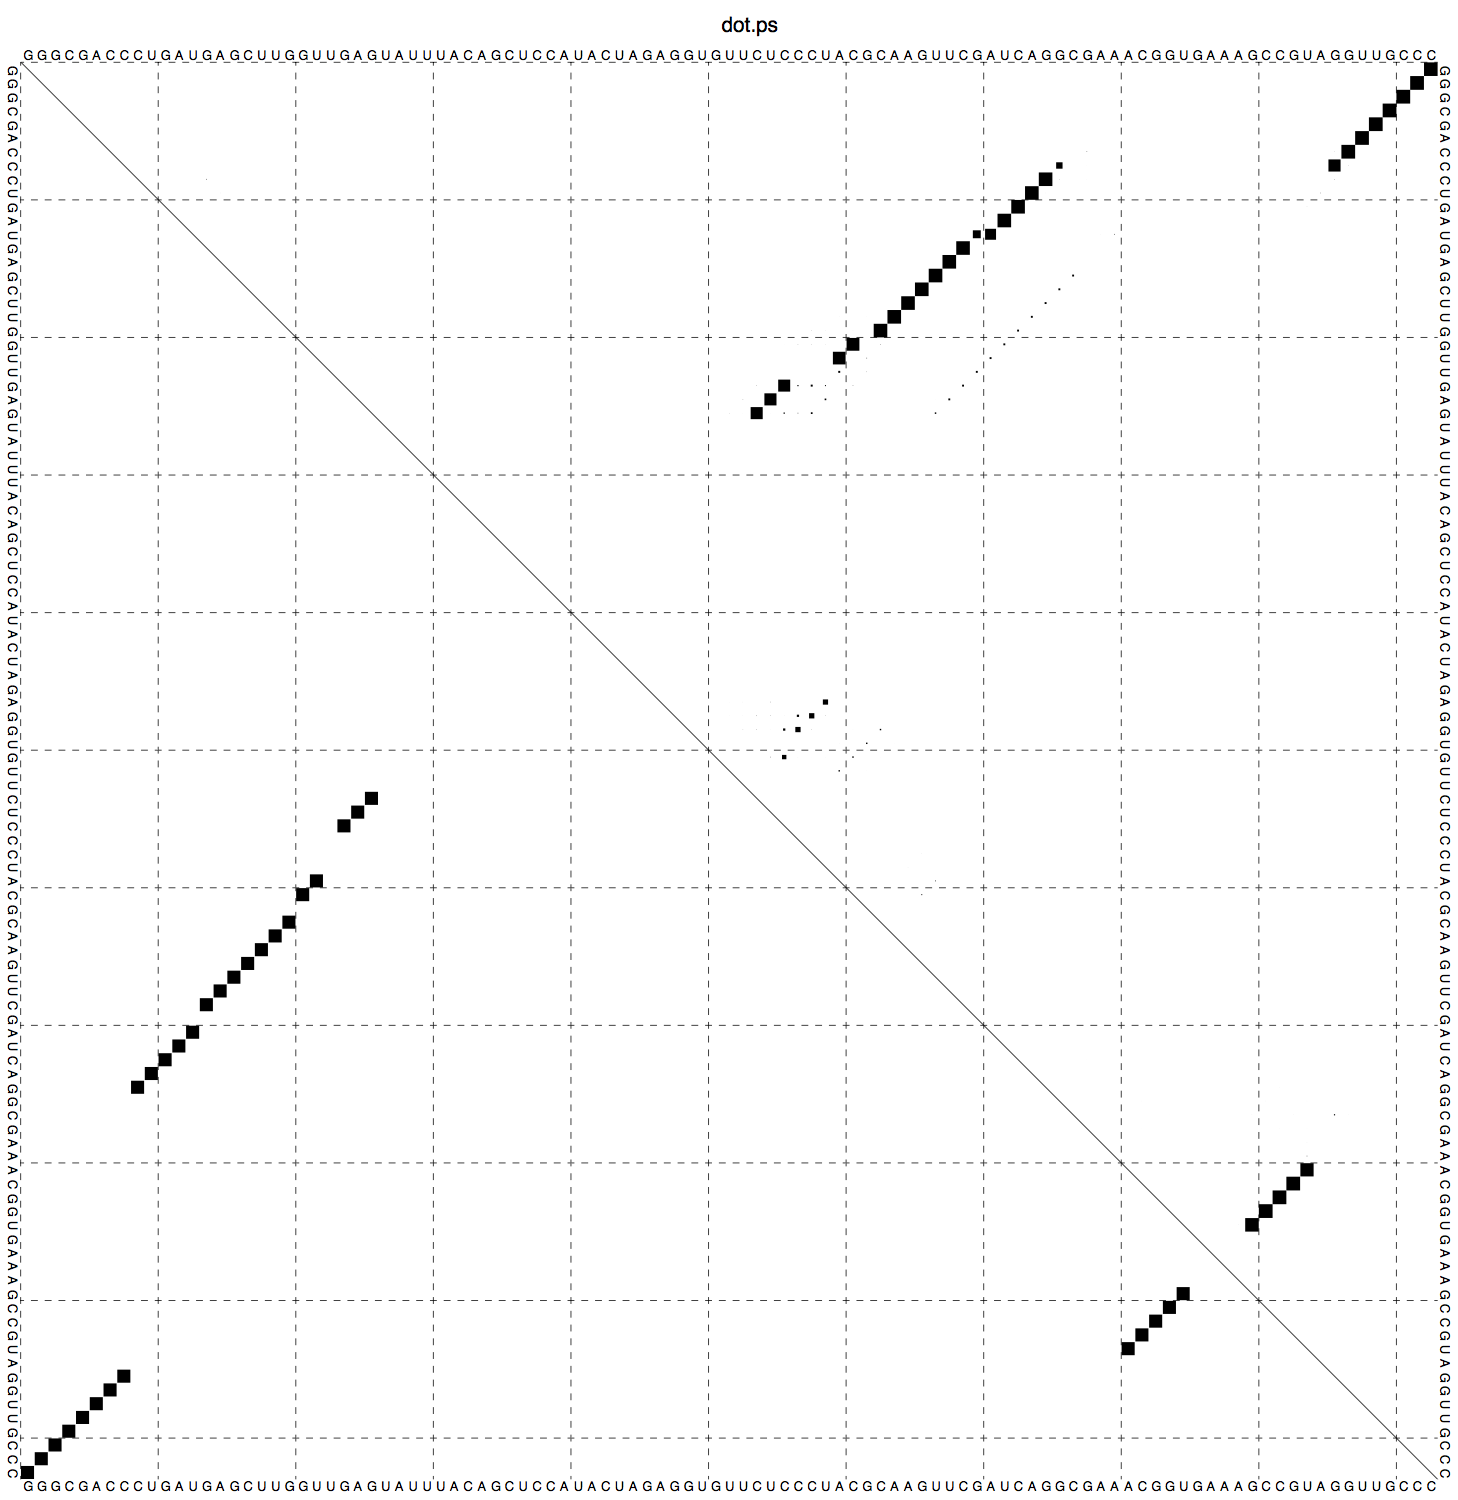

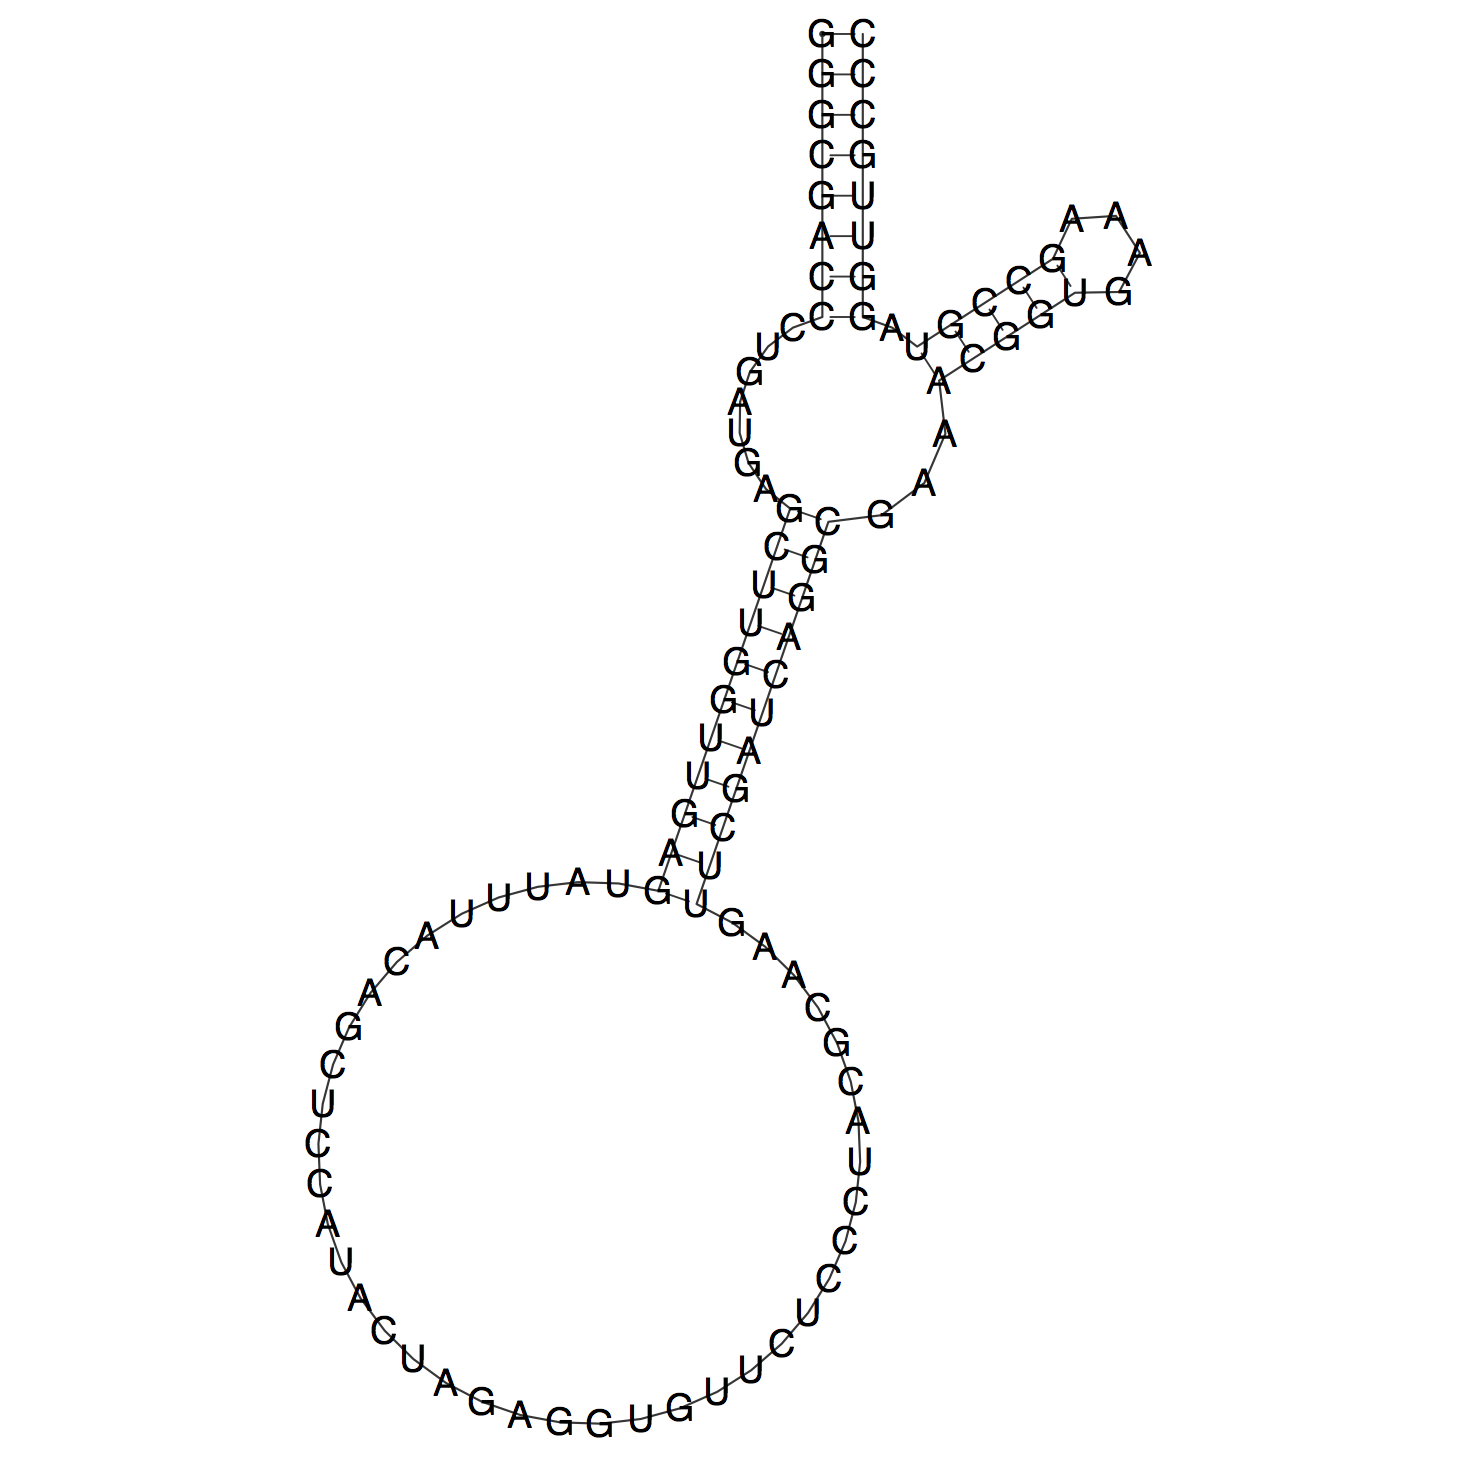

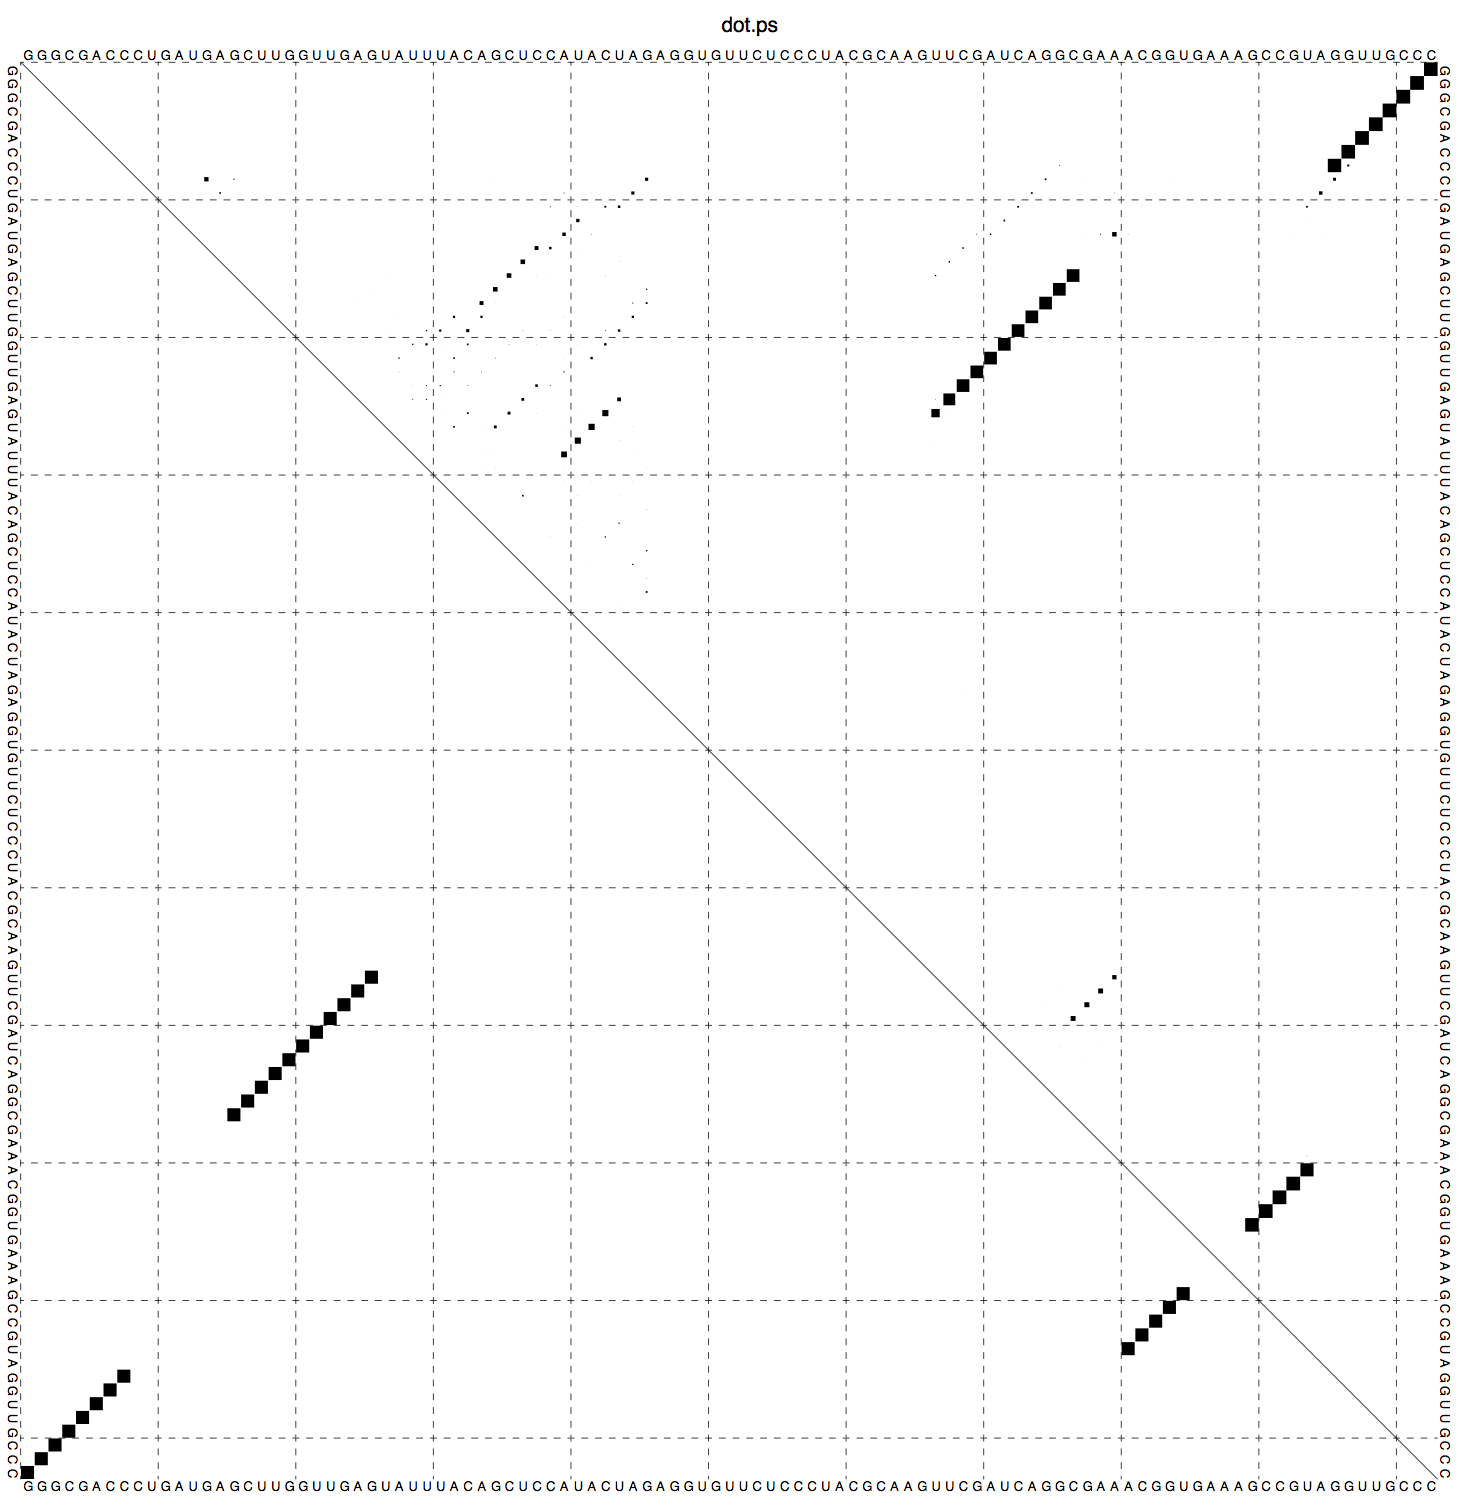

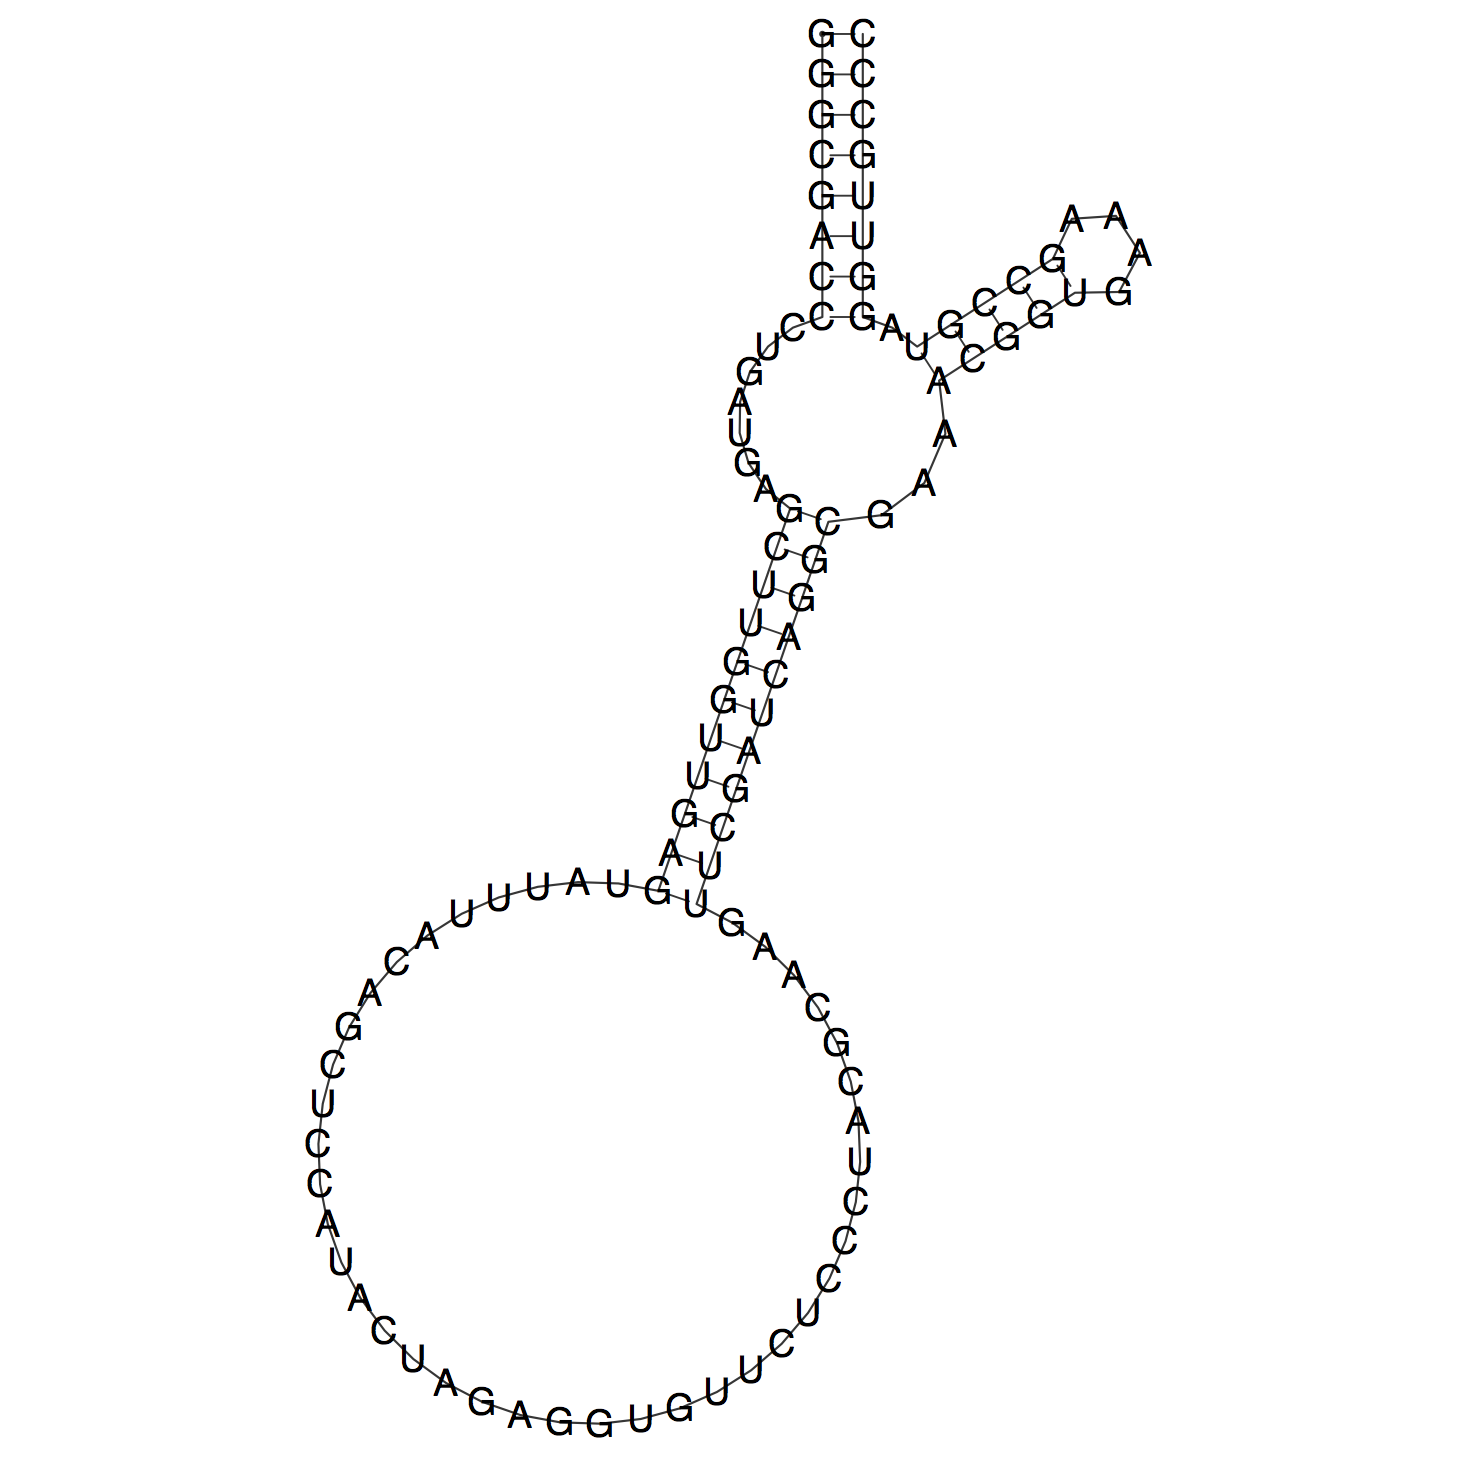

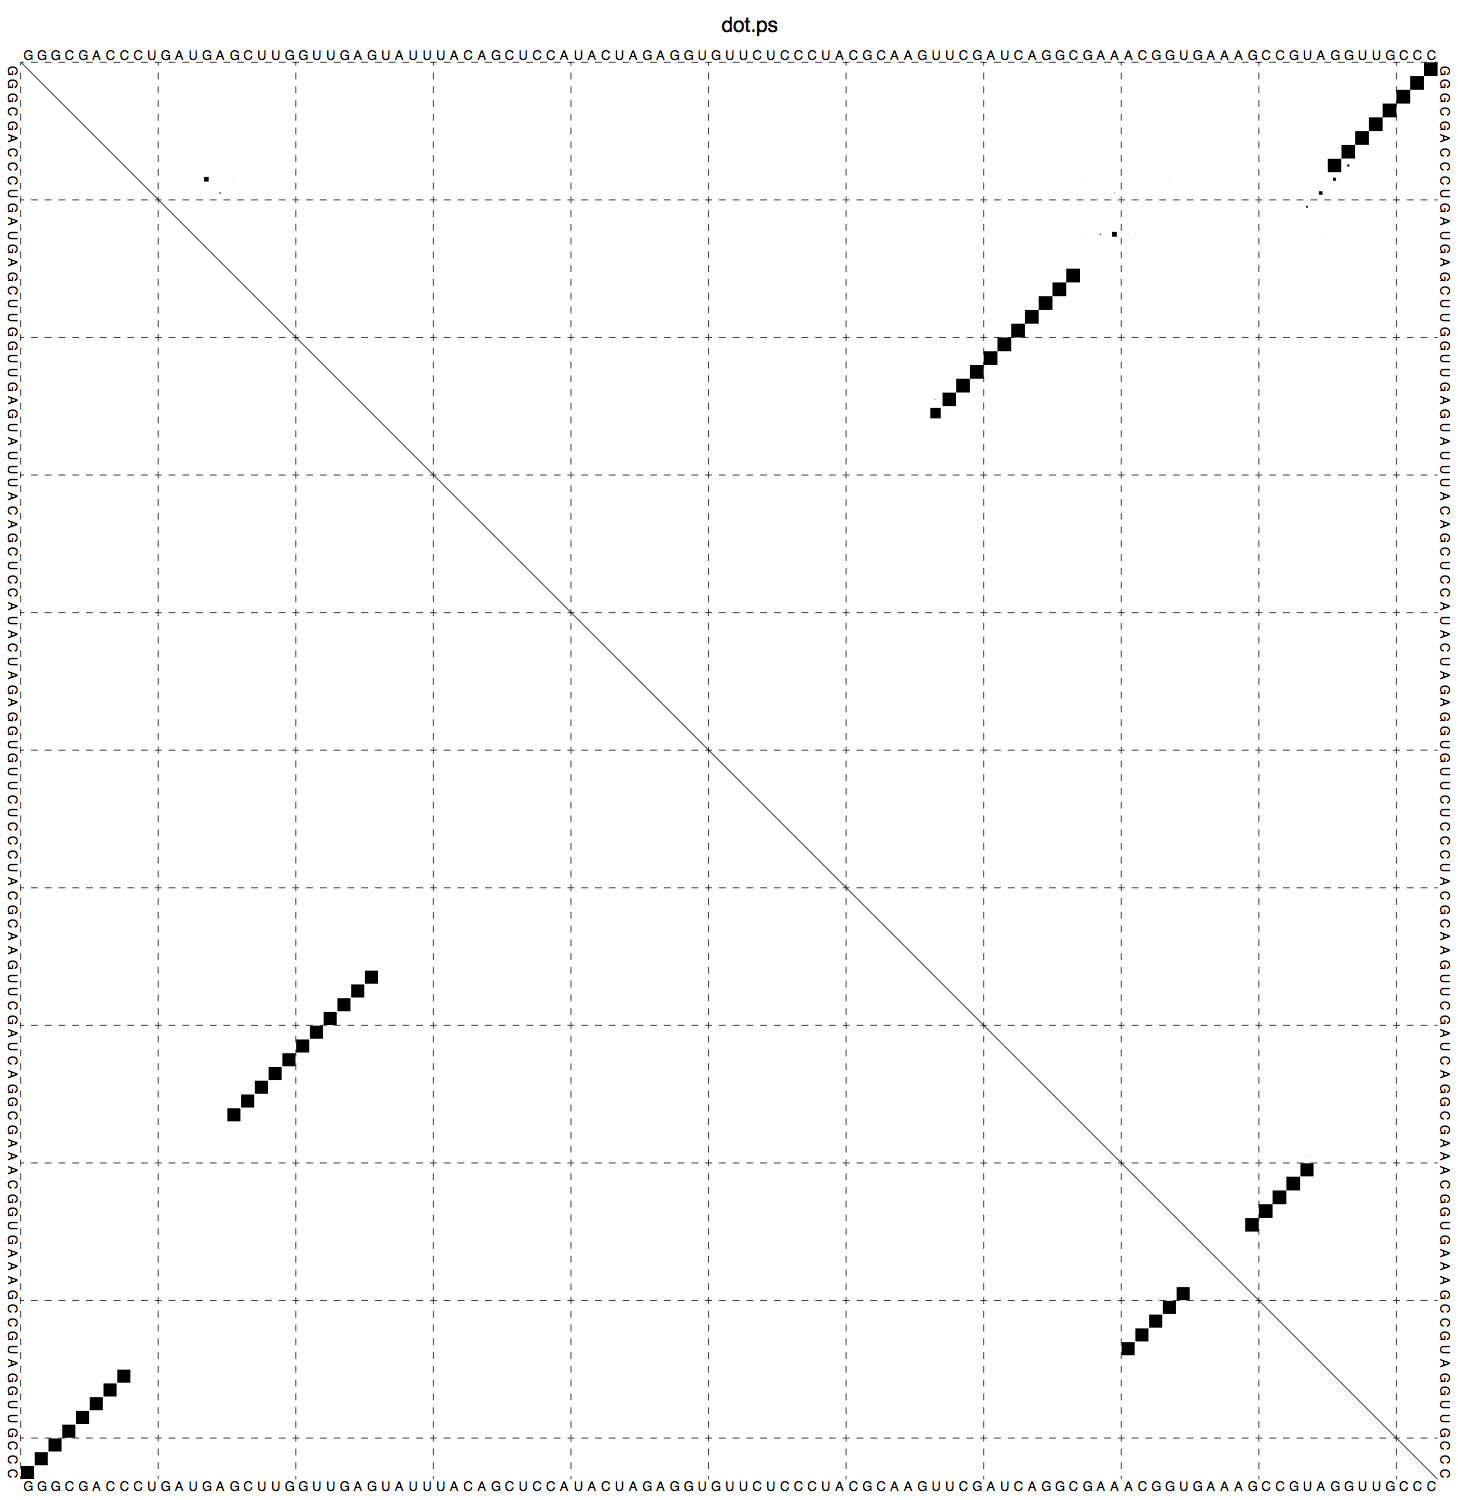

In [100]:
OFFR =Image(filename='OR_1_FF_rna.png', width=200, height=200)
OFFD =Image(filename='OR_1_FF_dot.png', width=200, height=200)

OTFR1 =Image(filename='OR_1_TF_rna.png', width=200, height=200)
OTFD1 =Image(filename='OR_1_TF_dot.png', width=200, height=200)

OTFR2 =Image(filename='OR_1_FT_rna.png', width=200, height=200)
OTFD2 =Image(filename='OR_1_FT_dot.png', width=200, height=200)

OTTR =Image(filename='OR_1_TT_rna.png', width=200, height=200)
OTTD =Image(filename='OR_1_TT_dot.png', width=200, height=200)
display(OFFR, OFFD, OTFR1, OTFD1, OTFR2, OTFD2, OTTR, OTTD)

### Truth Table

In [103]:
c.execute("""CREATE TABLE truth (riboswitch, NONE, OBS1, OBS2, OBS1and2);""")
c.execute("""INSERT INTO truth VALUES ("AND_1", "false", "false", "false", "true"), 
                                      ("OR_1", "false", "true", "true", "true");""")
conn.commit()

In [104]:
truth_table = pd.read_sql("select * from truth;", conn)
truth_table

riboswitch   NONE   OBS1   OBS2 OBS1and2
0      AND_1  false  false  false     true
1       OR_1  false   true   true     true

> **According to your results, do the AND-1 and OR-1 riboswitches work as the paper claims?**   
</br>    
Yes. By looking at the shape, in AND_1, both constrains (OBS) must be present in order to enable self-cleavage. In OR_1, the presence of either constrain can induce self-cleavage form, as shown in the last 3 graphs.